# Crown Prosecution Service Case Outcomes by Principal Offence Category

# Install Libraries

In [184]:
library(readr)
library(hash)
library(tidyverse)
library(data.table)
library(skimr)
library(visdat)
library(dplyr)
library(DataExplorer)
library(ggplot2)
library(ggmap)
library(ggcorrplot)
library(devtools)
library(forecast)
library(inspectdf)
library(corrplot)
library(mice)
library(factoextra)
library(forecast)
library(purrr)
library(reshape2)
library(forcats)
install.packages("e1071")
library(e1071)
install.packages("caret")
library(caret)
install.packages("pROC")
library(pROC)

Warning message:
"package 'e1071' is in use and will not be installed"
Warning message:
"package 'caret' is in use and will not be installed"
Installing package into 'C:/Users/USER/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'pROC' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'pROC'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\USER\AppData\Local\R\win-library\4.3\00LOCK\pROC\libs\x64\pROC.dll to C:\Users\USER\AppData\Local\R\win-library\4.3\pROC\libs\x64\pROC.dll: Permission denied"
Warning message:
"restored 'pROC'"



The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\Rtmp2raFMl\downloaded_packages


Warning message:
"package 'pROC' was built under R version 4.3.1"
Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




# Import Dataset

In [2]:
get_all_files_from_directories <- function () {
    files <- hash()
    
    files["2014"] <- list.files("/Users/USER/Desktop/Dataset/2014", pattern= ".csv")
    files["2015"] <- list.files("/Users/USER/Desktop/Dataset/2015", pattern= ".csv")
    files["2016"] <- list.files("/Users/USER/Desktop/Dataset/2016", pattern= ".csv")
    files["2017"] <- list.files("/Users/USER/Desktop/Dataset/2017", pattern= ".csv")
    files["2018"] <- list.files("/Users/USER/Desktop/Dataset/2018", pattern= ".csv")

    return(files)
}

In [3]:
get_all_files_from_directories()

<hash> containing 5 key-value pair(s).
  2014 : principal_offence_category_april_2014.csv     principal_offence_category_august_2014.csv    principal_offence_category_december_2014.csv  principal_offence_category_february_2014.csv  principal_offence_category_january_2014.csv   principal_offence_category_july_2014.csv      principal_offence_category_june_2014.csv      principal_offence_category_march_2014.csv     principal_offence_category_may_2014.csv       principal_offence_category_november_2014.csv  principal_offence_category_october_2014.csv   principal_offence_category_september_2014.csv
  2015 : principal_offence_category_april_2015.csv     principal_offence_category_august_2015.csv    principal_offence_category_december_2015.csv  principal_offence_category_february_2015.csv  principal_offence_category_january_2015.csv   principal_offence_category_july_2015.csv      principal_offence_category_june_2015.csv      principal_offence_category_march_2015.csv     principal_offence_categ

In [4]:
merge_files <- function(hash) {
    year <- names(hash)

    merged_df <- do.call(rbind, lapply(year, function(y) {
    do.call(rbind, lapply(hash[[y]], function(f) {
        f_name <- paste("", y, "/", f, sep="")
            df <- read.csv(f_name, stringsAsFactors = FALSE)
            df$year <- y
            df$month <- tolower(gsub(".csv", "", as.list(strsplit(f, "_")[[1]][4])))
            df
        }))
    }))
    return(merged_df)
}

In [5]:
merged_df = merge_files(get_all_files_from_directories())

In [6]:
head(merged_df)

X                 Number.of.Homicide.Convictions
1 National          81                            
2 Avon and Somerset  1                            
3 Bedfordshire       0                            
4 Cambridgeshire     0                            
5 Cheshire           1                            
6 Cleveland          0                            
  Percentage.of.Homicide.Convictions Number.of.Homicide.Unsuccessful
1 85.3%                              14                             
2 100.0%                              0                             
3 -                                   0                             
4 -                                   0                             
5 50.0%                               1                             
6 -                                   0                             
  Percentage.of.Homicide.Unsuccessful
1 14.7%                              
2 0.0%                               
3 -                                  
4 -                                  
5 50.0%                              
6 -                                  
  Number.of.Offences.Against.The.Person.Convictions
1 7,805                                            
2 167                                              
3 69                                               
4 99                                               
5 140                                              
6 85                                               
  Percentage.of.Offences.Against.The.Person.Convictions
1 74.1%                                                
2 78.8%                                                
3 75.0%                                                
4 81.1%                                                
5 74.9%                                                
6 67.5%                                                
  Number.of.Offences.Against.The.Person.Unsuccessful
1 2,722                                             
2 45                                                
3 23                                                
4 23                                                
5 47                                                
6 41                                                
  Percentage.of.Offences.Against.The.Person.Unsuccessful
1 25.9%                                                 
2 21.2%                                                 
3 25.0%                                                 
4 18.9%                                                 
5 25.1%                                                 
6 32.5%                                                 
  Number.of.Sexual.Offences.Convictions ⋯
1 698                                   ⋯
2 36                                    ⋯
3 5                                     ⋯
4 6                                     ⋯
5 17                                    ⋯
6 11                                    ⋯
  Number.of.All.Other.Offences..excluding.Motoring..Unsuccessful
1 513                                                           
2  16                                                           
3   6                                                           
4   2                                                           
5   6                                                           
6   5                                                           
  Percentage.of.All.Other.Offences..excluding.Motoring..Unsuccessful
1 16.3%                                                             
2 19.5%                                                             
3 35.3%                                                             
4 25.0%                                                             
5 10.7%                                                             
6 15.2%                                                             
  Number.of.Motoring.Offences.Convictions
1 8,283                                  
2 188                                    
3 40        

In [7]:
write.csv(merged_df, file = "merged_df.csv", row.names = FALSE)

In [8]:
merged_df <- read.csv("merged_df.csv")

In [9]:
glimpse(merged_df)

Rows: 2,150
Columns: 53
$ X                                                                  <chr> "Na…
$ Number.of.Homicide.Convictions                                     <int> 81,…
$ Percentage.of.Homicide.Convictions                                 <chr> "85…
$ Number.of.Homicide.Unsuccessful                                    <int> 14,…
$ Percentage.of.Homicide.Unsuccessful                                <chr> "14…
$ Number.of.Offences.Against.The.Person.Convictions                  <chr> "7,…
$ Percentage.of.Offences.Against.The.Person.Convictions              <chr> "74…
$ Number.of.Offences.Against.The.Person.Unsuccessful                 <chr> "2,…
$ Percentage.of.Offences.Against.The.Person.Unsuccessful             <chr> "25…
$ Number.of.Sexual.Offences.Convictions                              <chr> "69…
$ Percentage.of.Sexual.Offences.Convictions                          <chr> "72…
$ Number.of.Sexual.Offences.Unsuccessful                             <int> 269…
$ Percentage.of.

# Data Cleaning

In [10]:
drop_percentage_columns <- function(dataframe) {
    col_names <- colnames(dataframe)
    to_drop <- grep("Percentage", col_names, value = TRUE)
    dataframe <- dataframe[, !(col_names %in% to_drop)]
    return(dataframe)
}

In [11]:
merged_df = drop_percentage_columns(merged_df)

In [12]:
head(merged_df)

X                 Number.of.Homicide.Convictions
1 National          81                            
2 Avon and Somerset  1                            
3 Bedfordshire       0                            
4 Cambridgeshire     0                            
5 Cheshire           1                            
6 Cleveland          0                            
  Number.of.Homicide.Unsuccessful
1 14                             
2  0                             
3  0                             
4  0                             
5  1                             
6  0                             
  Number.of.Offences.Against.The.Person.Convictions
1 7,805                                            
2 167                                              
3 69                                               
4 99                                               
5 140                                              
6 85                                               
  Number.of.Offences.Against.The.Person.Unsuccessful
1 2,722                                             
2 45                                                
3 23                                                
4 23                                                
5 47                                                
6 41                                                
  Number.of.Sexual.Offences.Convictions Number.of.Sexual.Offences.Unsuccessful
1 698                                   269                                   
2 36                                      8                                   
3 5                                       1                                   
4 6                                       3                                   
5 17                                      3                                   
6 11                                      4                                   
  Number.of.Burglary.Convictions Number.of.Burglary.Unsuccessful
1 1,470                          226                            
2 37                               2                            
3 16                               1                            
4 8                                0                            
5 26                               3                            
6 25                              10                            
  Number.of.Robbery.Convictions ⋯ Number.of.Drugs.Offences.Unsuccessful
1 517                           ⋯ 279                                  
2   9                           ⋯   2                                  
3   4                           ⋯   2                                  
4   6                           ⋯   2                                  
5   1                           ⋯  10                                  
6   5                           ⋯   7                                  
  Number.of.Public.Order.Offences.Convictions
1 3,549                                      
2 68                                         
3 29                                         
4 45                                         
5 86                                         
6 74                                         
  Number.of.Public.Order.Offences.Unsuccessful
1 654                                         
2  11                                         
3   6                                         
4   9                                         
5   7                                         
6  27                                         
  Number.of.All.Other.Offences..excluding.Motoring..Convictions
1 2,640                                                        
2 66                                                           
3 11                                                           
4 6                                                            
5 50                                                           
6 28                                                           
  Number.of.All.Other.Offences..excluding.Motoring..Unsuccess

In [13]:
sort_by_yearmon <- function(dataframe){
    dataframe$yearmon <- as.Date(paste(dataframe$year, dataframe$month, "01", sep= "-"), "%Y-%b-%d")
    dataframe <- dataframe[order(dataframe$yearmon),]
    return(dataframe)
}

In [14]:
merged_df <- sort_by_yearmon(merged_df)

In [15]:
head(merged_df)

X                 Number.of.Homicide.Convictions
173 National          51                            
174 Avon and Somerset  0                            
175 Bedfordshire       0                            
176 Cambridgeshire     0                            
177 Cheshire           0                            
178 Cleveland          2                            
    Number.of.Homicide.Unsuccessful
173 11                             
174  0                             
175  1                             
176  0                             
177  0                             
178  3                             
    Number.of.Offences.Against.The.Person.Convictions
173 9,087                                            
174 228                                              
175 68                                               
176 101                                              
177 170                                              
178 119                                              
    Number.of.Offences.Against.The.Person.Unsuccessful
173 2,930                                             
174 62                                                
175 29                                                
176 21                                                
177 40                                                
178 44                                                
    Number.of.Sexual.Offences.Convictions
173 736                                  
174 35                                   
175 2                                    
176 10                                   
177 15                                   
178 11                                   
    Number.of.Sexual.Offences.Unsuccessful Number.of.Burglary.Convictions
173 286                                    1,715                         
174  17                                    49                            
175   1                                    7                             
176   3                                    18                            
177   1                                    38                            
178   6                                    36                            
    Number.of.Burglary.Unsuccessful Number.of.Robbery.Convictions ⋯
173 284                             522                           ⋯
174   1                               8                           ⋯
175   4                              16                           ⋯
176   4                               6                           ⋯
177   5                              10                           ⋯
178   2                               3                           ⋯
    Number.of.Public.Order.Offences.Convictions
173 4,752                                      
174 123                                        
175 30                                         
176 37                                         
177 77                                         
178 123                                        
    Number.of.Public.Order.Offences.Unsuccessful
173 797                                         
174  28                                         
175   9                                         
176   2                                         
177   8                                         
178  27                                         
    Number.of.All.Other.Offences..excluding.Motoring..Convictions
173 3,291                                                        
174 63                                                           
175 13                                                           
176 28                                                           
177 50                                                           
178 34                                                           
    Number.of.All.Other.Offences..excluding.Motoring..Unsuccessful
173 586                                                           
174   9                                                

In [16]:
shift_columns <- function(dataframe){
  cols <- colnames(dataframe)
  cols <- c(cols[1], cols[(length(cols)-2):length(cols)], cols[2:(length(cols)-3)])
  dataframe[, cols]
}

In [17]:
merged_df <- shift_columns(merged_df)

In [18]:
head(merged_df)

X                 year month   yearmon    Number.of.Homicide.Convictions
173 National          2014 january 2014-01-01 51                            
174 Avon and Somerset 2014 january 2014-01-01  0                            
175 Bedfordshire      2014 january 2014-01-01  0                            
176 Cambridgeshire    2014 january 2014-01-01  0                            
177 Cheshire          2014 january 2014-01-01  0                            
178 Cleveland         2014 january 2014-01-01  2                            
    Number.of.Homicide.Unsuccessful
173 11                             
174  0                             
175  1                             
176  0                             
177  0                             
178  3                             
    Number.of.Offences.Against.The.Person.Convictions
173 9,087                                            
174 228                                              
175 68                                               
176 101                                              
177 170                                              
178 119                                              
    Number.of.Offences.Against.The.Person.Unsuccessful
173 2,930                                             
174 62                                                
175 29                                                
176 21                                                
177 40                                                
178 44                                                
    Number.of.Sexual.Offences.Convictions
173 736                                  
174 35                                   
175 2                                    
176 10                                   
177 15                                   
178 11                                   
    Number.of.Sexual.Offences.Unsuccessful ⋯
173 286                                    ⋯
174  17                                    ⋯
175   1                                    ⋯
176   3                                    ⋯
177   1                                    ⋯
178   6                                    ⋯
    Number.of.Criminal.Damage.Unsuccessful Number.of.Drugs.Offences.Convictions
173 472                                    4,988                               
174  14                                    148                                 
175   8                                    31                                  
176   3                                    47                                  
177   3                                    64                                  
178  13                                    65                                  
    Number.of.Drugs.Offences.Unsuccessful
173 305                                  
174   4                                  
175   3                                  
176   1                                  
177   3                                  
178   2                                  
    Number.of.Public.Order.Offences.Convictions
173 4,752                                      
174 123                                        
175 30                                         
176 37                                         
177 77                                         
178 123                                        
    Number.of.Public.Order.Offences.Unsuccessful
173 797                                         
174  28                                         
175   9                                         
176   2                                         
177   8                                         
178  27                                         
    Number.of.All.Other.Offences..excluding.Motoring..Convictions
173 3,291                                                        
174 63                                                           
175 13                                                           
176 28                                      

In [19]:
rename_columns <- function(dataframe){
  colnames(dataframe) <- gsub("Number.of.", "", colnames(dataframe))
  colnames(dataframe) <- gsub("\\.", "_", colnames(dataframe))
  colnames(dataframe) <- tolower(colnames(dataframe))
  return(dataframe)
}

In [20]:
merged_df <- rename_columns(merged_df)

In [21]:
head(merged_df)

x                 year month   yearmon    homicide_convictions
173 National          2014 january 2014-01-01 51                  
174 Avon and Somerset 2014 january 2014-01-01  0                  
175 Bedfordshire      2014 january 2014-01-01  0                  
176 Cambridgeshire    2014 january 2014-01-01  0                  
177 Cheshire          2014 january 2014-01-01  0                  
178 Cleveland         2014 january 2014-01-01  2                  
    homicide_unsuccessful offences_against_the_person_convictions
173 11                    9,087                                  
174  0                    228                                    
175  1                    68                                     
176  0                    101                                    
177  0                    170                                    
178  3                    119                                    
    offences_against_the_person_unsuccessful sexual_offences_convictions
173 2,930                                    736                        
174 62                                       35                         
175 29                                       2                          
176 21                                       10                         
177 40                                       15                         
178 44                                       11                         
    sexual_offences_unsuccessful ⋯ criminal_damage_unsuccessful
173 286                          ⋯ 472                         
174  17                          ⋯  14                         
175   1                          ⋯   8                         
176   3                          ⋯   3                         
177   1                          ⋯   3                         
178   6                          ⋯  13                         
    drugs_offences_convictions drugs_offences_unsuccessful
173 4,988                      305                        
174 148                          4                        
175 31                           3                        
176 47                           1                        
177 64                           3                        
178 65                           2                        
    public_order_offences_convictions public_order_offences_unsuccessful
173 4,752                             797                               
174 123                                28                               
175 30                                  9                               
176 37                                  2                               
177 77                                  8                               
178 123                                27                               
    all_other_offences__excluding_motoring__convictions
173 3,291                                              
174 63                                                 
175 13                                                 
176 28                                                 
177 50                                                 
178 34                                                 
    all_other_offences__excluding_motoring__unsuccessful
173 586                                                 
174   9                                                 
175   2                                                 
176   9                                                 
177   5                                                 
178  14                                                 
    motoring_offences_convictions motoring_offences_unsuccessful
173 12,945                        1,466                         
174 256                           40                            
175 171                           13                            
176 103                           16                            
177 264                           16                            
178 228  

In [22]:
remove_special_characters_and_convert_to_integer <- function(dataframe){
  dataframe <- dataframe %>% 
  mutate_all(funs(gsub(",", "", .)))
  dataframe[,5:ncol(dataframe)] <- sapply(dataframe[,5:ncol(dataframe)], as.integer)
  return(dataframe)
}

In [23]:
merged_df <- remove_special_characters_and_convert_to_integer(merged_df)

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


In [24]:
head(merged_df)

x                 year month   yearmon    homicide_convictions
173 National          2014 january 2014-01-01 51                  
174 Avon and Somerset 2014 january 2014-01-01  0                  
175 Bedfordshire      2014 january 2014-01-01  0                  
176 Cambridgeshire    2014 january 2014-01-01  0                  
177 Cheshire          2014 january 2014-01-01  0                  
178 Cleveland         2014 january 2014-01-01  2                  
    homicide_unsuccessful offences_against_the_person_convictions
173 11                    9087                                   
174  0                     228                                   
175  1                      68                                   
176  0                     101                                   
177  0                     170                                   
178  3                     119                                   
    offences_against_the_person_unsuccessful sexual_offences_convictions
173 2930                                     736                        
174   62                                      35                        
175   29                                       2                        
176   21                                      10                        
177   40                                      15                        
178   44                                      11                        
    sexual_offences_unsuccessful ⋯ criminal_damage_unsuccessful
173 286                          ⋯ 472                         
174  17                          ⋯  14                         
175   1                          ⋯   8                         
176   3                          ⋯   3                         
177   1                          ⋯   3                         
178   6                          ⋯  13                         
    drugs_offences_convictions drugs_offences_unsuccessful
173 4988                       305                        
174  148                         4                        
175   31                         3                        
176   47                         1                        
177   64                         3                        
178   65                         2                        
    public_order_offences_convictions public_order_offences_unsuccessful
173 4752                              797                               
174  123                               28                               
175   30                                9                               
176   37                                2                               
177   77                                8                               
178  123                               27                               
    all_other_offences__excluding_motoring__convictions
173 3291                                               
174   63                                               
175   13                                               
176   28                                               
177   50                                               
178   34                                               
    all_other_offences__excluding_motoring__unsuccessful
173 586                                                 
174   9                                                 
175   2                                                 
176   9                                                 
177   5                                                 
178  14                                                 
    motoring_offences_convictions motoring_offences_unsuccessful
173 12945                         1466                          
174   256                           40                          
175   171                           13                          
176   103                           16                          
177   264                           16                          
178   228

In [25]:
unique(merged_df$month)

[1] "january"   "february"  "march"     "april"     "may"       "june"     
 [7] "july"      "august"    "september" "october"   "november"  "december" 
[13] "jul"       "aug"       "sep"       "oct"       "nov"       "dec"      
[19] "jan"       "feb"       "mar"

In [26]:
convert_months <- function(df) {
  df$month <- gsub("january", "jan", df$month, ignore.case = TRUE)
  df$month <- gsub("february", "feb", df$month, ignore.case = TRUE)
  df$month <- gsub("march", "mar", df$month, ignore.case = TRUE)
  df$month <- gsub("april", "apr", df$month, ignore.case = TRUE)
  df$month <- gsub("may", "may", df$month, ignore.case = TRUE)
  df$month <- gsub("june", "jun", df$month, ignore.case = TRUE)
  df$month <- gsub("july", "jul", df$month, ignore.case = TRUE)
  df$month <- gsub("august", "aug", df$month, ignore.case = TRUE)
  df$month <- gsub("september", "sep", df$month, ignore.case = TRUE)
  df$month <- gsub("october", "oct", df$month, ignore.case = TRUE)
  df$month <- gsub("november", "nov", df$month, ignore.case = TRUE)
  df$month <- gsub("december", "dec", df$month, ignore.case = TRUE)
  
  return(df)
}


In [27]:
merged_df <- convert_months(merged_df)

In [28]:
head(merged_df)

x                 year month yearmon    homicide_convictions
173 National          2014 jan   2014-01-01 51                  
174 Avon and Somerset 2014 jan   2014-01-01  0                  
175 Bedfordshire      2014 jan   2014-01-01  0                  
176 Cambridgeshire    2014 jan   2014-01-01  0                  
177 Cheshire          2014 jan   2014-01-01  0                  
178 Cleveland         2014 jan   2014-01-01  2                  
    homicide_unsuccessful offences_against_the_person_convictions
173 11                    9087                                   
174  0                     228                                   
175  1                      68                                   
176  0                     101                                   
177  0                     170                                   
178  3                     119                                   
    offences_against_the_person_unsuccessful sexual_offences_convictions
173 2930                                     736                        
174   62                                      35                        
175   29                                       2                        
176   21                                      10                        
177   40                                      15                        
178   44                                      11                        
    sexual_offences_unsuccessful ⋯ criminal_damage_unsuccessful
173 286                          ⋯ 472                         
174  17                          ⋯  14                         
175   1                          ⋯   8                         
176   3                          ⋯   3                         
177   1                          ⋯   3                         
178   6                          ⋯  13                         
    drugs_offences_convictions drugs_offences_unsuccessful
173 4988                       305                        
174  148                         4                        
175   31                         3                        
176   47                         1                        
177   64                         3                        
178   65                         2                        
    public_order_offences_convictions public_order_offences_unsuccessful
173 4752                              797                               
174  123                               28                               
175   30                                9                               
176   37                                2                               
177   77                                8                               
178  123                               27                               
    all_other_offences__excluding_motoring__convictions
173 3291                                               
174   63                                               
175   13                                               
176   28                                               
177   50                                               
178   34                                               
    all_other_offences__excluding_motoring__unsuccessful
173 586                                                 
174   9                                                 
175   2                                                 
176   9                                                 
177   5                                                 
178  14                                                 
    motoring_offences_convictions motoring_offences_unsuccessful
173 12945                         1466                          
174   256                           40                          
175   171                           13                          
176   103                           16                          
177   264                           16                          
178   228              

In [29]:
get_missing_months <- function(dataframe) {
  years <- unique(dataframe$year)
  missing_months <- list()
  
  all_months <- c("jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec")
  
  for (year in years) {
    months <- unique(dataframe[dataframe$year == year, ]$month)
    diff <- setdiff(all_months, months)
    missing_months[[as.character(year)]] <- diff
  }
  
  return(missing_months)
}


In [30]:
get_missing_months(merged_df)

$`2014`
character(0)

$`2015`
[1] "nov"

$`2016`
[1] "feb" "mar"

$`2017`
[1] "apr" "may" "jun"

$`2018`
[1] "apr" "may" "jun" "nov"

In [31]:
unique(merged_df$x)

[1] "National"              "Avon and Somerset"     "Bedfordshire"         
 [4] "Cambridgeshire"        "Cheshire"              "Cleveland"            
 [7] "Cumbria"               "Derbyshire"            "Devon and Cornwall"   
[10] "Dorset"                "Durham"                "Dyfed Powys"          
[13] "Essex"                 "Gloucestershire"       "GreaterManchester"    
[16] "Gwent"                 "Hampshire"             "Hertfordshire"        
[19] "Humberside"            "Kent"                  "Lancashire"           
[22] "Leicestershire"        "Lincolnshire"          "Merseyside"           
[25] "Metropolitan and City" "Norfolk"               "Northamptonshire"     
[28] "Northumbria"           "North Wales"           "North Yorkshire"      
[31] "Nottinghamshire"       "South Wales"           "South Yorkshire"      
[34] "Staffordshire"         "Suffolk"               "Surrey"               
[37] "Sussex"                "Thames Valley"         "Warwickshire"         
[40] "West Mercia"           "West Midlands"         "West Yorkshire"       
[43] "Wiltshire"

In [32]:
rename_conviction_columns <- function(dataframe){
    col_names <- colnames(dataframe)
    for (i in 1:length(col_names)){
        if(grepl("_convictions", col_names[i])){
            names(dataframe)[names(dataframe) == col_names[i]] <-gsub("_convictions", "", col_names[i])

        }else{
            names(dataframe)[names(dataframe) == col_names[i]] <- gsub("_unsuccessful", "_us", col_names[i])
        }
    }
    return(dataframe)
}

In [33]:
merged_df <- rename_conviction_columns(merged_df)

In [34]:
head(merged_df)

x                 year month yearmon    homicide homicide_us
173 National          2014 jan   2014-01-01 51       11         
174 Avon and Somerset 2014 jan   2014-01-01  0        0         
175 Bedfordshire      2014 jan   2014-01-01  0        1         
176 Cambridgeshire    2014 jan   2014-01-01  0        0         
177 Cheshire          2014 jan   2014-01-01  0        0         
178 Cleveland         2014 jan   2014-01-01  2        3         
    offences_against_the_person offences_against_the_person_us sexual_offences
173 9087                        2930                           736            
174  228                          62                            35            
175   68                          29                             2            
176  101                          21                            10            
177  170                          40                            15            
178  119                          44                            11            
    sexual_offences_us ⋯ criminal_damage_us drugs_offences drugs_offences_us
173 286                ⋯ 472                4988           305              
174  17                ⋯  14                 148             4              
175   1                ⋯   8                  31             3              
176   3                ⋯   3                  47             1              
177   1                ⋯   3                  64             3              
178   6                ⋯  13                  65             2              
    public_order_offences public_order_offences_us
173 4752                  797                     
174  123                   28                     
175   30                    9                     
176   37                    2                     
177   77                    8                     
178  123                   27                     
    all_other_offences__excluding_motoring_
173 3291                                   
174   63                                   
175   13                                   
176   28                                   
177   50                                   
178   34                                   
    all_other_offences__excluding_motoring__us motoring_offences
173 586                                        12945            
174   9                                          256            
175   2                                          171            
176   9                                          103            
177   5                                          264            
178  14                                          228            
    motoring_offences_us admin_finalised_us
173 1466                 890               
174   40                  20               
175   13                  12               
176   16                  14               
177   16                  13               
178   16                   3

In [35]:
glimpse(merged_df)

Rows: 2,150
Columns: 29
$ x                                          <chr> "National", "Avon and Somer…
$ year                                       <chr> "2014", "2014", "2014", "20…
$ month                                      <chr> "jan", "jan", "jan", "jan",…
$ yearmon                                    <chr> "2014-01-01", "2014-01-01",…
$ homicide                                   <int> 51, 0, 0, 0, 0, 2, 0, 0, 0,…
$ homicide_us                                <int> 11, 0, 1, 0, 0, 3, 0, 1, 0,…
$ offences_against_the_person                <int> 9087, 228, 68, 101, 170, 11…
$ offences_against_the_person_us             <int> 2930, 62, 29, 21, 40, 44, 1…
$ sexual_offences                            <int> 736, 35, 2, 10, 15, 11, 4, …
$ sexual_offences_us                         <int> 286, 17, 1, 3, 1, 6, 3, 7, …
$ burglary                                   <int> 1715, 49, 7, 18, 38, 36, 16…
$ burglary_us                                <int> 284, 1, 4, 4, 5, 2, 0, 4, 4…
$ robbery       

In [36]:
county_region_map <- list(
  "National" = "All",
  "Avon and Somerset" = "West",
  "Bedfordshire" = "East",
  "Cambridgeshire" = "East",
  "Cheshire" = "North",
  "Cleveland" = "North",
  "Cumbria" = "North",
  "Derbyshire" = "East",
  "Devon and Cornwall" = "West",
  "Dorset" = "West",
  "Durham" = "North",
  "Dyfed Powys" = "West",
  "Essex" = "East",
  "Gloucestershire" = "West",
  "GreaterManchester" = "North",
  "Gwent" = "West",
  "Hampshire" = "South",
  "Hertfordshire" = "East",
  "Humberside" = "North",
  "Kent" = "South",
  "Lancashire" = "North",
  "Leicestershire" = "East",
  "Lincolnshire" = "East",
  "Merseyside" = "North",
  "Metropolitan and City" = "South",
  "Norfolk" = "East",
  "Northamptonshire" = "East",
  "Northumbria" = "North",
  "North Wales" = "North",
  "North Yorkshire" = "North",
  "Nottinghamshire" = "East",
  "South Wales" = "West",
  "South Yorkshire" = "North",
  "Staffordshire" = "West",
  "Suffolk" = "East",
  "Surrey" = "South",
  "Sussex" = "South",
  "Thames Valley" = "South",
  "Warwickshire" = "West",
  "West Mercia" = "West",
  "West Midlands" = "West",
  "West Yorkshire" = "North",
  "Wiltshire" = "West"
)

In [37]:
label_county_region <- function(df, county_region) {  
  region <- c()

  for (i in 1:nrow(df)) {
    county <- df$x[i]
    region[i] <- county_region[[county]]
  }
  
  df$region <- region
  
  return(df)
}

In [38]:
merged_df <- label_county_region(merged_df, county_region_map)

In [39]:
head(merged_df)

x                 year month yearmon    homicide homicide_us
173 National          2014 jan   2014-01-01 51       11         
174 Avon and Somerset 2014 jan   2014-01-01  0        0         
175 Bedfordshire      2014 jan   2014-01-01  0        1         
176 Cambridgeshire    2014 jan   2014-01-01  0        0         
177 Cheshire          2014 jan   2014-01-01  0        0         
178 Cleveland         2014 jan   2014-01-01  2        3         
    offences_against_the_person offences_against_the_person_us sexual_offences
173 9087                        2930                           736            
174  228                          62                            35            
175   68                          29                             2            
176  101                          21                            10            
177  170                          40                            15            
178  119                          44                            11            
    sexual_offences_us ⋯ drugs_offences drugs_offences_us public_order_offences
173 286                ⋯ 4988           305               4752                 
174  17                ⋯  148             4                123                 
175   1                ⋯   31             3                 30                 
176   3                ⋯   47             1                 37                 
177   1                ⋯   64             3                 77                 
178   6                ⋯   65             2                123                 
    public_order_offences_us all_other_offences__excluding_motoring_
173 797                      3291                                   
174  28                        63                                   
175   9                        13                                   
176   2                        28                                   
177   8                        50                                   
178  27                        34                                   
    all_other_offences__excluding_motoring__us motoring_offences
173 586                                        12945            
174   9                                          256            
175   2                                          171            
176   9                                          103            
177   5                                          264            
178  14                                          228            
    motoring_offences_us admin_finalised_us region
173 1466                 890                All   
174   40                  20                West  
175   13                  12                East  
176   16                  14                East  
177   16                  13                North 
178   16                   3                North

In [40]:
unique(merged_df$region)

[1] "All"   "West"  "East"  "North" "South"

In [41]:
move_last_column_to_5th <- function(dataframe) {
  ncols <- ncol(dataframe)
  region <- dataframe[, ncols]
  dataframe <- dataframe[, -ncols]
  dataframe <- cbind(dataframe[, 1:4], region, dataframe[, 5:(ncols-1)])
  return(dataframe)
}

In [42]:
merged_df <- move_last_column_to_5th(merged_df)

In [43]:
head(merged_df)

x                 year month yearmon    region homicide homicide_us
173 National          2014 jan   2014-01-01 All    51       11         
174 Avon and Somerset 2014 jan   2014-01-01 West    0        0         
175 Bedfordshire      2014 jan   2014-01-01 East    0        1         
176 Cambridgeshire    2014 jan   2014-01-01 East    0        0         
177 Cheshire          2014 jan   2014-01-01 North   0        0         
178 Cleveland         2014 jan   2014-01-01 North   2        3         
    offences_against_the_person offences_against_the_person_us sexual_offences
173 9087                        2930                           736            
174  228                          62                            35            
175   68                          29                             2            
176  101                          21                            10            
177  170                          40                            15            
178  119                          44                            11            
    ⋯ criminal_damage_us drugs_offences drugs_offences_us public_order_offences
173 ⋯ 472                4988           305               4752                 
174 ⋯  14                 148             4                123                 
175 ⋯   8                  31             3                 30                 
176 ⋯   3                  47             1                 37                 
177 ⋯   3                  64             3                 77                 
178 ⋯  13                  65             2                123                 
    public_order_offences_us all_other_offences__excluding_motoring_
173 797                      3291                                   
174  28                        63                                   
175   9                        13                                   
176   2                        28                                   
177   8                        50                                   
178  27                        34                                   
    all_other_offences__excluding_motoring__us motoring_offences
173 586                                        12945            
174   9                                          256            
175   2                                          171            
176   9                                          103            
177   5                                          264            
178  14                                          228            
    motoring_offences_us admin_finalised_us
173 1466                 890               
174   40                  20               
175   13                  12               
176   16                  14               
177   16                  13               
178   16                   3

In [44]:
rename_conviction_columns <- function(dataframe) {
  col_names <- colnames(dataframe)
  for (i in 1:length(col_names)) {
    if (grepl("_convictions", col_names[i])) {
      col_names[i] <- gsub("_convictions", "", col_names[i])
    } else {
      col_names[i] <- gsub("_unsuccessful", "_us", col_names[i])
    }
  }
  colnames(dataframe) <- col_names
  return(dataframe)
}

In [45]:
merged_df <- rename_conviction_columns(merged_df)

In [46]:
head(merged_df)

x                 year month yearmon    region homicide homicide_us
173 National          2014 jan   2014-01-01 All    51       11         
174 Avon and Somerset 2014 jan   2014-01-01 West    0        0         
175 Bedfordshire      2014 jan   2014-01-01 East    0        1         
176 Cambridgeshire    2014 jan   2014-01-01 East    0        0         
177 Cheshire          2014 jan   2014-01-01 North   0        0         
178 Cleveland         2014 jan   2014-01-01 North   2        3         
    offences_against_the_person offences_against_the_person_us sexual_offences
173 9087                        2930                           736            
174  228                          62                            35            
175   68                          29                             2            
176  101                          21                            10            
177  170                          40                            15            
178  119                          44                            11            
    ⋯ criminal_damage_us drugs_offences drugs_offences_us public_order_offences
173 ⋯ 472                4988           305               4752                 
174 ⋯  14                 148             4                123                 
175 ⋯   8                  31             3                 30                 
176 ⋯   3                  47             1                 37                 
177 ⋯   3                  64             3                 77                 
178 ⋯  13                  65             2                123                 
    public_order_offences_us all_other_offences__excluding_motoring_
173 797                      3291                                   
174  28                        63                                   
175   9                        13                                   
176   2                        28                                   
177   8                        50                                   
178  27                        34                                   
    all_other_offences__excluding_motoring__us motoring_offences
173 586                                        12945            
174   9                                          256            
175   2                                          171            
176   9                                          103            
177   5                                          264            
178  14                                          228            
    motoring_offences_us admin_finalised_us
173 1466                 890               
174   40                  20               
175   13                  12               
176   16                  14               
177   16                  13               
178   16                   3

In [47]:
tail(merged_df)

x              year month yearmon    region homicide homicide_us
1887 Thames Valley  2018 dec   2018-12-01 South  1        1          
1888 Warwickshire   2018 dec   2018-12-01 West   1        1          
1889 West Mercia    2018 dec   2018-12-01 West   0        1          
1890 West Midlands  2018 dec   2018-12-01 West   8        0          
1891 West Yorkshire 2018 dec   2018-12-01 North  2        0          
1892 Wiltshire      2018 dec   2018-12-01 West   1        1          
     offences_against_the_person offences_against_the_person_us sexual_offences
1887 257                          70                            55             
1888  57                          14                             6             
1889 162                          36                            19             
1890 519                         131                            47             
1891 417                          81                            53             
1892  88                          13                             3             
     ⋯ criminal_damage_us drugs_offences drugs_offences_us
1887 ⋯ 10                  92             6               
1888 ⋯  0                   4             0               
1889 ⋯  3                  39             0               
1890 ⋯ 17                 203            10               
1891 ⋯ 14                  96             8               
1892 ⋯  3                  27             1               
     public_order_offences public_order_offences_us
1887  68                   12                      
1888  17                    4                      
1889  53                    3                      
1890 189                   23                      
1891 113                   18                      
1892  21                    2                      
     all_other_offences__excluding_motoring_
1887 16                                     
1888  0                                     
1889  7                                     
1890 57                                     
1891 44                                     
1892  2                                     
     all_other_offences__excluding_motoring__us motoring_offences
1887  1                                         229              
1888  2                                          67              
1889  1                                         137              
1890 12                                         227              
1891  3                                         261              
1892  0                                          60              
     motoring_offences_us admin_finalised_us
1887 24                   21                
1888 10                    7                
1889 17                   10                
1890 31                   69                
1891 42                   39                
1892  4                    5

In [48]:
summary(merged_df)

      x                 year              month             yearmon         
 Length:2150        Length:2150        Length:2150        Length:2150       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    region             homicide        homicide_us     
 Length:2150        Min.   :  0.000   Min.   : 0.0000  
 Class :character   1st Qu.:  0.000   1st Qu.: 0.0000  
 Mode  :character   Median :  1.000   Median : 0.0000  
                    Mean   :  3.769   Mean   : 0.9023  
                    3rd Qu.:  3.000   3rd Qu.: 1.0000  
                    Max.   :131.000   Max.   :35.0000  
 offences_against_the_person offences_against_the_person_us sexual_of

In [49]:
str_view(merged_df)

Warning message in stri_locate_all_regex(string, pattern, omit_no_match = TRUE, :
"argument is not an atomic vector; coercing"


 [1] │ c("National", "Avon and Somerset", "Bedfordshire", "Cambridgeshire", "Cheshire", "Cleveland", "Cumbria", "Derbyshire", "Devon and Cornwall", "Dorset", "Durham", "Dyfed Powys", "Essex", "Gloucestershire", "GreaterManchester", "Gwent", "Hampshire", "Hertfordshire", "Humberside", "Kent", "Lancashire", "Leicestershire", "Lincolnshire", "Merseyside", "Metropolitan and City", "Norfolk", "Northamptonshire", "Northumbria", "North Wales", "North Yorkshire", "Nottinghamshire", "South Wales", "South Yorkshire", 
     │ "Staffordshire", "Suffolk", "Surrey", "Sussex", "Thames Valley", "Warwickshire", "West Mercia", "West Midlands", "West Yorkshire", "Wiltshire", "National", "Avon and Somerset", "Bedfordshire", "Cambridgeshire", "Cheshire", "Cleveland", "Cumbria", "Derbyshire", "Devon and Cornwall", "Dorset", "Durham", "Dyfed Powys", "Essex", "Gloucestershire", "GreaterManchester", "Gwent", "Hampshire", "Hertfordshire", "Humberside", "Kent", "Lancashire", "Leicestershire", "Lincolnshire", "Me

In [50]:
str(merged_df)

'data.frame':	2150 obs. of  30 variables:
 $ x                                         : chr  "National" "Avon and Somerset" "Bedfordshire" "Cambridgeshire" ...
 $ year                                      : chr  "2014" "2014" "2014" "2014" ...
 $ month                                     : chr  "jan" "jan" "jan" "jan" ...
 $ yearmon                                   : chr  "2014-01-01" "2014-01-01" "2014-01-01" "2014-01-01" ...
 $ region                                    : chr  "All" "West" "East" "East" ...
 $ homicide                                  : int  51 0 0 0 0 2 0 0 0 0 ...
 $ homicide_us                               : int  11 0 1 0 0 3 0 1 0 0 ...
 $ offences_against_the_person               : int  9087 228 68 101 170 119 113 135 220 87 ...
 $ offences_against_the_person_us            : int  2930 62 29 21 40 44 13 58 64 29 ...
 $ sexual_offences                           : int  736 35 2 10 15 11 4 22 16 6 ...
 $ sexual_offences_us                        : int  286 17 1 3 

In [51]:
glimpse(merged_df)

Rows: 2,150
Columns: 30
$ x                                          <chr> "National", "Avon and Somer…
$ year                                       <chr> "2014", "2014", "2014", "20…
$ month                                      <chr> "jan", "jan", "jan", "jan",…
$ yearmon                                    <chr> "2014-01-01", "2014-01-01",…
$ region                                     <chr> "All", "West", "East", "Eas…
$ homicide                                   <int> 51, 0, 0, 0, 0, 2, 0, 0, 0,…
$ homicide_us                                <int> 11, 0, 1, 0, 0, 3, 0, 1, 0,…
$ offences_against_the_person                <int> 9087, 228, 68, 101, 170, 11…
$ offences_against_the_person_us             <int> 2930, 62, 29, 21, 40, 44, 1…
$ sexual_offences                            <int> 736, 35, 2, 10, 15, 11, 4, …
$ sexual_offences_us                         <int> 286, 17, 1, 3, 1, 6, 3, 7, …
$ burglary                                   <int> 1715, 49, 7, 18, 38, 36, 16…
$ burglary_us   

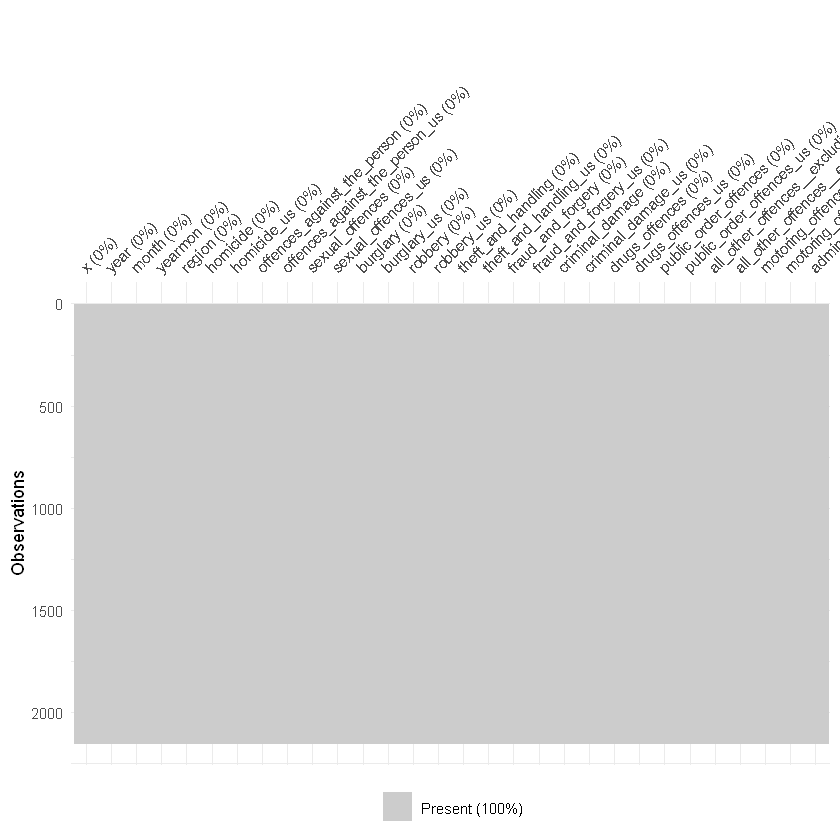

In [52]:
vis_miss(merged_df)

 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



x year month yearmon region homicide homicide_us
2150 1 1    1     1       1      1        1          
     0 0    0     0       0      0        0          
     offences_against_the_person offences_against_the_person_us sexual_offences
2150 1                           1                              1              
     0                           0                              0              
     ⋯ drugs_offences drugs_offences_us public_order_offences
2150 ⋯ 1              1                 1                    
     ⋯ 0              0                 0                    
     public_order_offences_us all_other_offences__excluding_motoring_
2150 1                        1                                      
     0                        0                                      
     all_other_offences__excluding_motoring__us motoring_offences
2150 1                                          1                
     0                                          0                
     motoring_offences_us admin_finalised_us  
2150 1                    1                  0
     0                    0                  0

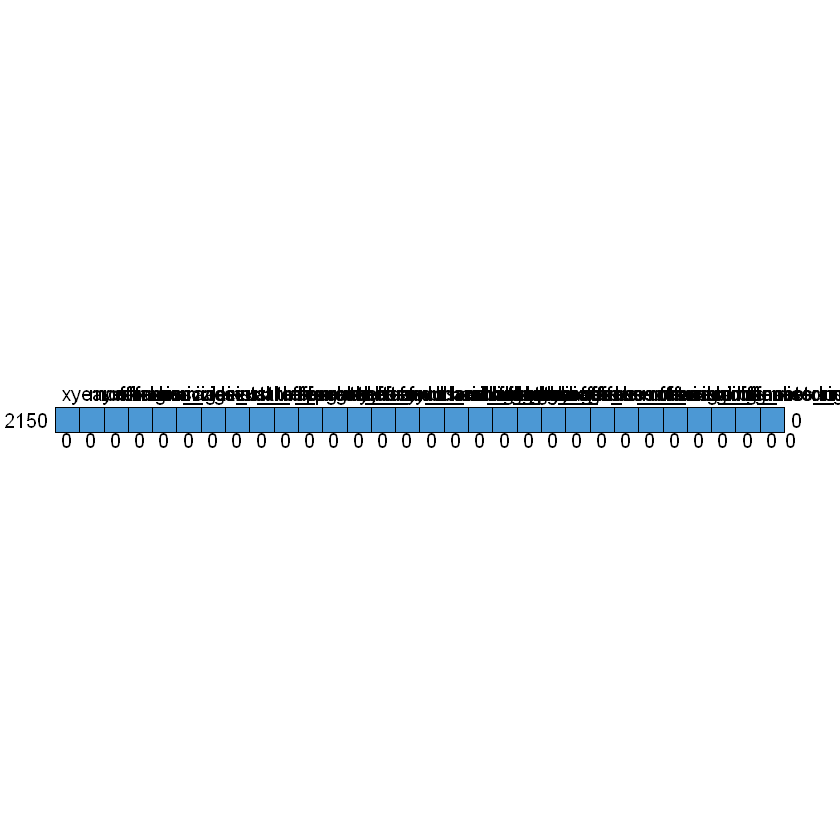

In [53]:
md.pattern(merged_df)

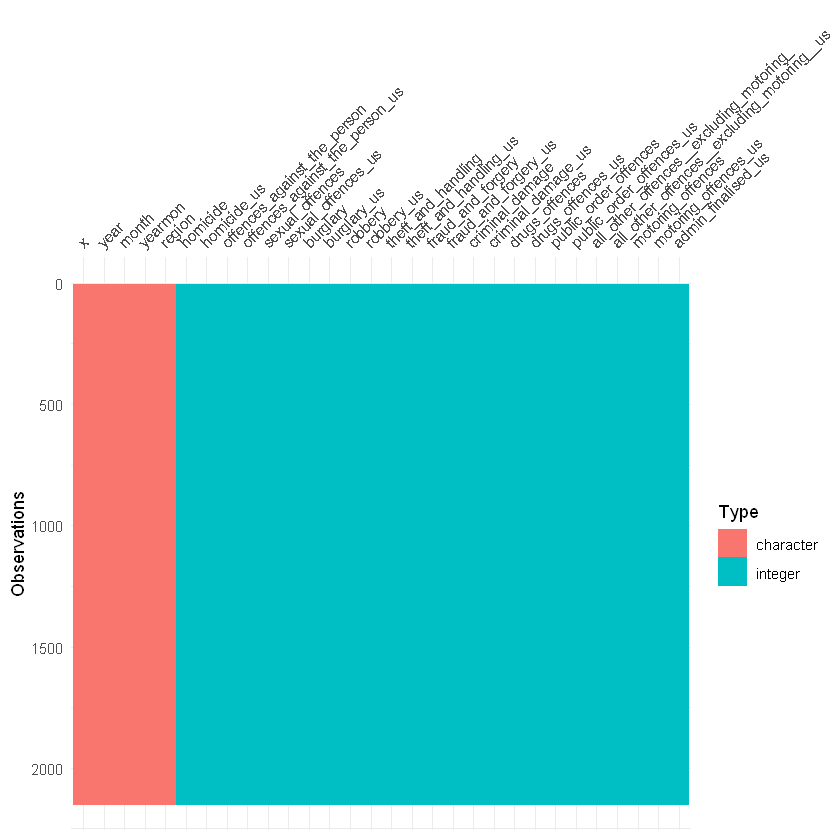

In [54]:
vis_dat(merged_df)

In [55]:
split_dataframe <- function(df){
  crime_columns = !grepl("_us$", colnames(df))
  unsuccesful_columns = grepl("_us$",  colnames(df))
  unsuccesful_columns[0:5] <- TRUE
  df1 <- df[, crime_columns]
  df2 <- df[, unsuccesful_columns]
  return(list(df1, df2))
}

In [56]:
splited_dataframes <- split_dataframe(merged_df)

In [57]:
head(splited_dataframes[1])

[[1]]
                         x year month    yearmon region homicide
173               National 2014   jan 2014-01-01    All       51
174      Avon and Somerset 2014   jan 2014-01-01   West        0
175           Bedfordshire 2014   jan 2014-01-01   East        0
176         Cambridgeshire 2014   jan 2014-01-01   East        0
177               Cheshire 2014   jan 2014-01-01  North        0
178              Cleveland 2014   jan 2014-01-01  North        2
179                Cumbria 2014   jan 2014-01-01  North        0
180             Derbyshire 2014   jan 2014-01-01   East        0
181     Devon and Cornwall 2014   jan 2014-01-01   West        0
182                 Dorset 2014   jan 2014-01-01   West        0
183                 Durham 2014   jan 2014-01-01  North        1
184            Dyfed Powys 2014   jan 2014-01-01   West        0
185                  Essex 2014   jan 2014-01-01   East        3
186        Gloucestershire 2014   jan 2014-01-01   West        0
187      GreaterManchester 2014   jan 2014-01-01  North        2
188                  Gwent 2014   jan 2014-01-01   West        0
189              Hampshire 2014   jan 2014-01-01  South        0
190          Hertfordshire 2014   jan 2014-01-01   East        3
191             Humberside 2014   jan 2014-01-01  North        0
192                   Kent 2014   jan 2014-01-01  South        0
193             Lancashire 2014   jan 2014-01-01  North        4
194         Leicestershire 2014   jan 2014-01-01   East        2
195           Lincolnshire 2014   jan 2014-01-01   East        1
196             Merseyside 2014   jan 2014-01-01  North        2
197  Metropolitan and City 2014   jan 2014-01-01  South       13
198                Norfolk 2014   jan 2014-01-01   East        0
199       Northamptonshire 2014   jan 2014-01-01   East        0
200            Northumbria 2014   jan 2014-01-01  North        3
201            North Wales 2014   jan 2014-01-01  North        1
202        North Yorkshire 2014   jan 2014-01-01  North        0
203        Nottinghamshire 2014   jan 2014-01-01   East        0
204            South Wales 2014   jan 2014-01-01   West        0
205        South Yorkshire 2014   jan 2014-01-01  North        2
206          Staffordshire 2014   jan 2014-01-01   West        2
207                Suffolk 2014   jan 2014-01-01   East        1
208                 Surrey 2014   jan 2014-01-01  South        0
209                 Sussex 2014   jan 2014-01-01  South        0
210          Thames Valley 2014   jan 2014-01-01  South        4
211           Warwickshire 2014   jan 2014-01-01   West        0
212            West Mercia 2014   jan 2014-01-01   West        0
213          West Midlands 2014   jan 2014-01-01   West        1
214         West Yorkshire 2014   jan 2014-01-01  North        3
215              Wiltshire 2014   jan 2014-01-01   West        1
130               National 2014   feb 2014-02-01    All       61
131      Avon and Somerset 2014   feb 2014-02-01   West        0
132           Bedfordshire 2014   feb 2014-02-01   East        0
133         Cambridgeshire 2014   feb 2014-02-01   East        0
134               Cheshire 2014   feb 2014-02-01  North        0
135              Cleveland 2014   feb 2014-02-01  North        0
136                Cumbria 2014   feb 2014-02-01  North        0
137             Derbyshire 2014   feb 2014-02-01   East        1
138     Devon and Cornwall 2014   feb 2014-02-01   West        0
139                 Dorset 2014   feb 2014-02-01   West        1
140                 Durham 2014   feb 2014-02-01  North        1
141            Dyfed Powys 2014   feb 2014-02-01   West        1
142                  Essex 2014   feb 2014-02-01   East        0
143        Gloucestershire 2014   feb 2014-02-01   West        0
144      GreaterManchester 2014   feb 2014-02-01  North        0
145                  Gwent 2014   feb 2014-02-01   West        0
146              Hampshire 2014   feb 2014-02-01  South        0
147          Hertfordshire 20

In [58]:
tail(splited_dataframes[1])

[[1]]
                         x year month    yearmon region homicide
173               National 2014   jan 2014-01-01    All       51
174      Avon and Somerset 2014   jan 2014-01-01   West        0
175           Bedfordshire 2014   jan 2014-01-01   East        0
176         Cambridgeshire 2014   jan 2014-01-01   East        0
177               Cheshire 2014   jan 2014-01-01  North        0
178              Cleveland 2014   jan 2014-01-01  North        2
179                Cumbria 2014   jan 2014-01-01  North        0
180             Derbyshire 2014   jan 2014-01-01   East        0
181     Devon and Cornwall 2014   jan 2014-01-01   West        0
182                 Dorset 2014   jan 2014-01-01   West        0
183                 Durham 2014   jan 2014-01-01  North        1
184            Dyfed Powys 2014   jan 2014-01-01   West        0
185                  Essex 2014   jan 2014-01-01   East        3
186        Gloucestershire 2014   jan 2014-01-01   West        0
187      GreaterManchester 2014   jan 2014-01-01  North        2
188                  Gwent 2014   jan 2014-01-01   West        0
189              Hampshire 2014   jan 2014-01-01  South        0
190          Hertfordshire 2014   jan 2014-01-01   East        3
191             Humberside 2014   jan 2014-01-01  North        0
192                   Kent 2014   jan 2014-01-01  South        0
193             Lancashire 2014   jan 2014-01-01  North        4
194         Leicestershire 2014   jan 2014-01-01   East        2
195           Lincolnshire 2014   jan 2014-01-01   East        1
196             Merseyside 2014   jan 2014-01-01  North        2
197  Metropolitan and City 2014   jan 2014-01-01  South       13
198                Norfolk 2014   jan 2014-01-01   East        0
199       Northamptonshire 2014   jan 2014-01-01   East        0
200            Northumbria 2014   jan 2014-01-01  North        3
201            North Wales 2014   jan 2014-01-01  North        1
202        North Yorkshire 2014   jan 2014-01-01  North        0
203        Nottinghamshire 2014   jan 2014-01-01   East        0
204            South Wales 2014   jan 2014-01-01   West        0
205        South Yorkshire 2014   jan 2014-01-01  North        2
206          Staffordshire 2014   jan 2014-01-01   West        2
207                Suffolk 2014   jan 2014-01-01   East        1
208                 Surrey 2014   jan 2014-01-01  South        0
209                 Sussex 2014   jan 2014-01-01  South        0
210          Thames Valley 2014   jan 2014-01-01  South        4
211           Warwickshire 2014   jan 2014-01-01   West        0
212            West Mercia 2014   jan 2014-01-01   West        0
213          West Midlands 2014   jan 2014-01-01   West        1
214         West Yorkshire 2014   jan 2014-01-01  North        3
215              Wiltshire 2014   jan 2014-01-01   West        1
130               National 2014   feb 2014-02-01    All       61
131      Avon and Somerset 2014   feb 2014-02-01   West        0
132           Bedfordshire 2014   feb 2014-02-01   East        0
133         Cambridgeshire 2014   feb 2014-02-01   East        0
134               Cheshire 2014   feb 2014-02-01  North        0
135              Cleveland 2014   feb 2014-02-01  North        0
136                Cumbria 2014   feb 2014-02-01  North        0
137             Derbyshire 2014   feb 2014-02-01   East        1
138     Devon and Cornwall 2014   feb 2014-02-01   West        0
139                 Dorset 2014   feb 2014-02-01   West        1
140                 Durham 2014   feb 2014-02-01  North        1
141            Dyfed Powys 2014   feb 2014-02-01   West        1
142                  Essex 2014   feb 2014-02-01   East        0
143        Gloucestershire 2014   feb 2014-02-01   West        0
144      GreaterManchester 2014   feb 2014-02-01  North        0
145                  Gwent 2014   feb 2014-02-01   West        0
146              Hampshire 2014   feb 2014-02-01  South        0
147          Hertfordshire 20

In [59]:
str(splited_dataframes[1])

List of 1
 $ :'data.frame':	2150 obs. of  17 variables:
  ..$ x                                      : chr [1:2150] "National" "Avon and Somerset" "Bedfordshire" "Cambridgeshire" ...
  ..$ year                                   : chr [1:2150] "2014" "2014" "2014" "2014" ...
  ..$ month                                  : chr [1:2150] "jan" "jan" "jan" "jan" ...
  ..$ yearmon                                : chr [1:2150] "2014-01-01" "2014-01-01" "2014-01-01" "2014-01-01" ...
  ..$ region                                 : chr [1:2150] "All" "West" "East" "East" ...
  ..$ homicide                               : int [1:2150] 51 0 0 0 0 2 0 0 0 0 ...
  ..$ offences_against_the_person            : int [1:2150] 9087 228 68 101 170 119 113 135 220 87 ...
  ..$ sexual_offences                        : int [1:2150] 736 35 2 10 15 11 4 22 16 6 ...
  ..$ burglary                               : int [1:2150] 1715 49 7 18 38 36 16 36 25 20 ...
  ..$ robbery                                : int [1:2

In [60]:
head(splited_dataframes[2])

[[1]]
                         x year month    yearmon region homicide_us
173               National 2014   jan 2014-01-01    All          11
174      Avon and Somerset 2014   jan 2014-01-01   West           0
175           Bedfordshire 2014   jan 2014-01-01   East           1
176         Cambridgeshire 2014   jan 2014-01-01   East           0
177               Cheshire 2014   jan 2014-01-01  North           0
178              Cleveland 2014   jan 2014-01-01  North           3
179                Cumbria 2014   jan 2014-01-01  North           0
180             Derbyshire 2014   jan 2014-01-01   East           1
181     Devon and Cornwall 2014   jan 2014-01-01   West           0
182                 Dorset 2014   jan 2014-01-01   West           0
183                 Durham 2014   jan 2014-01-01  North           0
184            Dyfed Powys 2014   jan 2014-01-01   West           0
185                  Essex 2014   jan 2014-01-01   East           0
186        Gloucestershire 2014   jan 2014-01-01   West           0
187      GreaterManchester 2014   jan 2014-01-01  North           1
188                  Gwent 2014   jan 2014-01-01   West           0
189              Hampshire 2014   jan 2014-01-01  South           0
190          Hertfordshire 2014   jan 2014-01-01   East           0
191             Humberside 2014   jan 2014-01-01  North           1
192                   Kent 2014   jan 2014-01-01  South           0
193             Lancashire 2014   jan 2014-01-01  North           0
194         Leicestershire 2014   jan 2014-01-01   East           1
195           Lincolnshire 2014   jan 2014-01-01   East           0
196             Merseyside 2014   jan 2014-01-01  North           1
197  Metropolitan and City 2014   jan 2014-01-01  South           0
198                Norfolk 2014   jan 2014-01-01   East           0
199       Northamptonshire 2014   jan 2014-01-01   East           0
200            Northumbria 2014   jan 2014-01-01  North           0
201            North Wales 2014   jan 2014-01-01  North           0
202        North Yorkshire 2014   jan 2014-01-01  North           0
203        Nottinghamshire 2014   jan 2014-01-01   East           0
204            South Wales 2014   jan 2014-01-01   West           0
205        South Yorkshire 2014   jan 2014-01-01  North           1
206          Staffordshire 2014   jan 2014-01-01   West           0
207                Suffolk 2014   jan 2014-01-01   East           0
208                 Surrey 2014   jan 2014-01-01  South           0
209                 Sussex 2014   jan 2014-01-01  South           0
210          Thames Valley 2014   jan 2014-01-01  South           1
211           Warwickshire 2014   jan 2014-01-01   West           0
212            West Mercia 2014   jan 2014-01-01   West           0
213          West Midlands 2014   jan 2014-01-01   West           0
214         West Yorkshire 2014   jan 2014-01-01  North           0
215              Wiltshire 2014   jan 2014-01-01   West           0
130               National 2014   feb 2014-02-01    All          18
131      Avon and Somerset 2014   feb 2014-02-01   West           0
132           Bedfordshire 2014   feb 2014-02-01   East           0
133         Cambridgeshire 2014   feb 2014-02-01   East           0
134               Cheshire 2014   feb 2014-02-01  North           0
135              Cleveland 2014   feb 2014-02-01  North           0
136                Cumbria 2014   feb 2014-02-01  North           0
137             Derbyshire 2014   feb 2014-02-01   East           0
138     Devon and Cornwall 2014   feb 2014-02-01   West           1
139                 Dorset 2014   feb 2014-02-01   West           0
140                 Durham 2014   feb 2014-02-01  North           0
141            Dyfed Powys 2014   feb 2014-02-01   West           0
142                  Essex 2014   feb 2014-02-01   East           0
143        Gloucestershire 2014   feb 2014-02-01   West           1
144      GreaterManchester 2014   feb 2014-02-01  

In [61]:
tail(splited_dataframes[2])

[[1]]
                         x year month    yearmon region homicide_us
173               National 2014   jan 2014-01-01    All          11
174      Avon and Somerset 2014   jan 2014-01-01   West           0
175           Bedfordshire 2014   jan 2014-01-01   East           1
176         Cambridgeshire 2014   jan 2014-01-01   East           0
177               Cheshire 2014   jan 2014-01-01  North           0
178              Cleveland 2014   jan 2014-01-01  North           3
179                Cumbria 2014   jan 2014-01-01  North           0
180             Derbyshire 2014   jan 2014-01-01   East           1
181     Devon and Cornwall 2014   jan 2014-01-01   West           0
182                 Dorset 2014   jan 2014-01-01   West           0
183                 Durham 2014   jan 2014-01-01  North           0
184            Dyfed Powys 2014   jan 2014-01-01   West           0
185                  Essex 2014   jan 2014-01-01   East           0
186        Gloucestershire 2014   jan 2014-01-01   West           0
187      GreaterManchester 2014   jan 2014-01-01  North           1
188                  Gwent 2014   jan 2014-01-01   West           0
189              Hampshire 2014   jan 2014-01-01  South           0
190          Hertfordshire 2014   jan 2014-01-01   East           0
191             Humberside 2014   jan 2014-01-01  North           1
192                   Kent 2014   jan 2014-01-01  South           0
193             Lancashire 2014   jan 2014-01-01  North           0
194         Leicestershire 2014   jan 2014-01-01   East           1
195           Lincolnshire 2014   jan 2014-01-01   East           0
196             Merseyside 2014   jan 2014-01-01  North           1
197  Metropolitan and City 2014   jan 2014-01-01  South           0
198                Norfolk 2014   jan 2014-01-01   East           0
199       Northamptonshire 2014   jan 2014-01-01   East           0
200            Northumbria 2014   jan 2014-01-01  North           0
201            North Wales 2014   jan 2014-01-01  North           0
202        North Yorkshire 2014   jan 2014-01-01  North           0
203        Nottinghamshire 2014   jan 2014-01-01   East           0
204            South Wales 2014   jan 2014-01-01   West           0
205        South Yorkshire 2014   jan 2014-01-01  North           1
206          Staffordshire 2014   jan 2014-01-01   West           0
207                Suffolk 2014   jan 2014-01-01   East           0
208                 Surrey 2014   jan 2014-01-01  South           0
209                 Sussex 2014   jan 2014-01-01  South           0
210          Thames Valley 2014   jan 2014-01-01  South           1
211           Warwickshire 2014   jan 2014-01-01   West           0
212            West Mercia 2014   jan 2014-01-01   West           0
213          West Midlands 2014   jan 2014-01-01   West           0
214         West Yorkshire 2014   jan 2014-01-01  North           0
215              Wiltshire 2014   jan 2014-01-01   West           0
130               National 2014   feb 2014-02-01    All          18
131      Avon and Somerset 2014   feb 2014-02-01   West           0
132           Bedfordshire 2014   feb 2014-02-01   East           0
133         Cambridgeshire 2014   feb 2014-02-01   East           0
134               Cheshire 2014   feb 2014-02-01  North           0
135              Cleveland 2014   feb 2014-02-01  North           0
136                Cumbria 2014   feb 2014-02-01  North           0
137             Derbyshire 2014   feb 2014-02-01   East           0
138     Devon and Cornwall 2014   feb 2014-02-01   West           1
139                 Dorset 2014   feb 2014-02-01   West           0
140                 Durham 2014   feb 2014-02-01  North           0
141            Dyfed Powys 2014   feb 2014-02-01   West           0
142                  Essex 2014   feb 2014-02-01   East           0
143        Gloucestershire 2014   feb 2014-02-01   West           1
144      GreaterManchester 2014   feb 2014-02-01  

In [62]:
str(splited_dataframes[2])

List of 1
 $ :'data.frame':	2150 obs. of  18 variables:
  ..$ x                                         : chr [1:2150] "National" "Avon and Somerset" "Bedfordshire" "Cambridgeshire" ...
  ..$ year                                      : chr [1:2150] "2014" "2014" "2014" "2014" ...
  ..$ month                                     : chr [1:2150] "jan" "jan" "jan" "jan" ...
  ..$ yearmon                                   : chr [1:2150] "2014-01-01" "2014-01-01" "2014-01-01" "2014-01-01" ...
  ..$ region                                    : chr [1:2150] "All" "West" "East" "East" ...
  ..$ homicide_us                               : int [1:2150] 11 0 1 0 0 3 0 1 0 0 ...
  ..$ offences_against_the_person_us            : int [1:2150] 2930 62 29 21 40 44 13 58 64 29 ...
  ..$ sexual_offences_us                        : int [1:2150] 286 17 1 3 1 6 3 7 3 7 ...
  ..$ burglary_us                               : int [1:2150] 284 1 4 4 5 2 0 4 4 1 ...
  ..$ robbery_us                                :

In [63]:
glimpse(splited_dataframes[2])

List of 1
 $ :'data.frame':	2150 obs. of  18 variables:
  ..$ x                                         : chr [1:2150] "National" "Avon and Somerset" "Bedfordshire" "Cambridgeshire" ...
  ..$ year                                      : chr [1:2150] "2014" "2014" "2014" "2014" ...
  ..$ month                                     : chr [1:2150] "jan" "jan" "jan" "jan" ...
  ..$ yearmon                                   : chr [1:2150] "2014-01-01" "2014-01-01" "2014-01-01" "2014-01-01" ...
  ..$ region                                    : chr [1:2150] "All" "West" "East" "East" ...
  ..$ homicide_us                               : int [1:2150] 11 0 1 0 0 3 0 1 0 0 ...
  ..$ offences_against_the_person_us            : int [1:2150] 2930 62 29 21 40 44 13 58 64 29 ...
  ..$ sexual_offences_us                        : int [1:2150] 286 17 1 3 1 6 3 7 3 7 ...
  ..$ burglary_us                               : int [1:2150] 284 1 4 4 5 2 0 4 4 1 ...
  ..$ robbery_us                                :

In [64]:
write.csv(splited_dataframes[1], file = "cleaned_crime_data.csv", row.names=FALSE)

In [65]:
write.csv(splited_dataframes[2], file = "cleaned_unsuccessful_crime_data.csv", row.names=FALSE)

In [66]:
write.csv(merged_df, "cleaned_data.csv", row.names=FALSE)

# Descriptie Analytics

In [67]:
crime_df = read.csv("cleaned_crime_data.csv")

In [68]:
summary(crime_df)

      x                  year         month             yearmon         
 Length:2150        Min.   :2014   Length:2150        Length:2150       
 Class :character   1st Qu.:2015   Class :character   Class :character  
 Mode  :character   Median :2016   Mode  :character   Mode  :character  
                    Mean   :2016                                        
                    3rd Qu.:2017                                        
                    Max.   :2018                                        
    region             homicide       offences_against_the_person
 Length:2150        Min.   :  0.000   Min.   :   29.0            
 Class :character   1st Qu.:  0.000   1st Qu.:  115.0            
 Mode  :character   Median :  1.000   Median :  178.0            
                    Mean   :  3.769   Mean   :  454.5            
                    3rd Qu.:  3.000   3rd Qu.:  272.0            
                    Max.   :131.000   Max.   :11741.0            
 sexual_offences      burgl

In [69]:
glimpse(crime_df)

Rows: 2,150
Columns: 17
$ x                                       <chr> "National", "Avon and Somerset…
$ year                                    <int> 2014, 2014, 2014, 2014, 2014, …
$ month                                   <chr> "jan", "jan", "jan", "jan", "j…
$ yearmon                                 <chr> "2014-01-01", "2014-01-01", "2…
$ region                                  <chr> "All", "West", "East", "East",…
$ homicide                                <int> 51, 0, 0, 0, 0, 2, 0, 0, 0, 0,…
$ offences_against_the_person             <int> 9087, 228, 68, 101, 170, 119, …
$ sexual_offences                         <int> 736, 35, 2, 10, 15, 11, 4, 22,…
$ burglary                                <int> 1715, 49, 7, 18, 38, 36, 16, 3…
$ robbery                                 <int> 522, 8, 16, 6, 10, 3, 1, 5, 10…
$ theft_and_handling                      <int> 11057, 338, 75, 148, 205, 334,…
$ fraud_and_forgery                       <int> 846, 18, 17, 10, 14, 11, 6, 15…
$ criminal_damag

In [70]:
head(crime_df)

x                 year month yearmon    region homicide
1 National          2014 jan   2014-01-01 All    51      
2 Avon and Somerset 2014 jan   2014-01-01 West    0      
3 Bedfordshire      2014 jan   2014-01-01 East    0      
4 Cambridgeshire    2014 jan   2014-01-01 East    0      
5 Cheshire          2014 jan   2014-01-01 North   0      
6 Cleveland         2014 jan   2014-01-01 North   2      
  offences_against_the_person sexual_offences burglary robbery
1 9087                        736             1715     522    
2  228                         35               49       8    
3   68                          2                7      16    
4  101                         10               18       6    
5  170                         15               38      10    
6  119                         11               36       3    
  theft_and_handling fraud_and_forgery criminal_damage drugs_offences
1 11057              846               2693            4988          
2   338               18                 93             148          
3    75               17                 22              31          
4   148               10                 30              47          
5   205               14                 39              64          
6   334               11                 46              65          
  public_order_offences all_other_offences__excluding_motoring_
1 4752                  3291                                   
2  123                    63                                   
3   30                    13                                   
4   37                    28                                   
5   77                    50                                   
6  123                    34                                   
  motoring_offences
1 12945            
2   256            
3   171            
4   103            
5   264            
6   228

In [71]:
tail(crime_df)

x              year month yearmon    region homicide
2145 Thames Valley  2018 dec   2018-12-01 South  1       
2146 Warwickshire   2018 dec   2018-12-01 West   1       
2147 West Mercia    2018 dec   2018-12-01 West   0       
2148 West Midlands  2018 dec   2018-12-01 West   8       
2149 West Yorkshire 2018 dec   2018-12-01 North  2       
2150 Wiltshire      2018 dec   2018-12-01 West   1       
     offences_against_the_person sexual_offences burglary robbery
2145 257                         55              29        6     
2146  57                          6               5        0     
2147 162                         19              12        4     
2148 519                         47              36       39     
2149 417                         53              52       16     
2150  88                          3               8        0     
     theft_and_handling fraud_and_forgery criminal_damage drugs_offences
2145 144                22                37               92           
2146  39                 2                 8                4           
2147 104                15                22               39           
2148 340                45                63              203           
2149 234                21                71               96           
2150  65                 9                16               27           
     public_order_offences all_other_offences__excluding_motoring_
2145  68                   16                                     
2146  17                    0                                     
2147  53                    7                                     
2148 189                   57                                     
2149 113                   44                                     
2150  21                    2                                     
     motoring_offences
2145 229              
2146  67              
2147 137              
2148 227              
2149 261              
2150  60

In [72]:
new_crime_df <- crime_df

In [73]:
uscrime_df = read.csv("cleaned_unsuccessful_crime_data.csv")

In [74]:
str(uscrime_df)

'data.frame':	2150 obs. of  18 variables:
 $ x                                         : chr  "National" "Avon and Somerset" "Bedfordshire" "Cambridgeshire" ...
 $ year                                      : int  2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 ...
 $ month                                     : chr  "jan" "jan" "jan" "jan" ...
 $ yearmon                                   : chr  "2014-01-01" "2014-01-01" "2014-01-01" "2014-01-01" ...
 $ region                                    : chr  "All" "West" "East" "East" ...
 $ homicide_us                               : int  11 0 1 0 0 3 0 1 0 0 ...
 $ offences_against_the_person_us            : int  2930 62 29 21 40 44 13 58 64 29 ...
 $ sexual_offences_us                        : int  286 17 1 3 1 6 3 7 3 7 ...
 $ burglary_us                               : int  284 1 4 4 5 2 0 4 4 1 ...
 $ robbery_us                                : int  139 0 7 4 0 2 0 2 0 0 ...
 $ theft_and_handling_us                     : int  998 32 4 1

In [75]:
head(uscrime_df)

x                 year month yearmon    region homicide_us
1 National          2014 jan   2014-01-01 All    11         
2 Avon and Somerset 2014 jan   2014-01-01 West    0         
3 Bedfordshire      2014 jan   2014-01-01 East    1         
4 Cambridgeshire    2014 jan   2014-01-01 East    0         
5 Cheshire          2014 jan   2014-01-01 North   0         
6 Cleveland         2014 jan   2014-01-01 North   3         
  offences_against_the_person_us sexual_offences_us burglary_us robbery_us
1 2930                           286                284         139       
2   62                            17                  1           0       
3   29                             1                  4           7       
4   21                             3                  4           4       
5   40                             1                  5           0       
6   44                             6                  2           2       
  theft_and_handling_us fraud_and_forgery_us criminal_damage_us
1 998                   137                  472               
2  32                     0                   14               
3   4                     3                    8               
4  15                     4                    3               
5   5                     1                    3               
6  31                     3                   13               
  drugs_offences_us public_order_offences_us
1 305               797                     
2   4                28                     
3   3                 9                     
4   1                 2                     
5   3                 8                     
6   2                27                     
  all_other_offences__excluding_motoring__us motoring_offences_us
1 586                                        1466                
2   9                                          40                
3   2                                          13                
4   9                                          16                
5   5                                          16                
6  14                                          16                
  admin_finalised_us
1 890               
2  20               
3  12               
4  14               
5  13               
6   3

In [76]:
tail(uscrime_df)

x              year month yearmon    region homicide_us
2145 Thames Valley  2018 dec   2018-12-01 South  1          
2146 Warwickshire   2018 dec   2018-12-01 West   1          
2147 West Mercia    2018 dec   2018-12-01 West   1          
2148 West Midlands  2018 dec   2018-12-01 West   0          
2149 West Yorkshire 2018 dec   2018-12-01 North  0          
2150 Wiltshire      2018 dec   2018-12-01 West   1          
     offences_against_the_person_us sexual_offences_us burglary_us robbery_us
2145  70                            20                 4           1         
2146  14                             5                 0           1         
2147  36                             4                 4           3         
2148 131                            24                 7           8         
2149  81                            19                 2           3         
2150  13                             2                 0           0         
     theft_and_handling_us fraud_and_forgery_us criminal_damage_us
2145 14                    4                    10                
2146  4                    0                     0                
2147  5                    0                     3                
2148 35                    4                    17                
2149 26                    5                    14                
2150  1                    0                     3                
     drugs_offences_us public_order_offences_us
2145  6                12                      
2146  0                 4                      
2147  0                 3                      
2148 10                23                      
2149  8                18                      
2150  1                 2                      
     all_other_offences__excluding_motoring__us motoring_offences_us
2145  1                                         24                  
2146  2                                         10                  
2147  1                                         17                  
2148 12                                         31                  
2149  3                                         42                  
2150  0                                          4                  
     admin_finalised_us
2145 21                
2146  7                
2147 10                
2148 69                
2149 39                
2150  5

# Describe the spread, centrality and variance of the dataset

In [77]:
min(crime_df$criminal_damage)

[1] 3

In [78]:
max(crime_df$criminal_damage)

[1] 2693

In [79]:
range(crime_df$criminal_damage)

[1]    3 2693

# Feature Analysis

In [80]:
print_summary <- function(dataframe){
  for (i in colnames(dataframe)){
    print(i)
    print(summary(dataframe[,i]))
  }
}

In [81]:
print_summary(crime_df)

[1] "x"
   Length     Class      Mode 
     2150 character character 
[1] "year"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2014    2015    2016    2016    2017    2018 
[1] "month"
   Length     Class      Mode 
     2150 character character 
[1] "yearmon"
   Length     Class      Mode 
     2150 character character 
[1] "region"
   Length     Class      Mode 
     2150 character character 
[1] "homicide"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   3.769   3.000 131.000 
[1] "offences_against_the_person"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   29.0   115.0   178.0   454.5   272.0 11741.0 
[1] "sexual_offences"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    8.00   15.00   43.76   29.00 1179.00 
[1] "burglary"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   14.00   23.00   60.18   38.00 1715.00 
[1] "robbery"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    2.00    5.00   19.38   10.00  650.00 
[1] "t

# Regional Analysis

In [82]:
# Assuming your dataframe is called 'dataframe' and you want to convert columns 6 and onwards to integer

columns_to_convert <- 6:ncol(crime_df)
crime_df[, columns_to_convert] <- sapply(crime_df[, columns_to_convert], as.integer)


In [83]:
head(crime_df)

x                 year month yearmon    region homicide
1 National          2014 jan   2014-01-01 All    51      
2 Avon and Somerset 2014 jan   2014-01-01 West    0      
3 Bedfordshire      2014 jan   2014-01-01 East    0      
4 Cambridgeshire    2014 jan   2014-01-01 East    0      
5 Cheshire          2014 jan   2014-01-01 North   0      
6 Cleveland         2014 jan   2014-01-01 North   2      
  offences_against_the_person sexual_offences burglary robbery
1 9087                        736             1715     522    
2  228                         35               49       8    
3   68                          2                7      16    
4  101                         10               18       6    
5  170                         15               38      10    
6  119                         11               36       3    
  theft_and_handling fraud_and_forgery criminal_damage drugs_offences
1 11057              846               2693            4988          
2   338               18                 93             148          
3    75               17                 22              31          
4   148               10                 30              47          
5   205               14                 39              64          
6   334               11                 46              65          
  public_order_offences all_other_offences__excluding_motoring_
1 4752                  3291                                   
2  123                    63                                   
3   30                    13                                   
4   37                    28                                   
5   77                    50                                   
6  123                    34                                   
  motoring_offences
1 12945            
2   256            
3   171            
4   103            
5   264            
6   228

In [84]:
# Assuming the dataset is stored in a variable called 'dataset'
total_crime_by_region <- function(dataframe) {
    dataframe <- dataframe[, -c(1:4)]
    dataframe <- dataframe[dataframe$region != "All",]
    dataframe <- group_by(dataframe, region)
    summarise_all(dataframe, funs(sum))

}

In [85]:
total_crime_by_region(crime_df)

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


region homicide offences_against_the_person sexual_offences burglary robbery
1 East    692      86639                       7548           10070    3085   
2 North  1144     153877                      15014           22927    6017   
3 South  1313     134417                      13614           17589    7278   
4 West    903     113633                      10865           14109    4452   
  theft_and_handling fraud_and_forgery criminal_damage drugs_offences
1  68778              6573             18017           29692         
2 139845             10439             36409           54715         
3  98534             16305             24762           72803         
4  95447              8079             24114           43804         
  public_order_offences all_other_offences__excluding_motoring_
1 28021                  8990                                  
2 62806                 21869                                  
3 43757                 23576                                  
4 40305                 15364                                  
  motoring_offences
1  67496           
2 116817           
3 108622           
4 100530

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


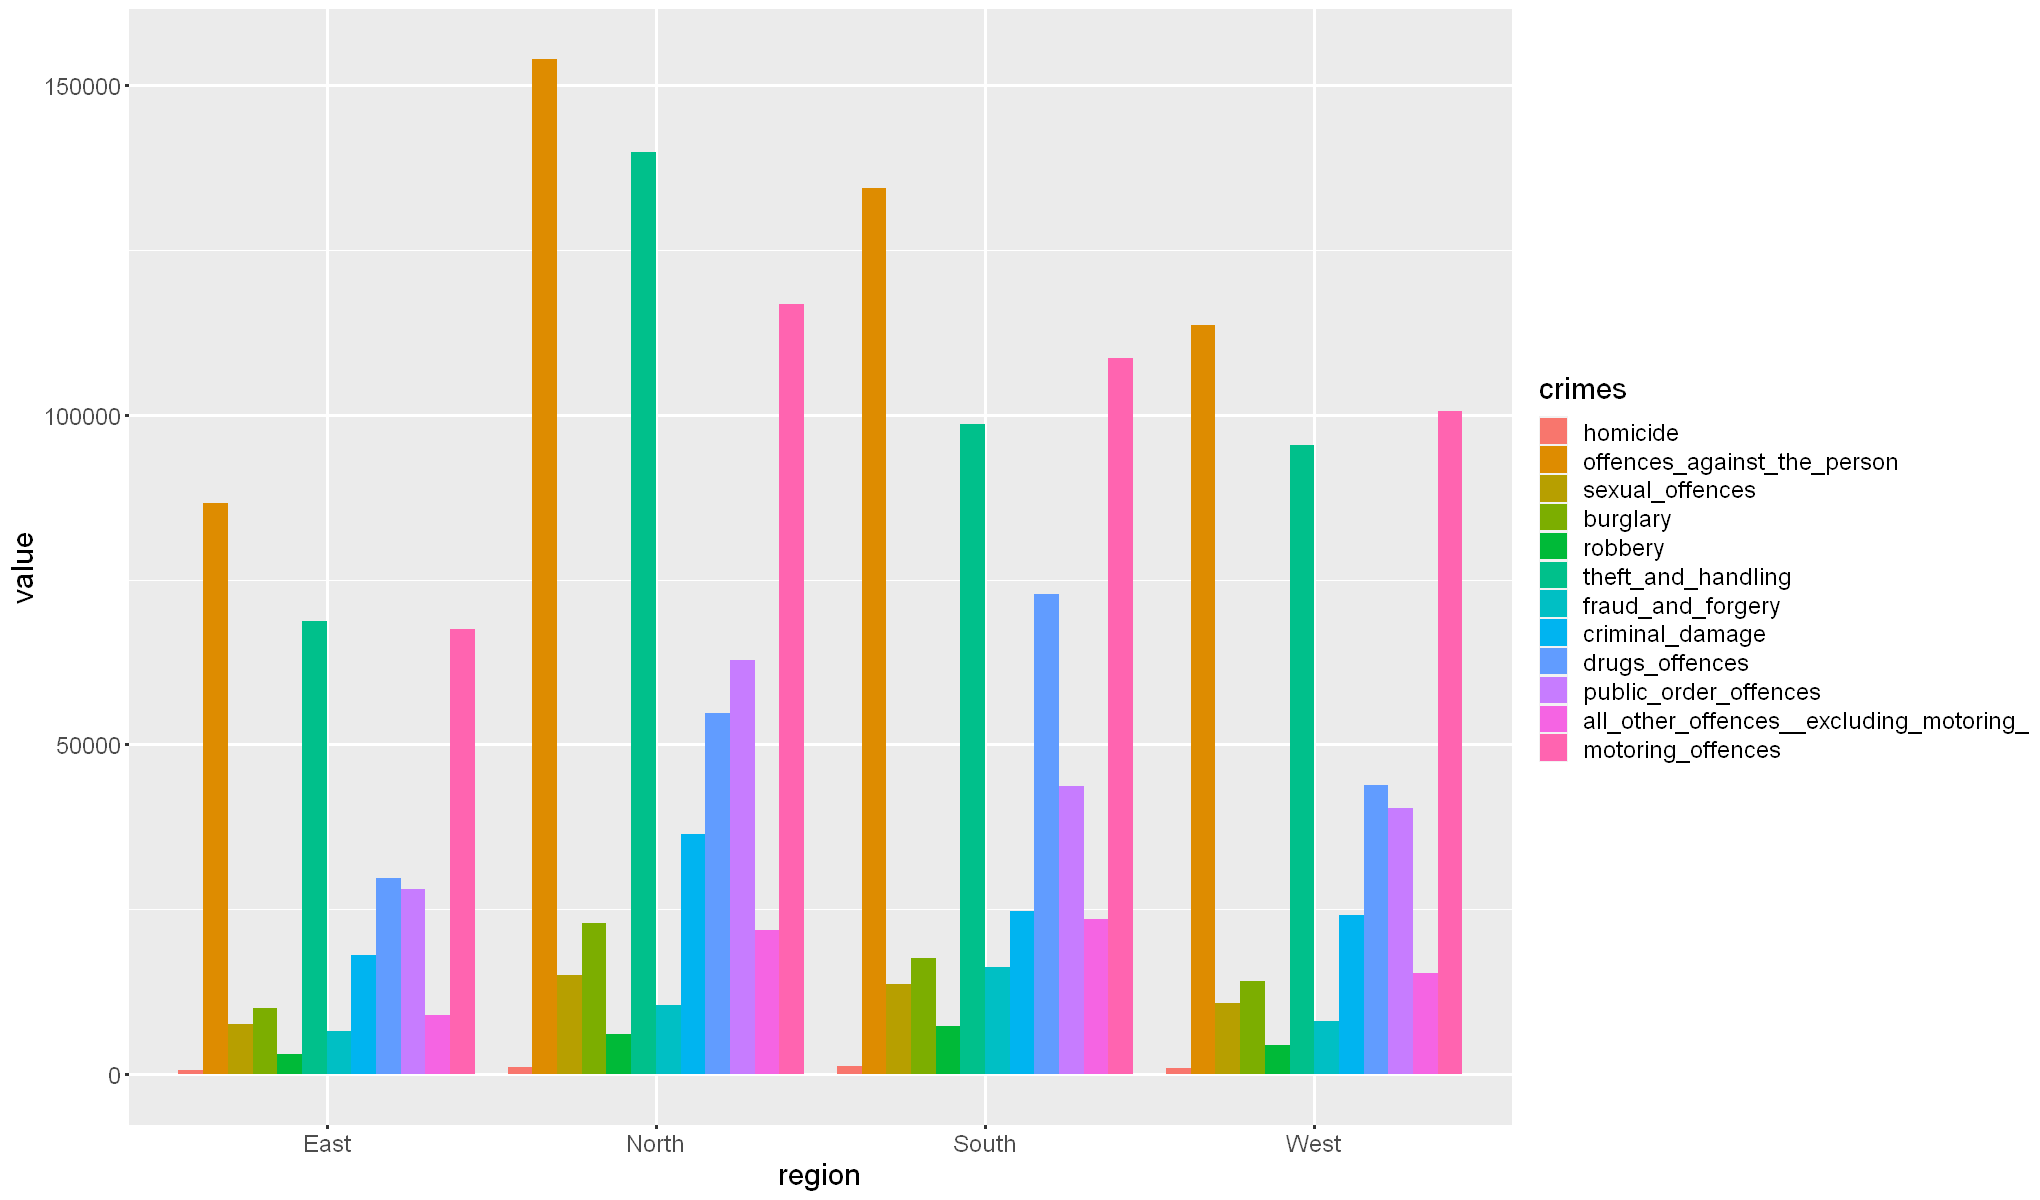

In [86]:
df <- melt(total_crime_by_region(crime_df) ,  id.vars = 'region', variable.name = 'crimes')
options(repr.plot.width = 17, repr.plot.height =10)
ggplot(df,aes(x = region, y = value)) + 
geom_bar(aes(fill = crimes),stat = "identity",position = "dodge", width = 0.9) + 
theme(text = element_text(size = 18), element_line(linewidth =1))

In [87]:
total_crime_by_region(uscrime_df)

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


region homicide_us offences_against_the_person_us sexual_offences_us
1 East   138         22829                          2163              
2 North  223         40273                          5270              
3 South  415         51121                          6095              
4 West   194         31480                          3886              
  burglary_us robbery_us theft_and_handling_us fraud_and_forgery_us
1 1626         826        6198                 1020                
2 3283        1278       10372                 1601                
3 3754        2249       12447                 2820                
4 2299        1230        7126                 1254                
  criminal_damage_us drugs_offences_us public_order_offences_us
1 3078               1921               4463                   
2 5789               3568               9210                   
3 5137               5645              10425                   
4 3711               2401               6576                   
  all_other_offences__excluding_motoring__us motoring_offences_us
1 1861                                       10765               
2 3514                                       16998               
3 5046                                       22907               
4 2532                                       14914               
  admin_finalised_us
1  7379             
2  9160             
3 16161             
4  8989

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


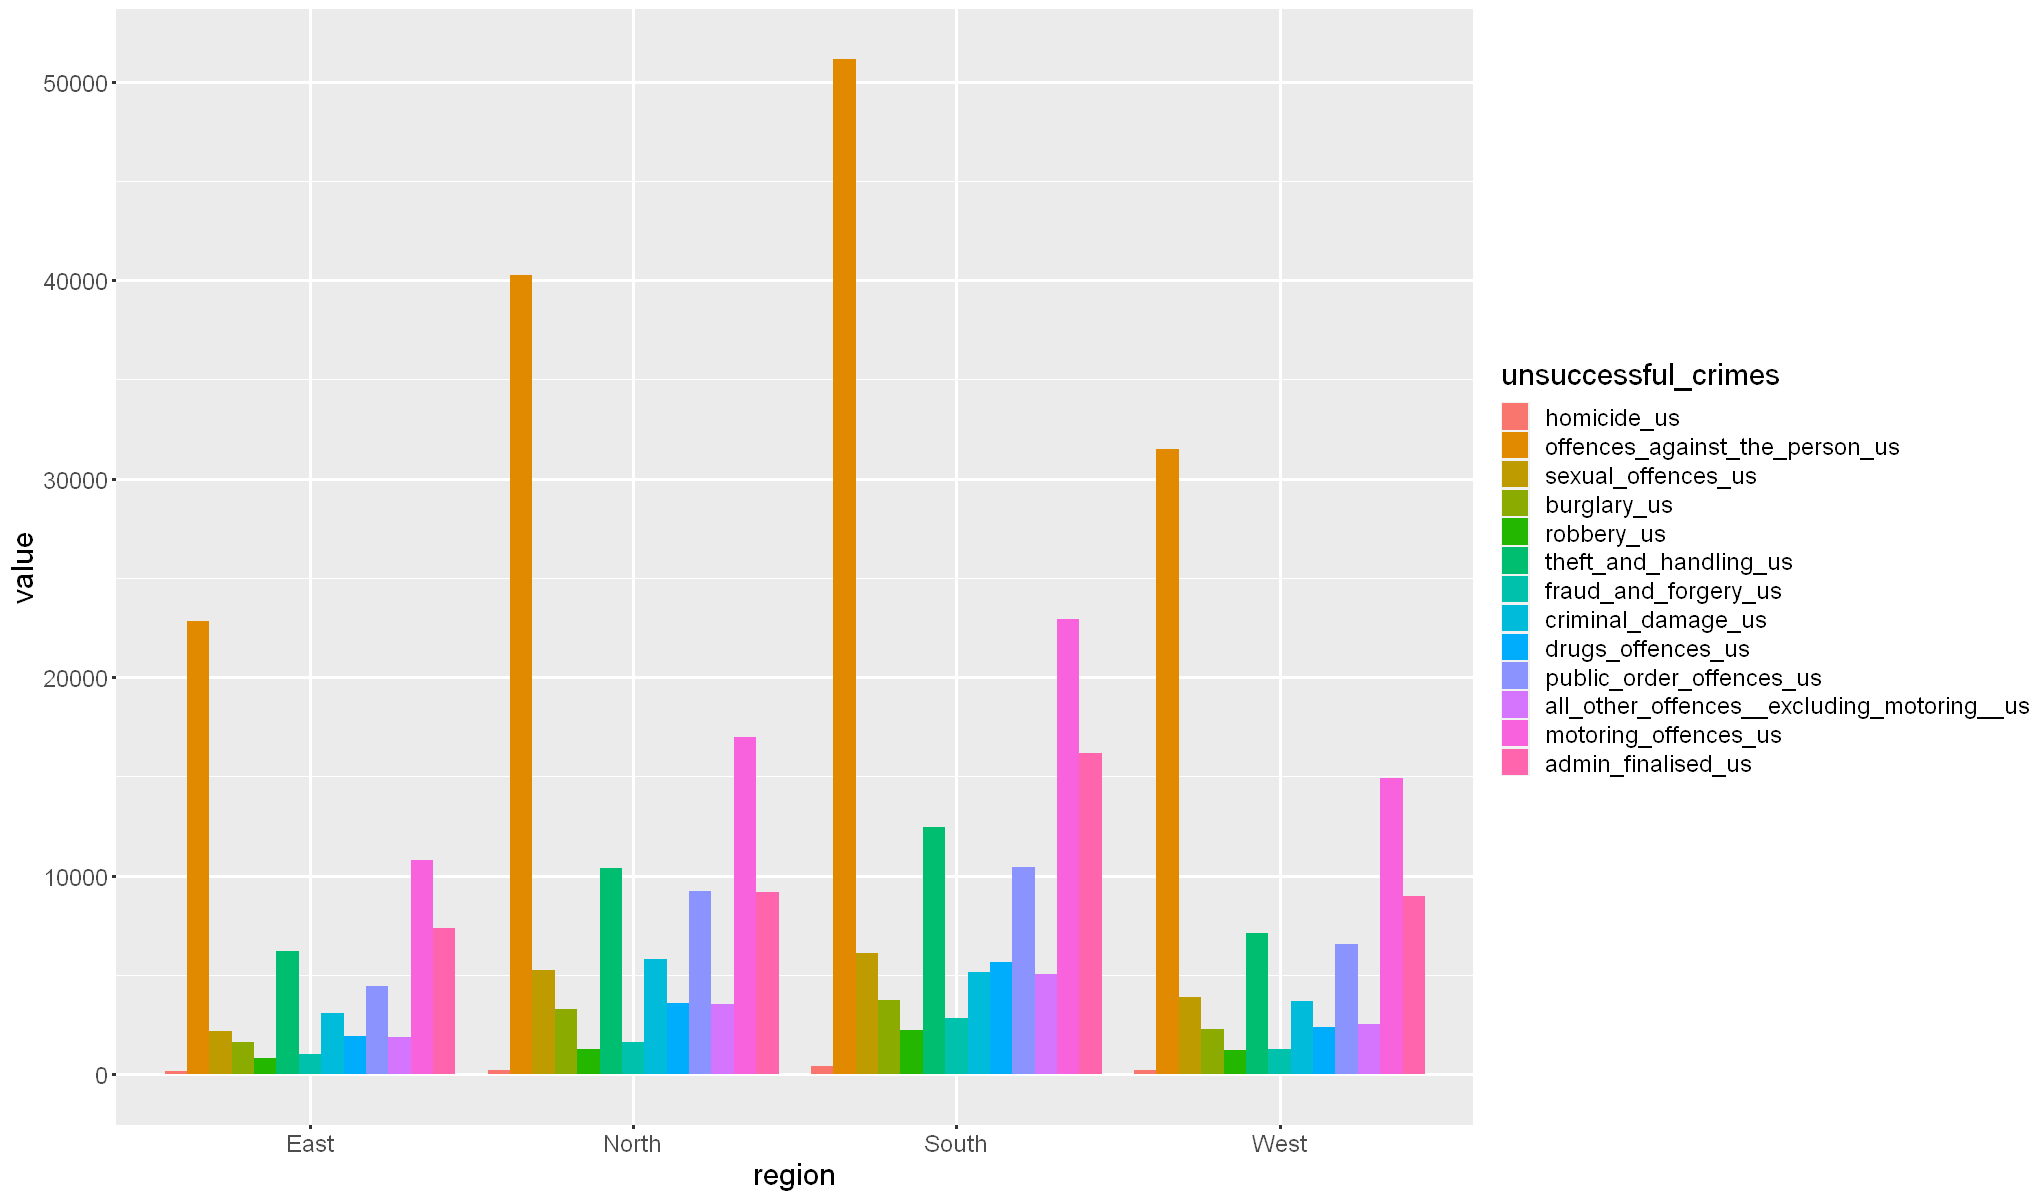

In [88]:
df <- melt(total_crime_by_region(uscrime_df) ,  id.vars = 'region', variable.name = 'unsuccessful_crimes')
options(repr.plot.width = 17, repr.plot.height =10)
ggplot(df,aes(x = region, y = value)) + 
geom_bar(aes(fill = unsuccessful_crimes),stat = "identity",position = "dodge", width = 0.9) + 
theme(text = element_text(size = 18), element_line(linewidth =1))

# The Analysis relies on the variabkles of years and months

In [89]:
head(crime_df)

x                 year month yearmon    region homicide
1 National          2014 jan   2014-01-01 All    51      
2 Avon and Somerset 2014 jan   2014-01-01 West    0      
3 Bedfordshire      2014 jan   2014-01-01 East    0      
4 Cambridgeshire    2014 jan   2014-01-01 East    0      
5 Cheshire          2014 jan   2014-01-01 North   0      
6 Cleveland         2014 jan   2014-01-01 North   2      
  offences_against_the_person sexual_offences burglary robbery
1 9087                        736             1715     522    
2  228                         35               49       8    
3   68                          2                7      16    
4  101                         10               18       6    
5  170                         15               38      10    
6  119                         11               36       3    
  theft_and_handling fraud_and_forgery criminal_damage drugs_offences
1 11057              846               2693            4988          
2   338               18                 93             148          
3    75               17                 22              31          
4   148               10                 30              47          
5   205               14                 39              64          
6   334               11                 46              65          
  public_order_offences all_other_offences__excluding_motoring_
1 4752                  3291                                   
2  123                    63                                   
3   30                    13                                   
4   37                    28                                   
5   77                    50                                   
6  123                    34                                   
  motoring_offences
1 12945            
2   256            
3   171            
4   103            
5   264            
6   228

In [90]:
# Create a visualization that displays the cumulative number of crimes per month for each year,
# including both successful and unsuccessful crimes, using the "crimes_df" and "unsucessful_crimes" datasets

group_by_year_month <- function(dataframe, year){
  dataframe <- dataframe[dataframe$year == year,]
  dataframe <- dataframe[dataframe$x != "National",]

  dataframe <- dplyr::select(dataframe, -c("year", "yearmon", "region"))
  dataframe$sum_of_all <- rowSums(dataframe[, sapply(dataframe, is.numeric)])
    
  dataframe <- dplyr::select(dataframe, c("x", "month", "sum_of_all"))
  dataframe <- group_by(dataframe, x, month)
  dataframe <- summarise_all(dataframe, funs(sum))
    
    
  return(dataframe)
}

In [91]:
plot_graph <- function(in_df, year){
  df <- melt(group_by_year_month(in_df, year) ,  id.vars = c('x', 'month'), variable.name = 'crimes')
  options(repr.plot.width = 17, repr.plot.height =10)
  ggplot(df, aes(x = value, y = reorder(x, value))) + 
  geom_bar(aes(fill = month), stat = "identity", position = "stack", width = 0.9) + 
  theme(text = element_text(size = 18), element_line(linewidth =1))
}

In [92]:
group_by_year_month(crime_df, "2014")

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


x                 month sum_of_all
1   Avon and Somerset apr   1038      
2   Avon and Somerset aug    993      
3   Avon and Somerset dec   1112      
4   Avon and Somerset feb   1275      
5   Avon and Somerset jan   1359      
6   Avon and Somerset jul   1410      
7   Avon and Somerset jun   1089      
8   Avon and Somerset mar   1848      
9   Avon and Somerset may   1073      
10  Avon and Somerset nov   1085      
11  Avon and Somerset oct   1266      
12  Avon and Somerset sep   1216      
13  Bedfordshire      apr    345      
14  Bedfordshire      aug    348      
15  Bedfordshire      dec    336      
16  Bedfordshire      feb    259      
17  Bedfordshire      jan    452      
18  Bedfordshire      jul    343      
19  Bedfordshire      jun    348      
20  Bedfordshire      mar    519      
21  Bedfordshire      may    323      
22  Bedfordshire      nov    373      
23  Bedfordshire      oct    376      
24  Bedfordshire      sep    386      
25  Cambridgeshire    apr    424      
26  Cambridgeshire    aug    396      
27  Cambridgeshire    dec    426      
28  Cambridgeshire    feb    491      
29  Cambridgeshire    jan    538      
30  Cambridgeshire    jul    440      
⋮   ⋮                 ⋮     ⋮         
475 West Midlands     jun   2017      
476 West Midlands     mar   2325      
477 West Midlands     may   1998      
478 West Midlands     nov   2078      
479 West Midlands     oct   2262      
480 West Midlands     sep   2146      
481 West Yorkshire    apr   1820      
482 West Yorkshire    aug   1717      
483 West Yorkshire    dec   1670      
484 West Yorkshire    feb   1786      
485 West Yorkshire    jan   2099      
486 West Yorkshire    jul   1868      
487 West Yorkshire    jun   1571      
488 West Yorkshire    mar   1784      
489 West Yorkshire    may   1631      
490 West Yorkshire    nov   1457      
491 West Yorkshire    oct   1685      
492 West Yorkshire    sep   1841      
493 Wiltshire         apr    352      
494 Wiltshire         aug    367      
495 Wiltshire         dec    392      
496 Wiltshire         feb    358      
497 Wiltshire         jan    424      
498 Wiltshire         jul    434      
499 Wiltshire         jun    317      
500 Wiltshire         mar    406      
501 Wiltshire         may    416      
502 Wiltshire         nov    314      
503 Wiltshire         oct    418      
504 Wiltshire         sep    421

# For 2014

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


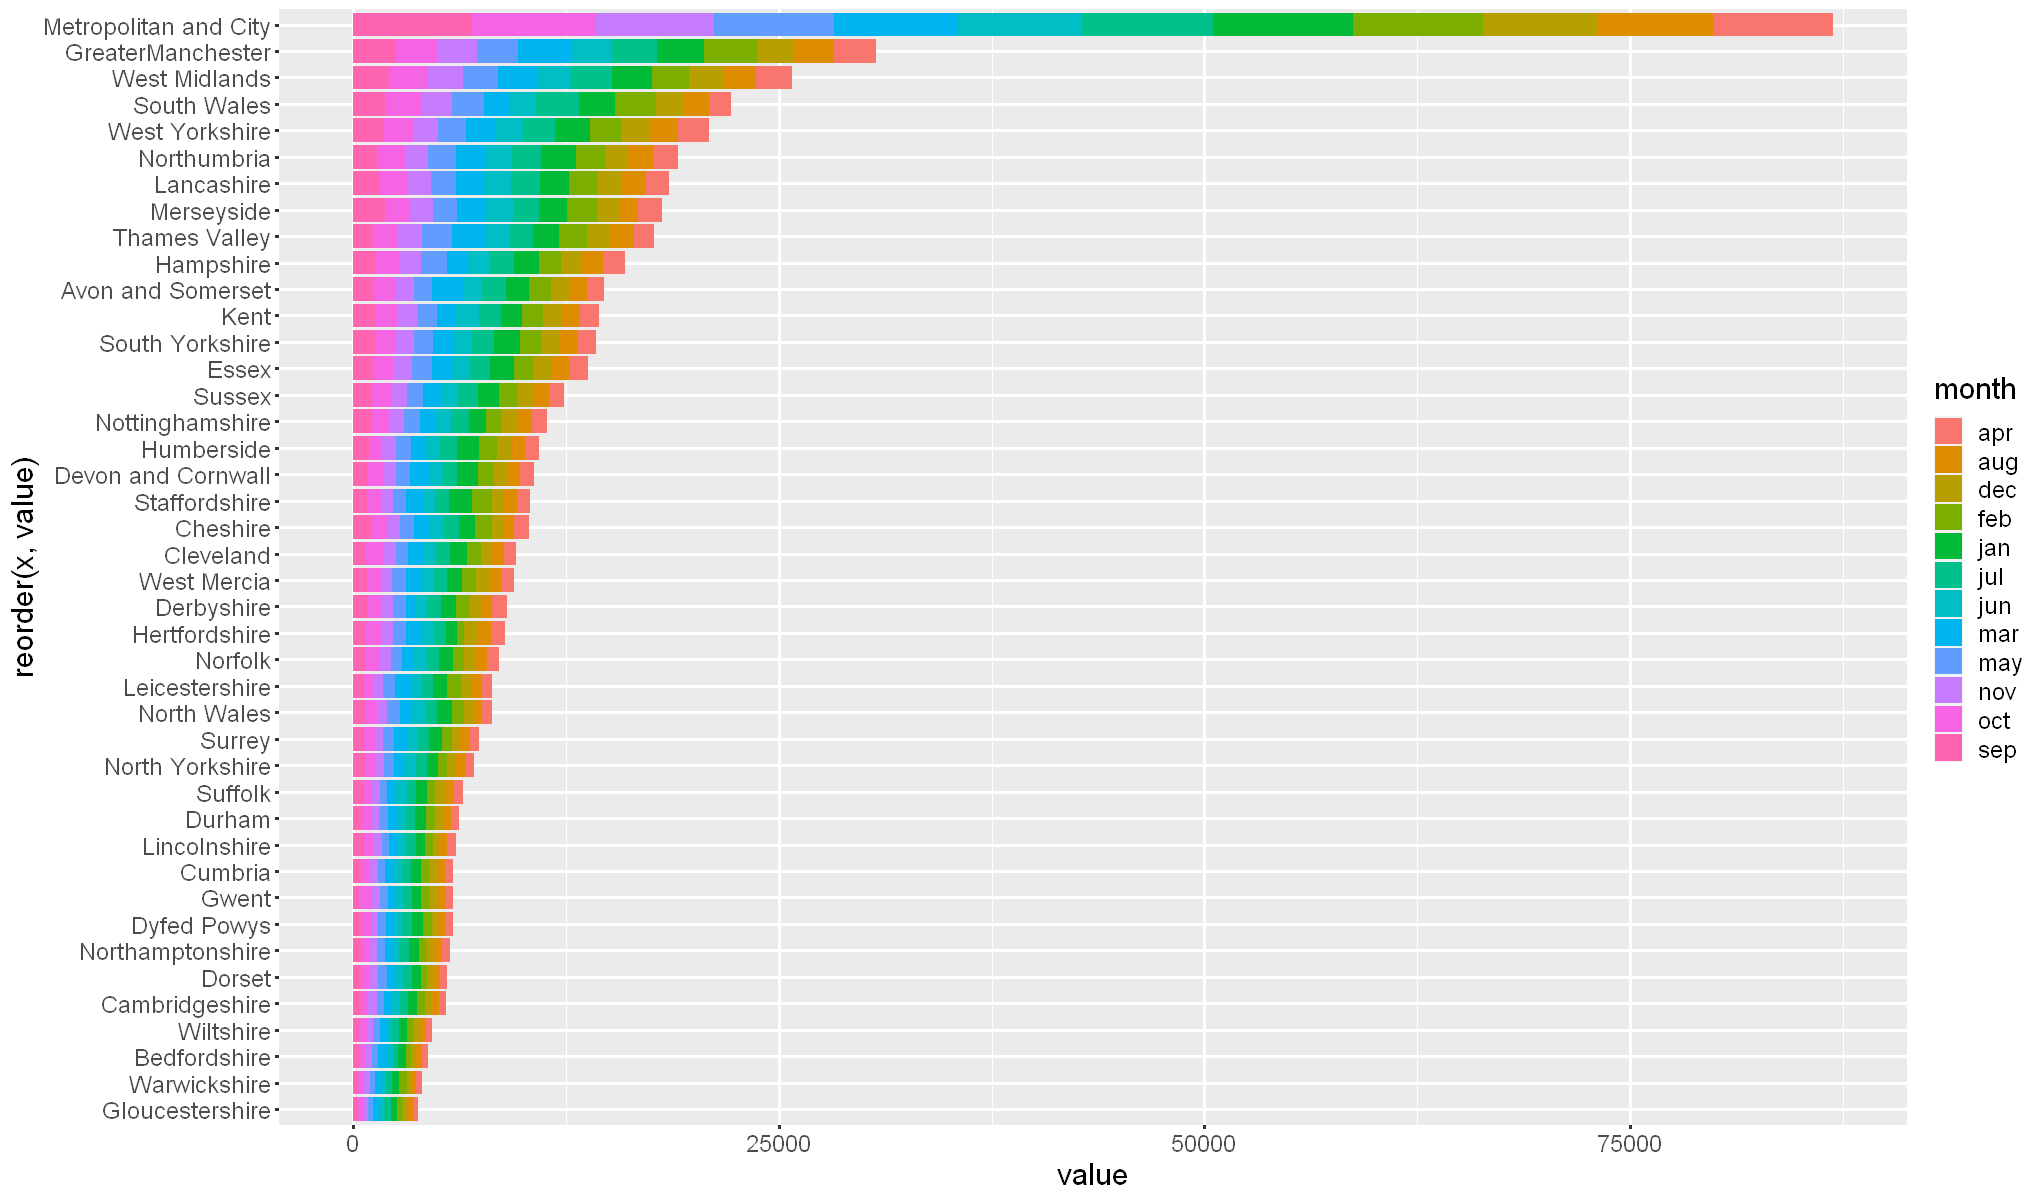

In [93]:
# The Successful Crimes

plot_graph(crime_df, "2014")

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


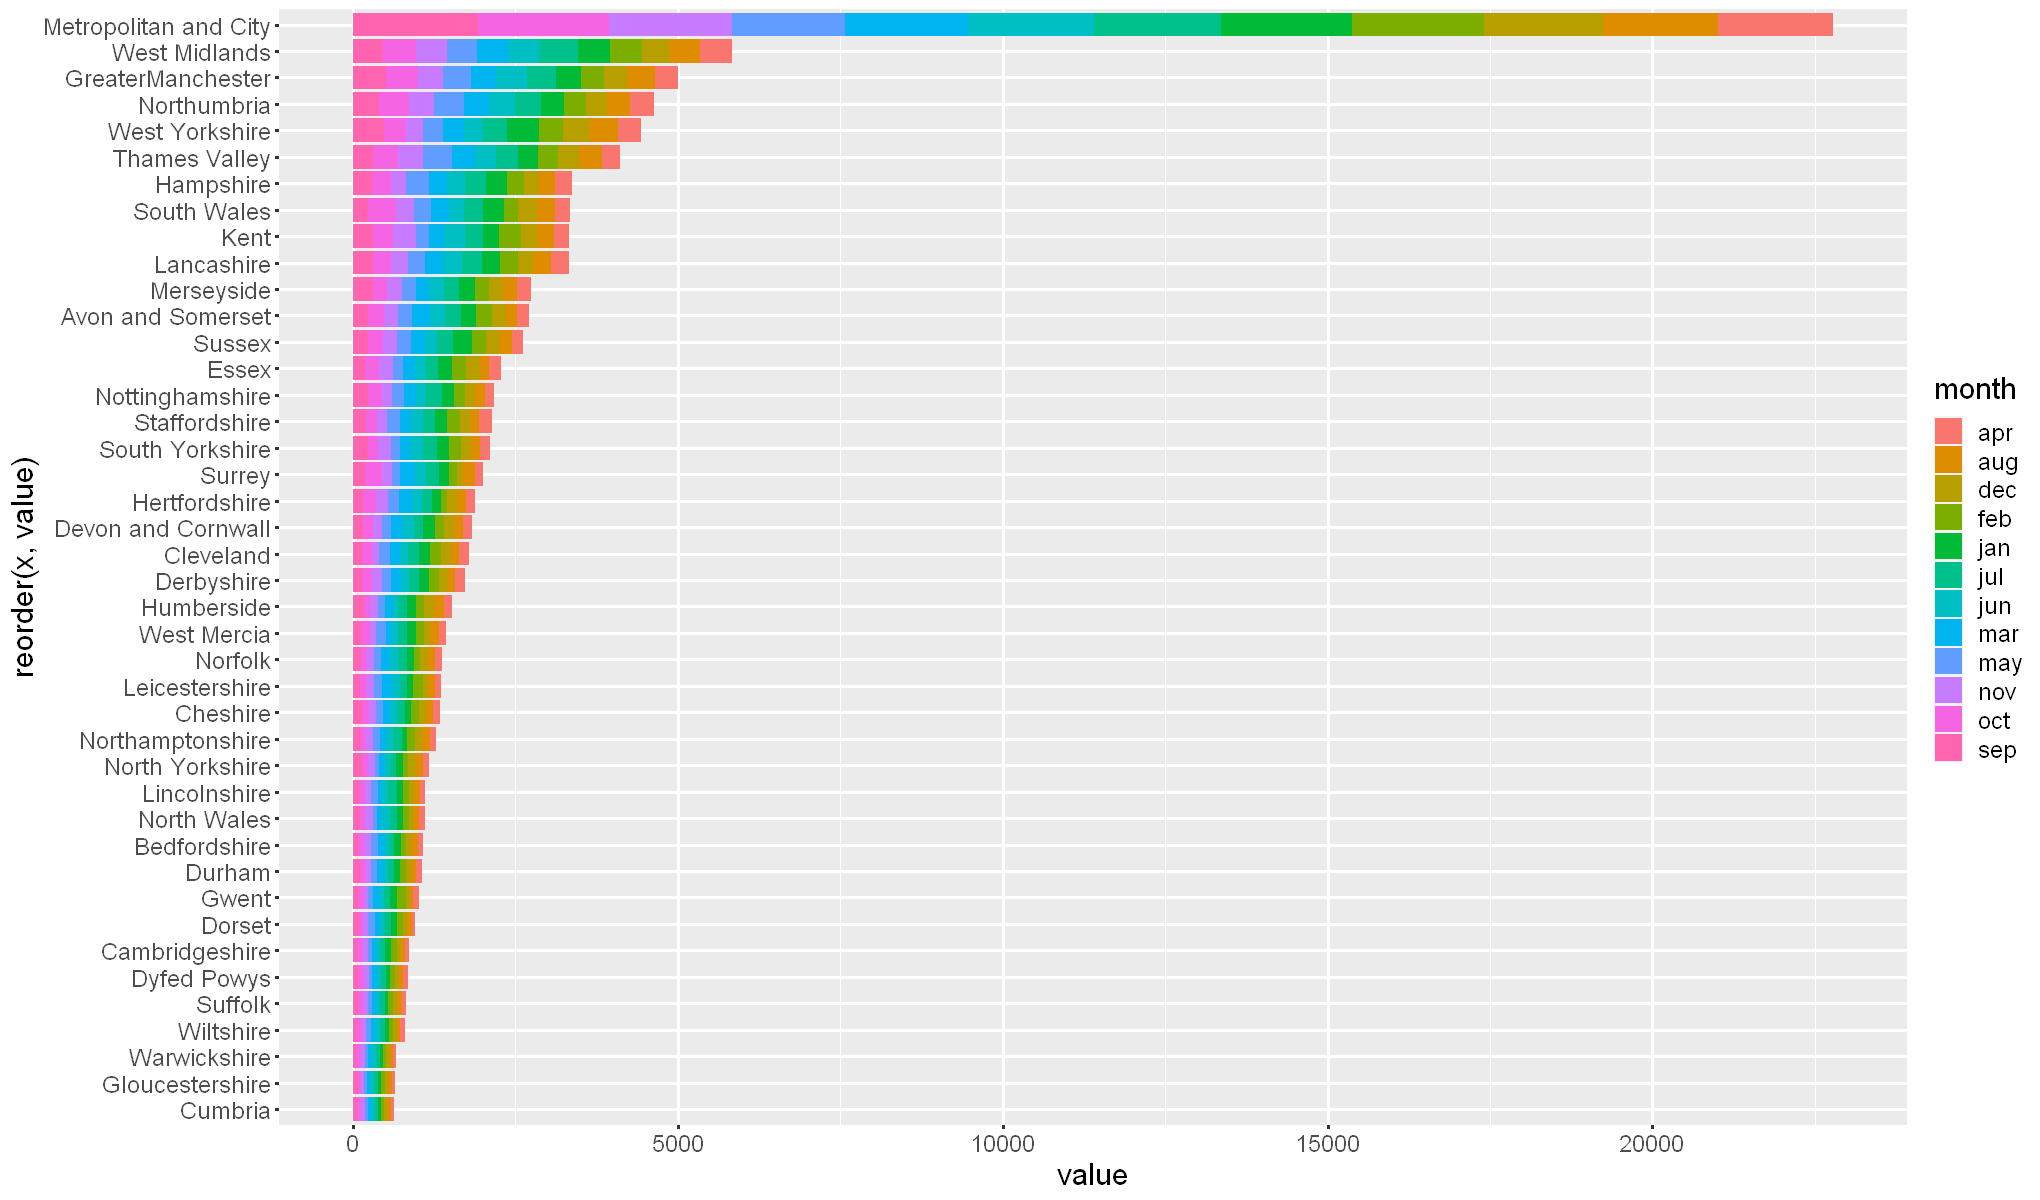

In [94]:
# For the unsuccessful crimes

plot_graph(uscrime_df, "2014")

# 2015

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


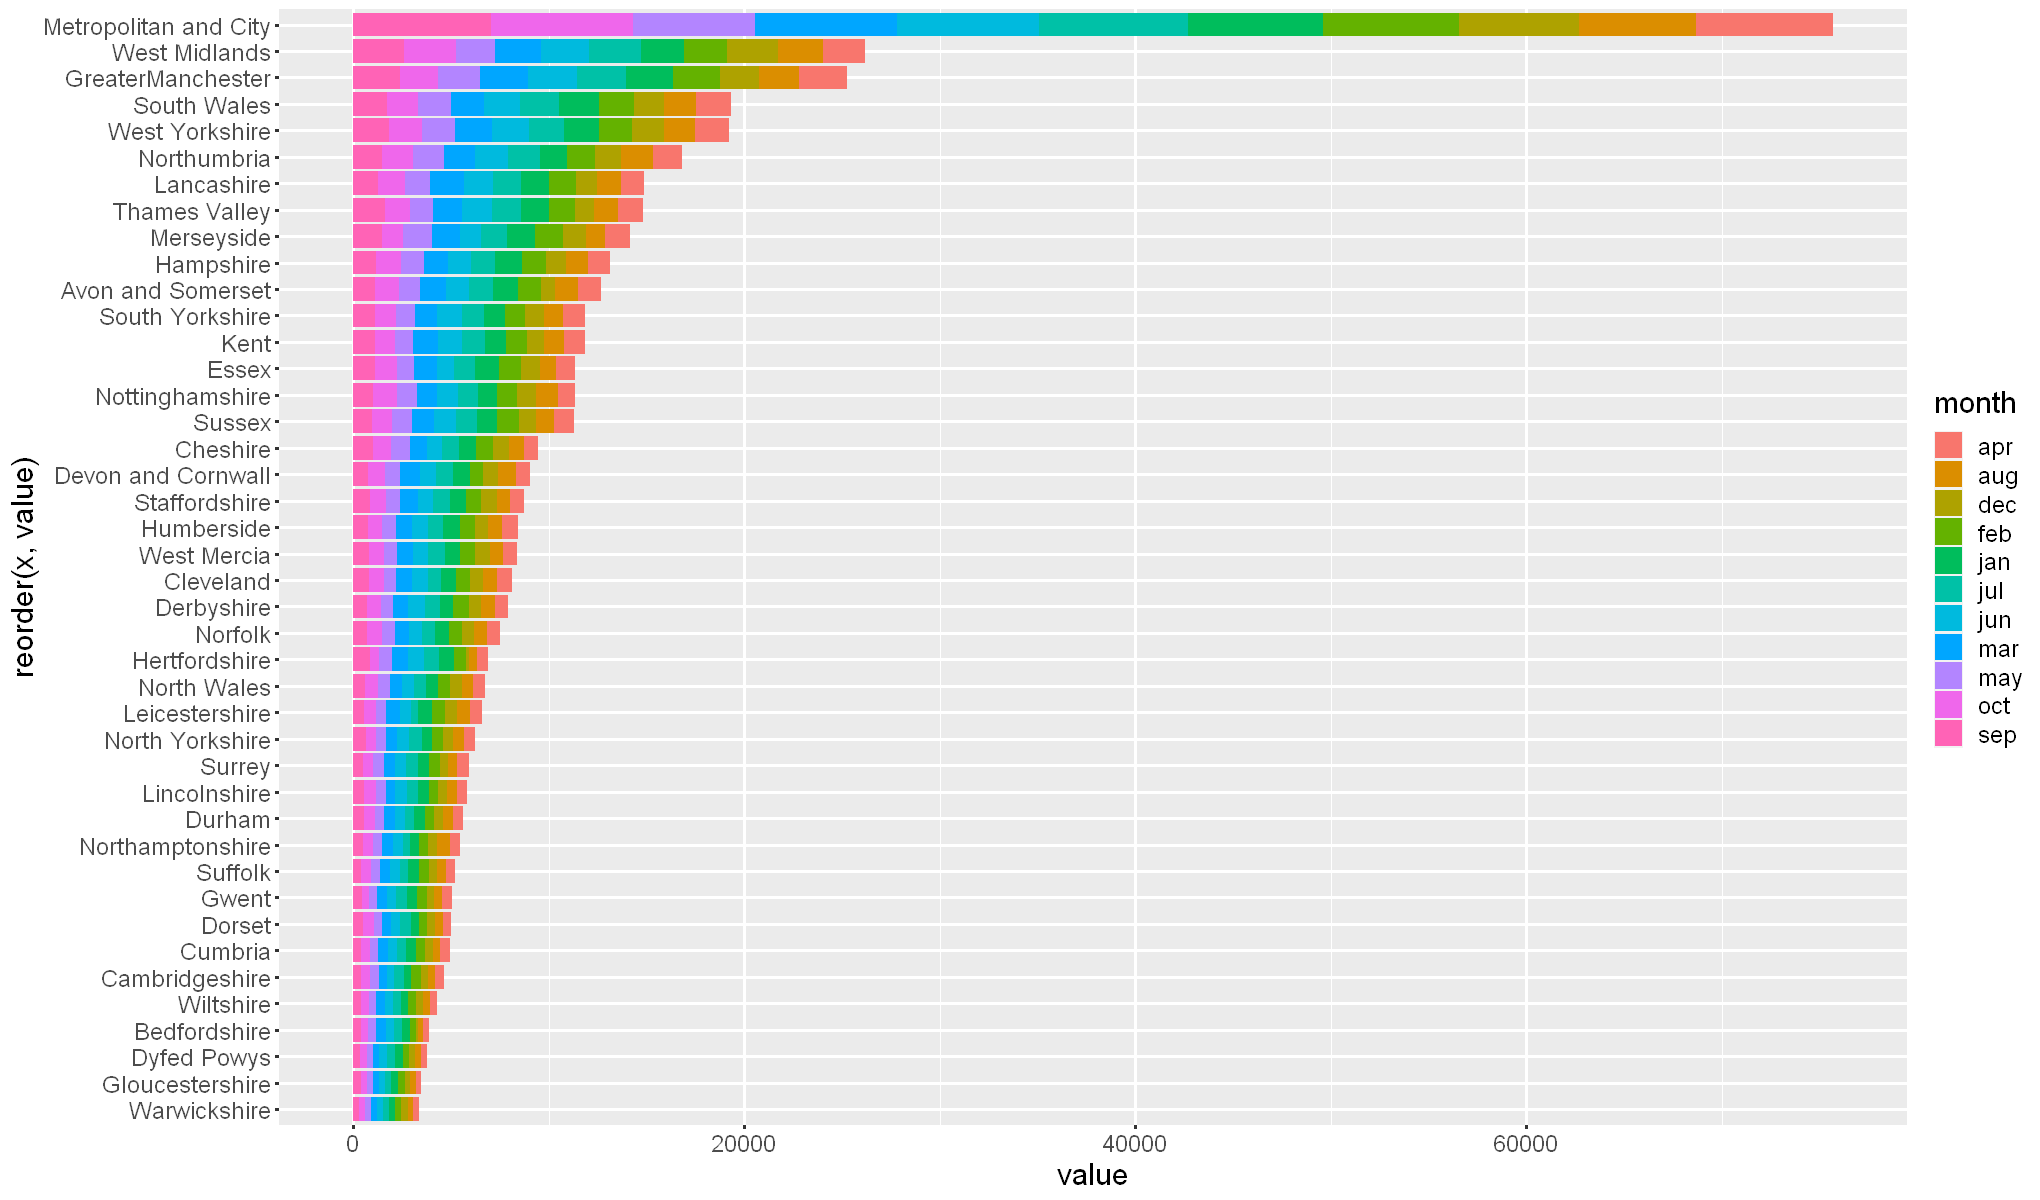

In [95]:
# Successful Crimes

plot_graph(crime_df, "2015")

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


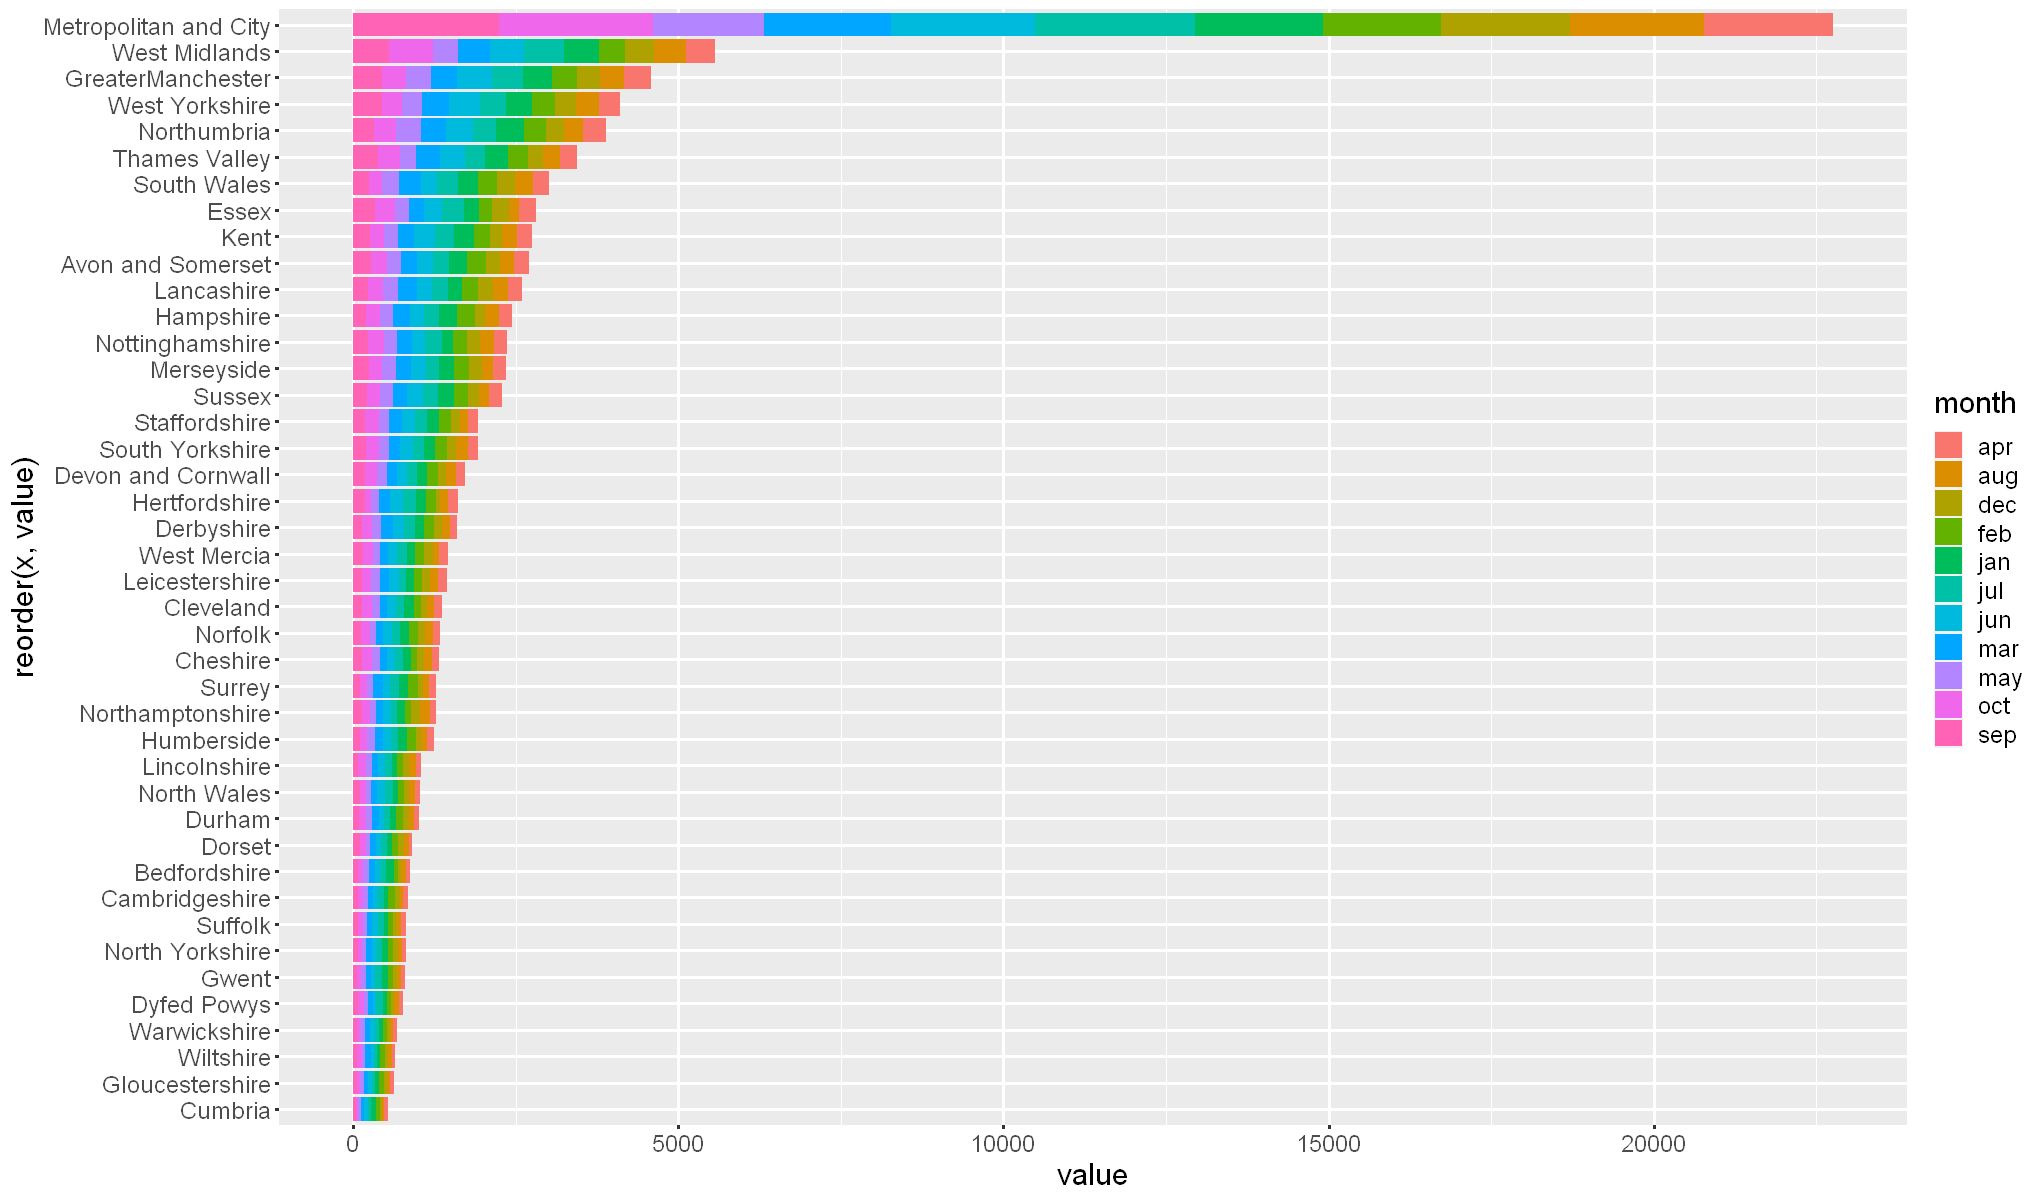

In [96]:
# Unsuccessful crimes

plot_graph(uscrime_df, "2015")

# 2016

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


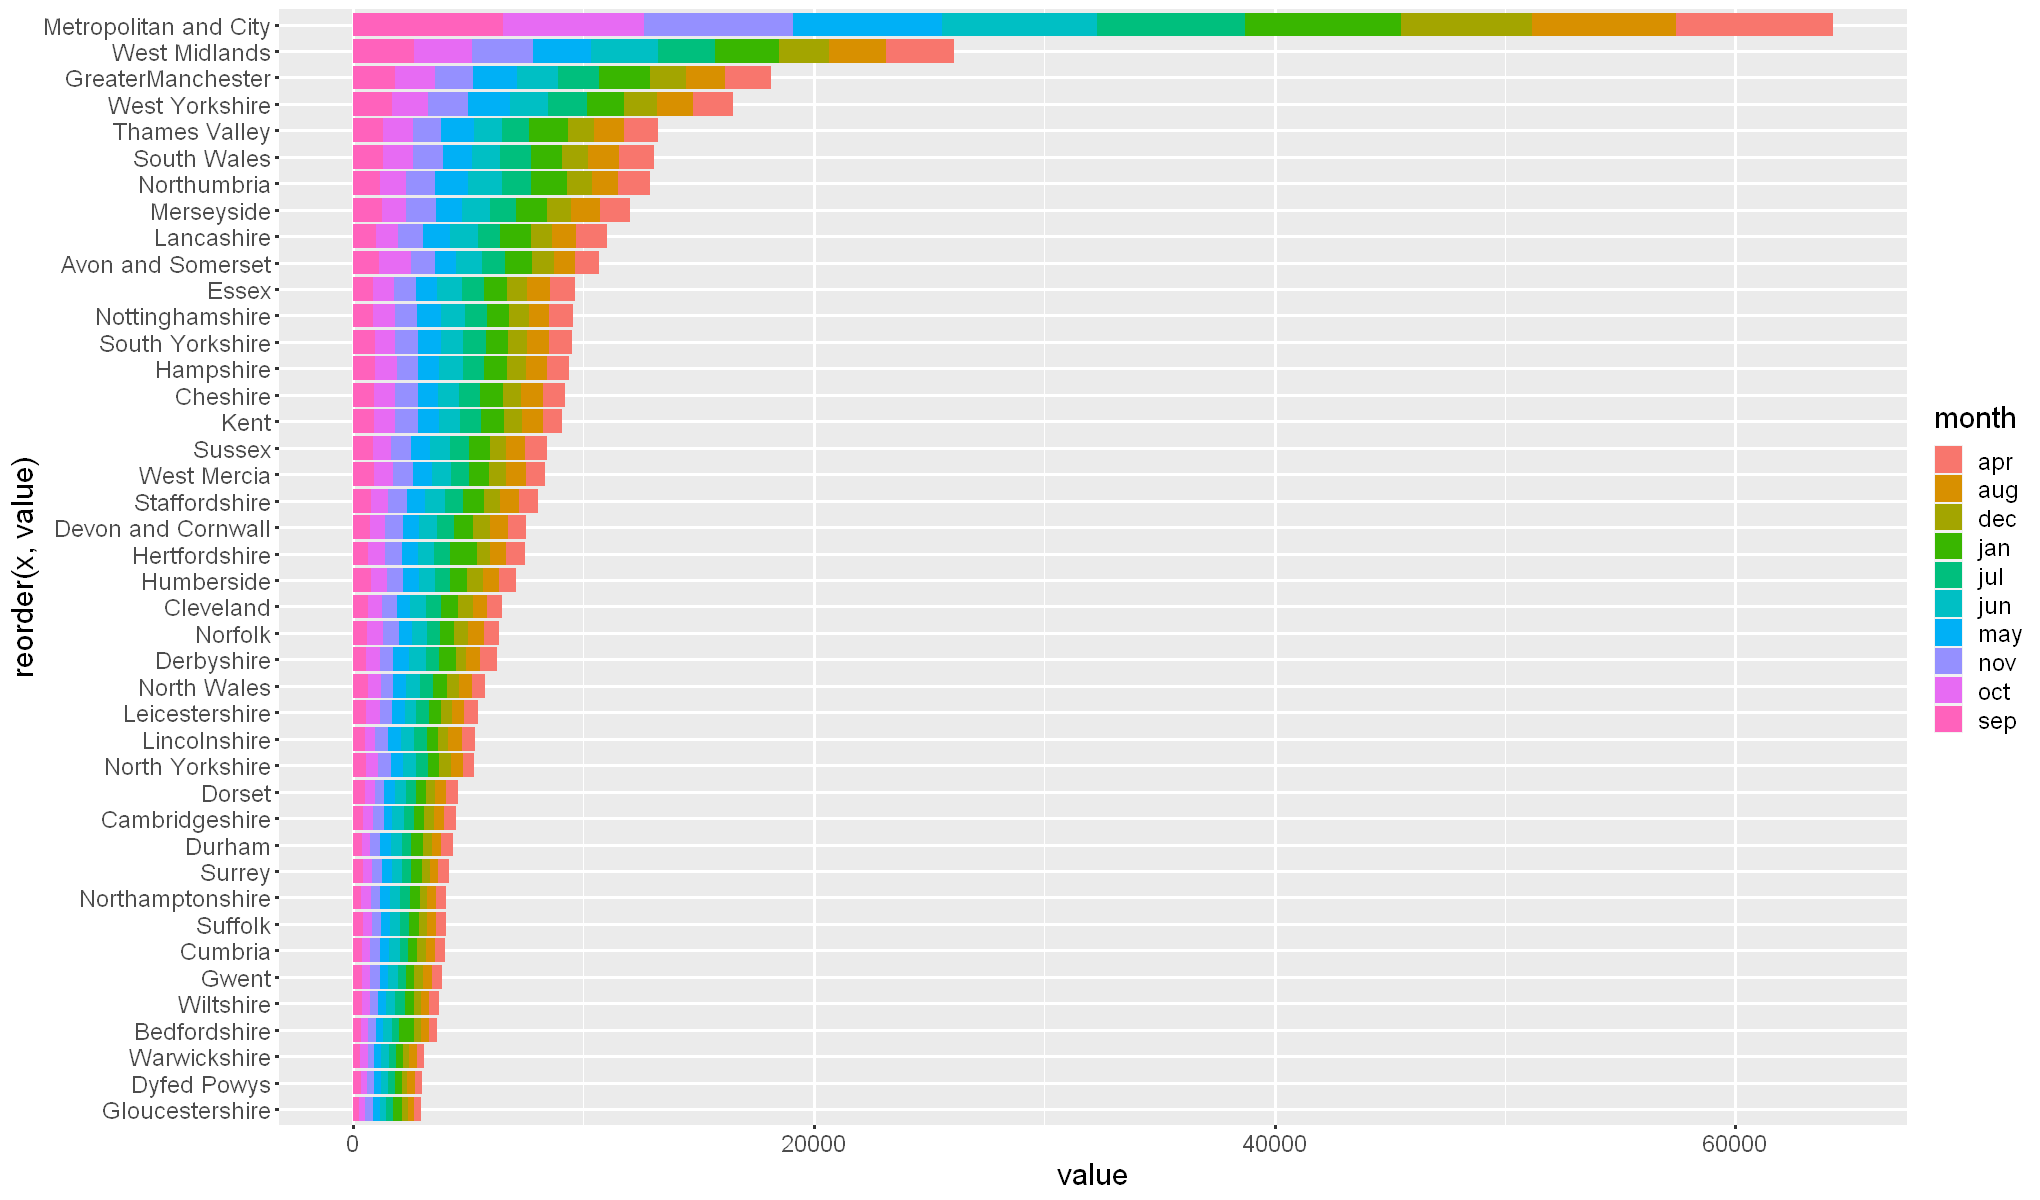

In [97]:
# Successful crimes

plot_graph(crime_df, "2016")

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


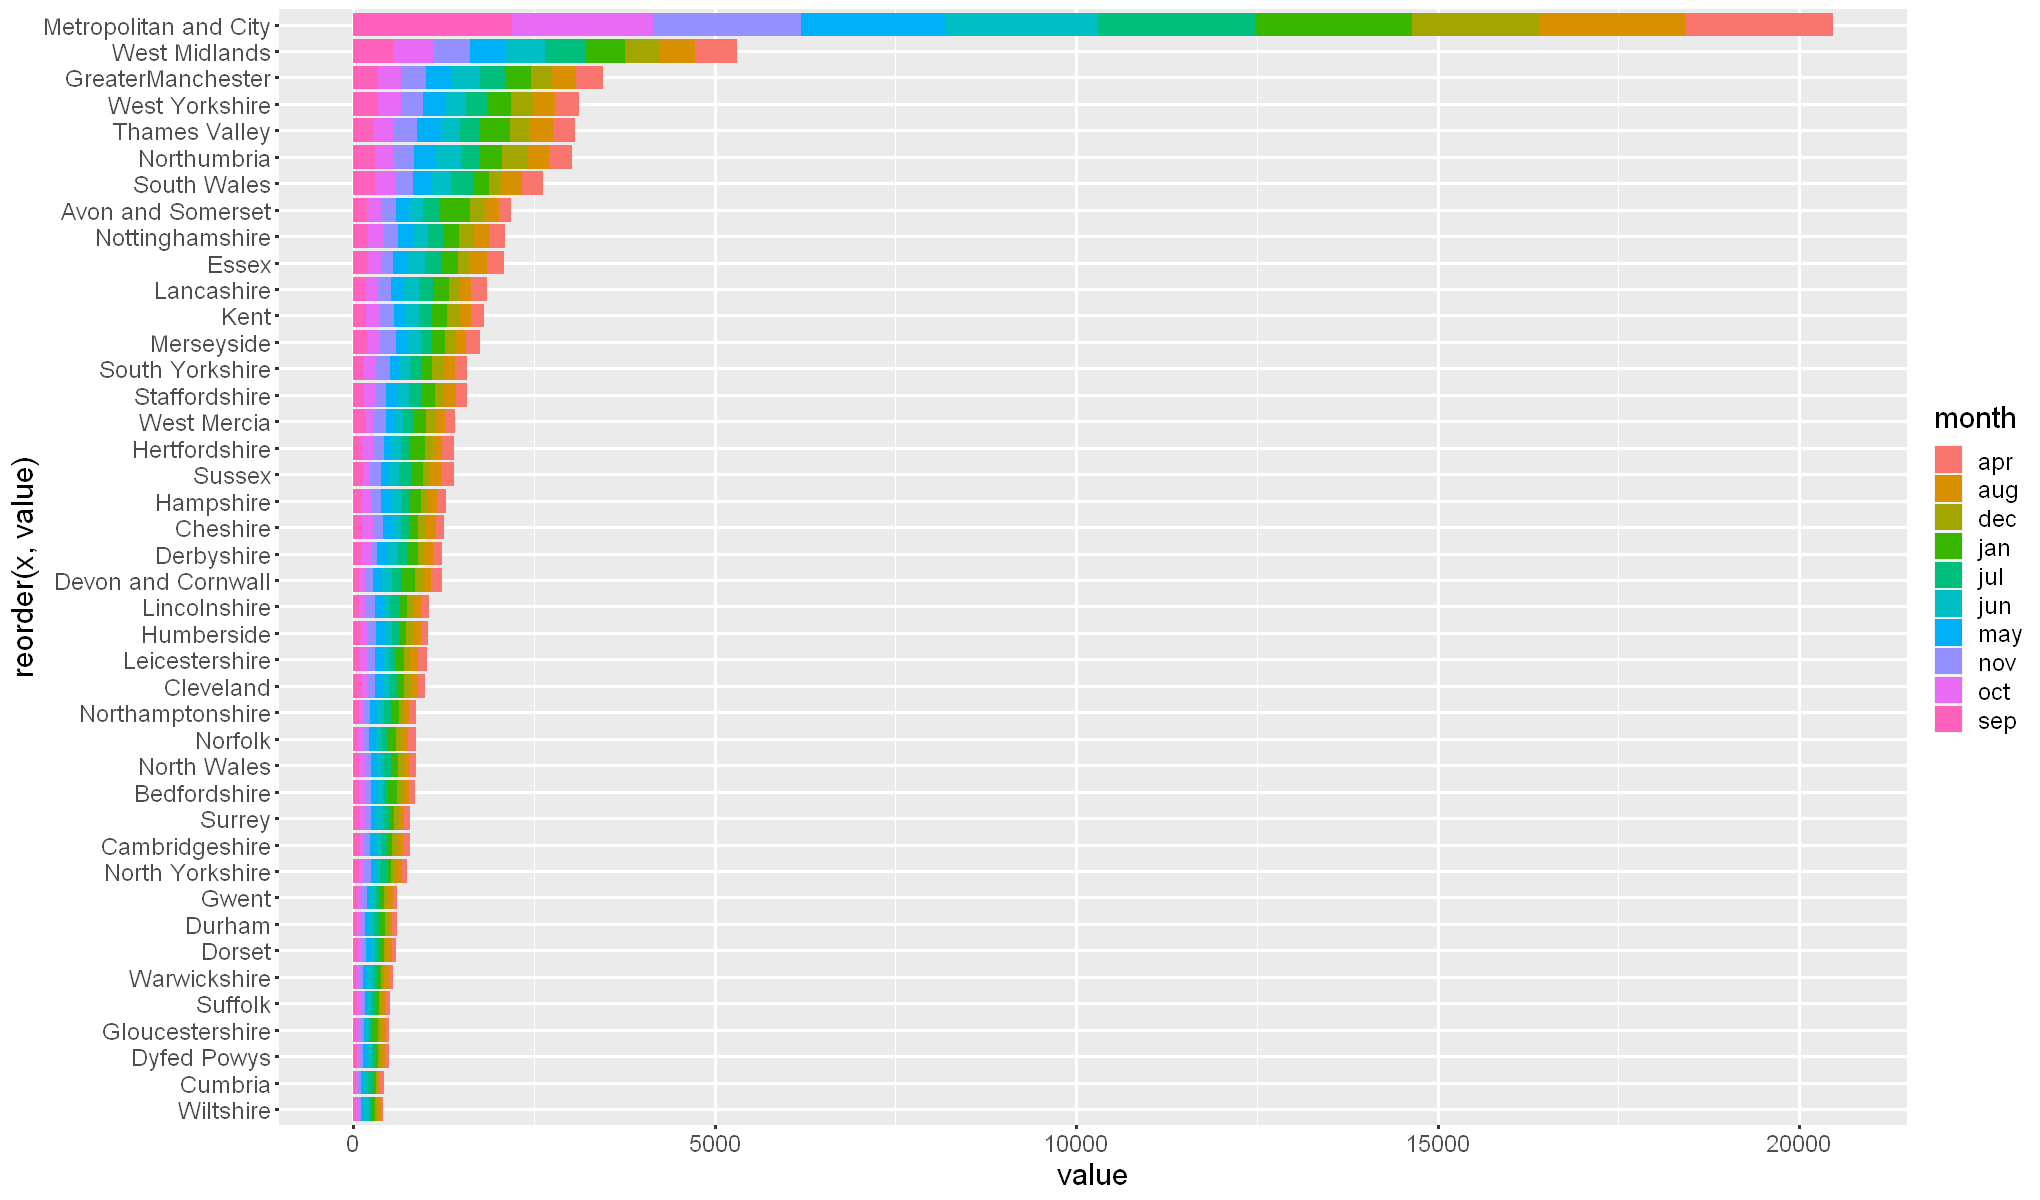

In [98]:
# Unsuccessful crime

plot_graph(uscrime_df, "2016")

# 2017

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


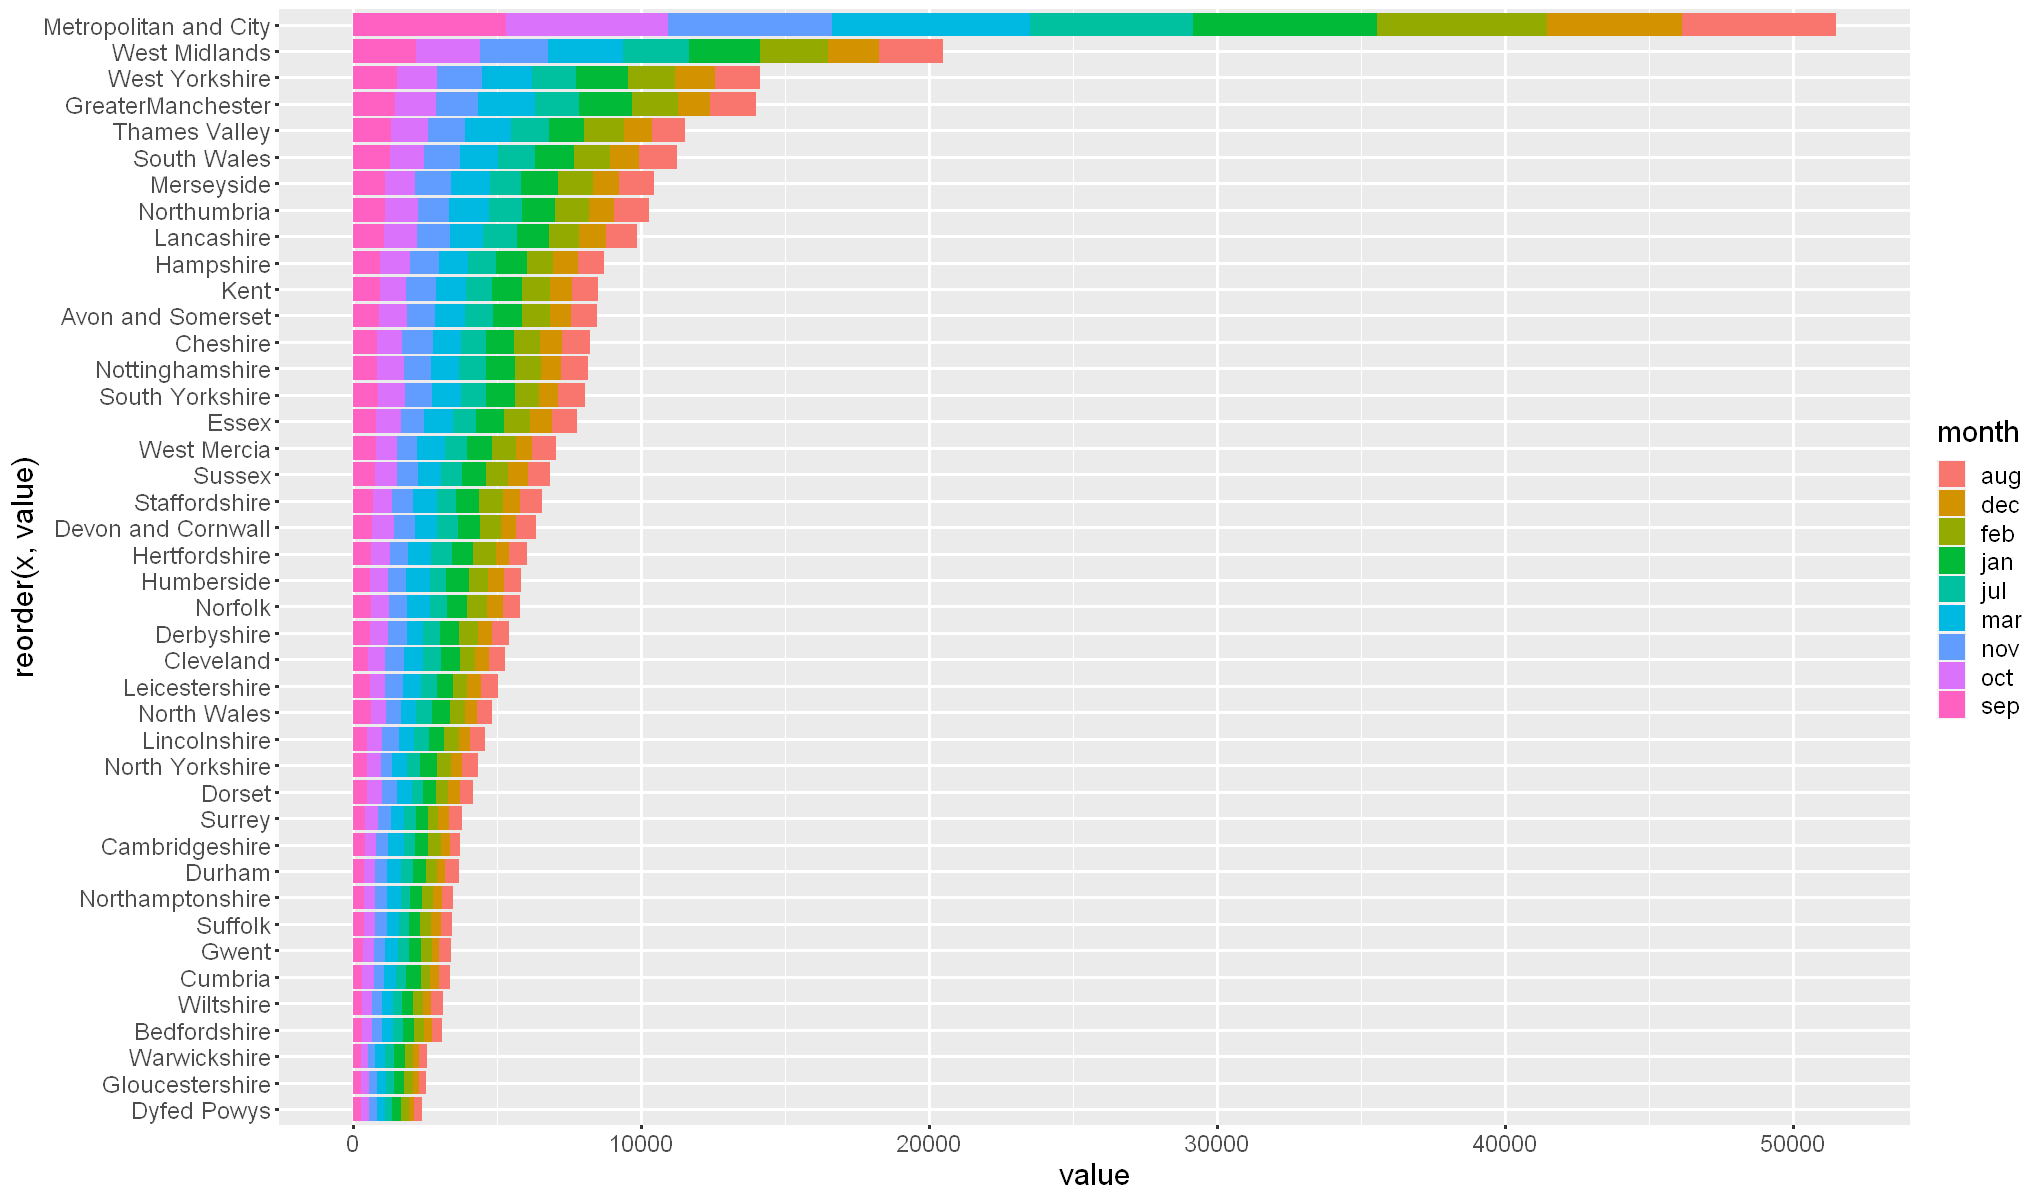

In [99]:
# Successful crimes

plot_graph(crime_df, "2017")

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


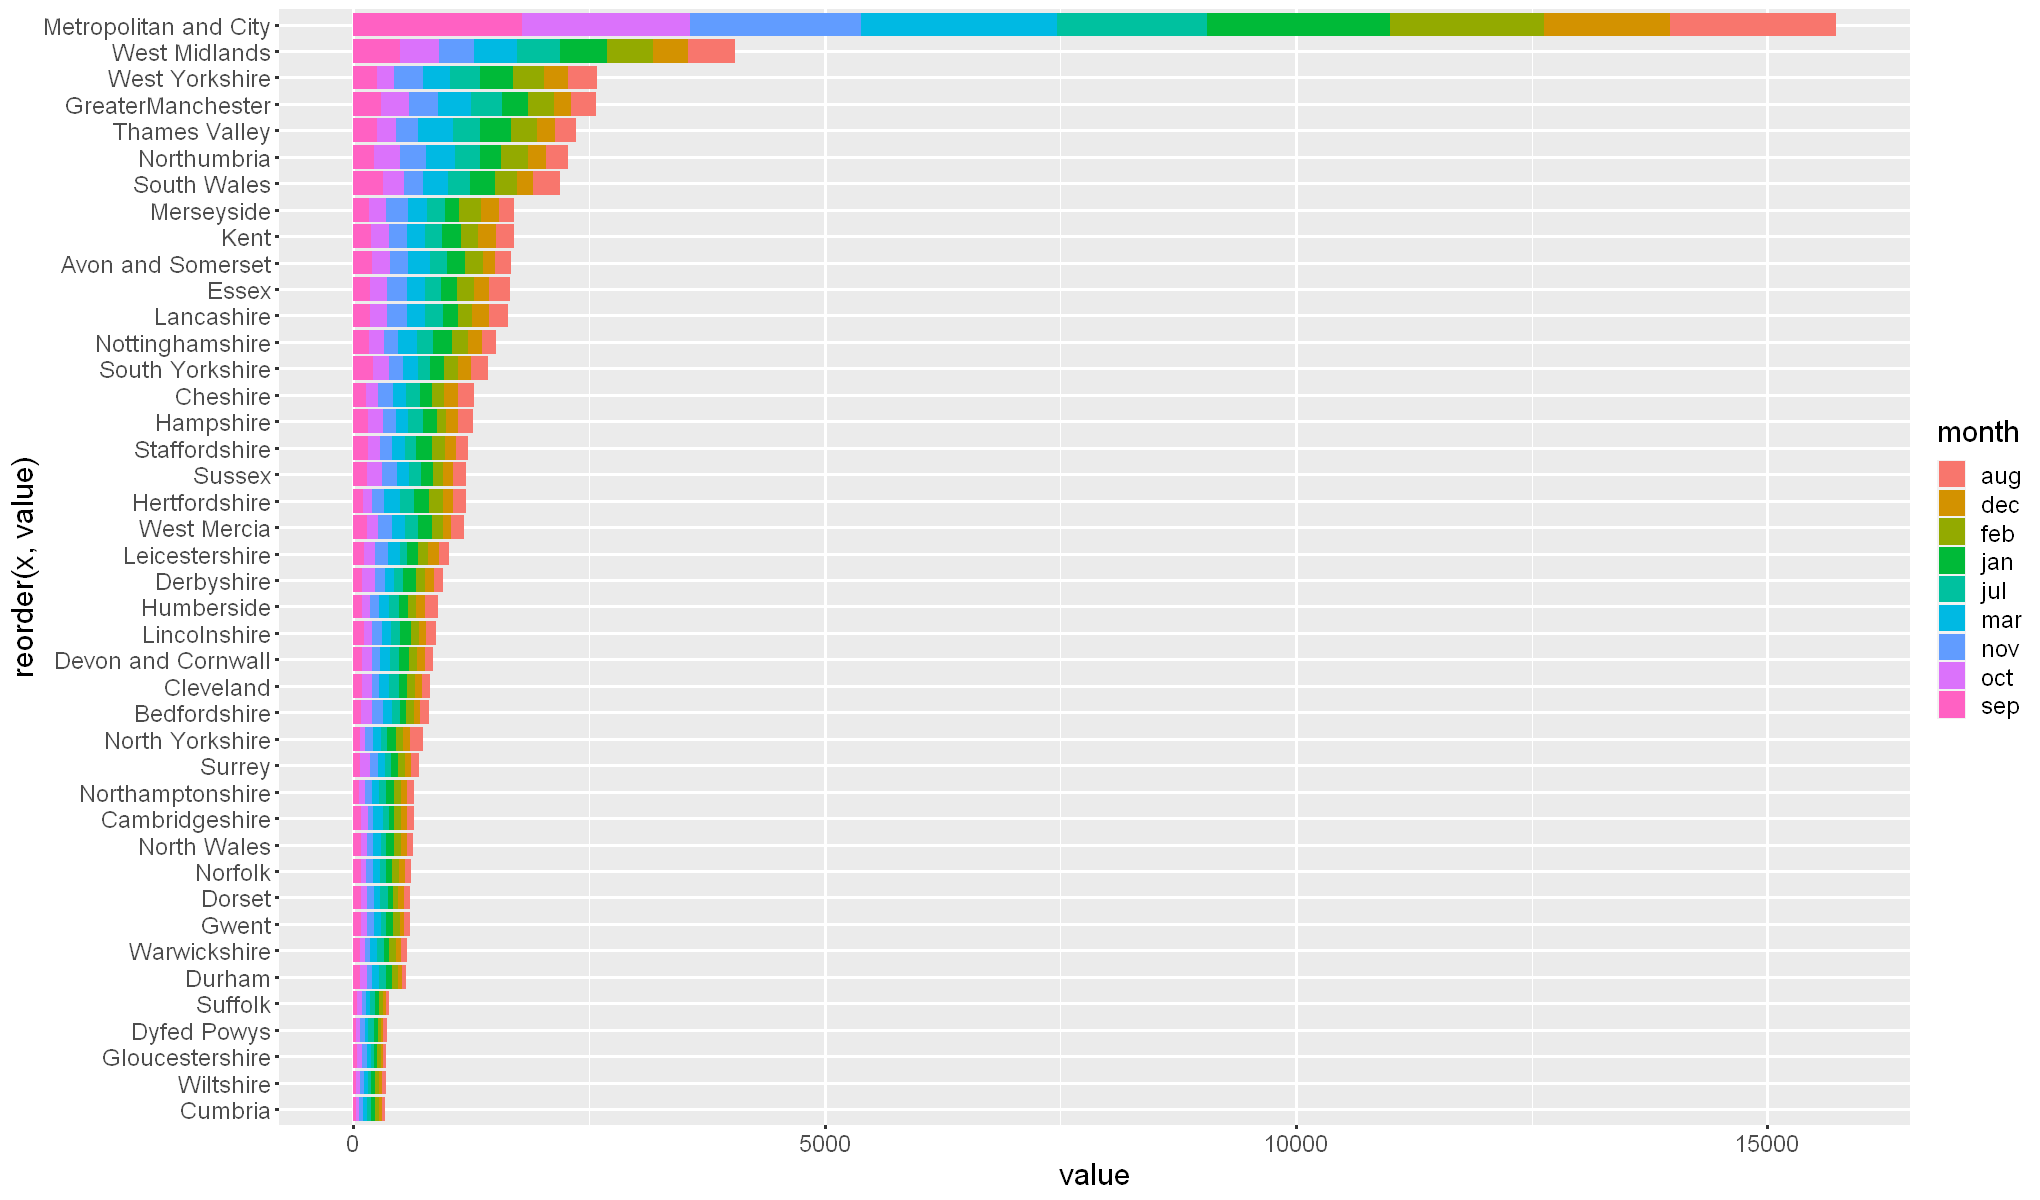

In [100]:
# Unsuccessful crime

plot_graph(uscrime_df, "2017")

# 2018

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


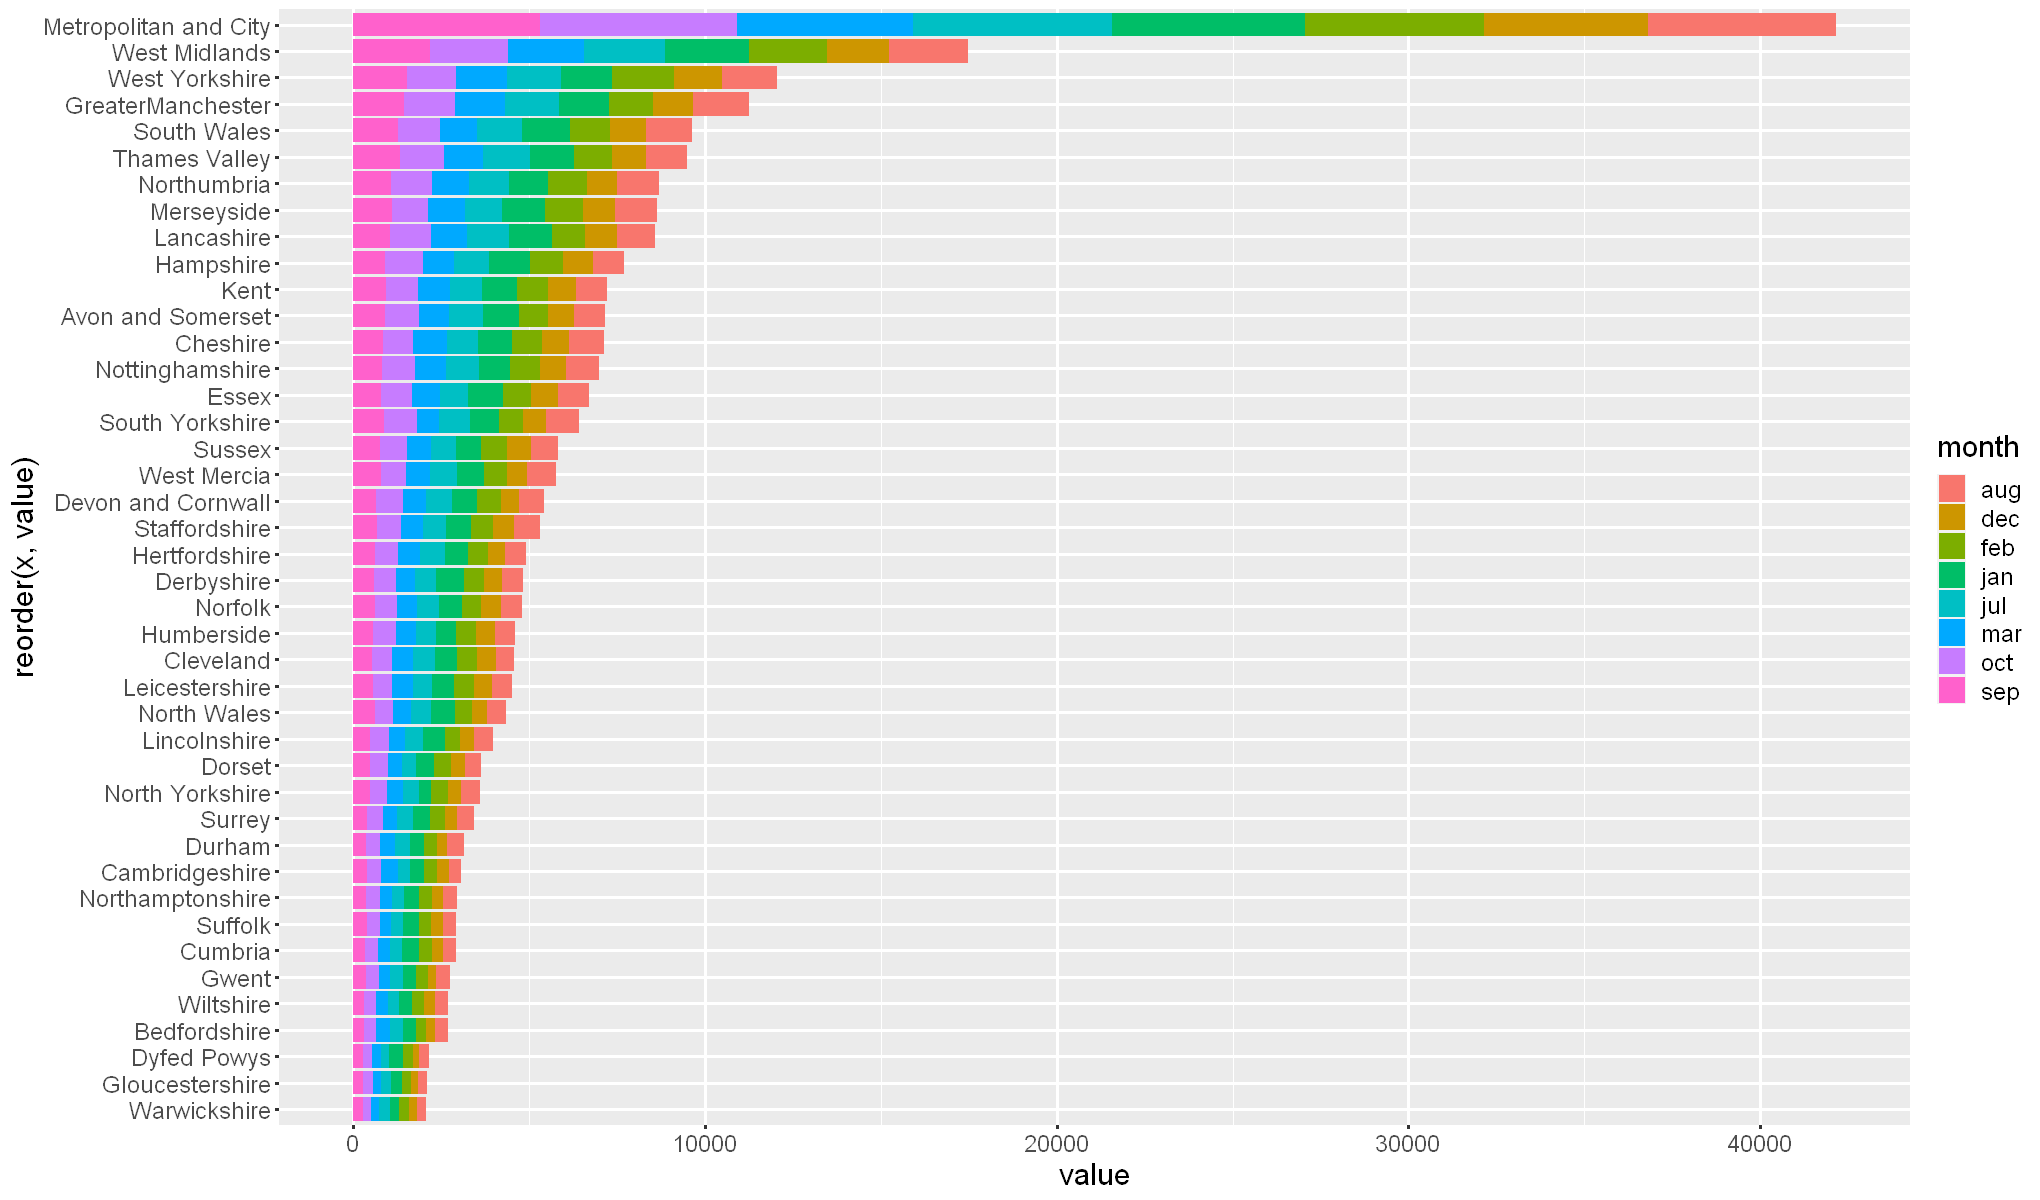

In [101]:
# Successful crime

plot_graph(crime_df, "2018")

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))"


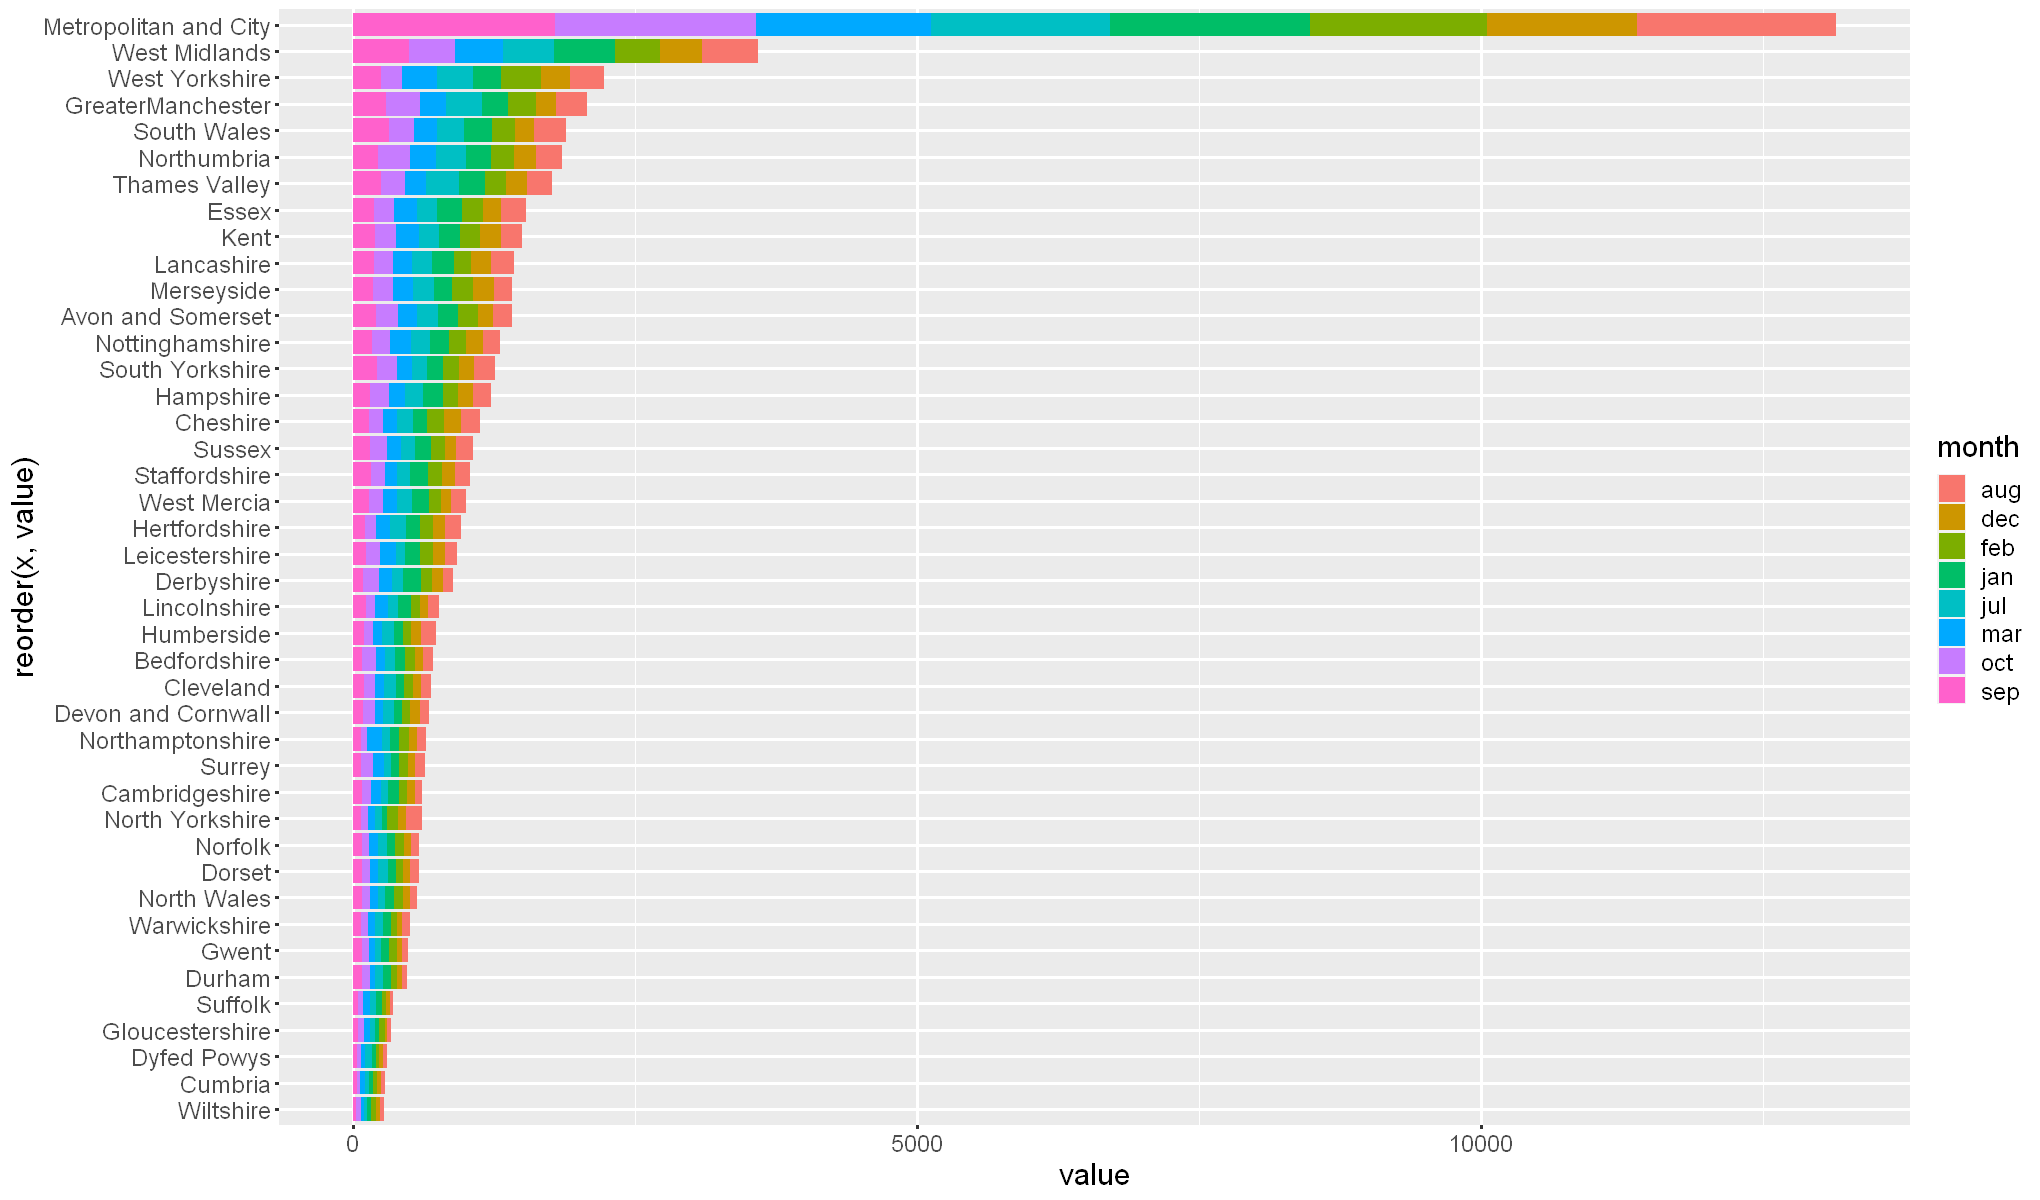

In [102]:
# Unsuccessful crime

plot_graph(uscrime_df, "2018")

# Correlation

In [103]:
# Correlation is a statistical measure that quantifies the strength and direction of the relationship between two variables.
# It indicates how closely the variables are related to each other.
# A correlation of 1 represents a perfect positive correlation, indicating that the variables move in perfect harmony, increasing or decreasing together.
# A correlation of -1 represents a perfect negative correlation, indicating that the variables move in opposite directions.
# A correlation of 0 suggests no linear relationship between the variables.

In [104]:
# Find correlation between crime_df and unsuccessful crimes

corr_matrix_graph <- function(dataframe){
  dataframe <- dplyr::select(dataframe, -c("year", "yearmon", "region"))
  num_cols <- sapply(dataframe, is.numeric)
  corr_matrix <- cor(dataframe[,num_cols])
  options(repr.plot.width = 10, repr.plot.height =10)
  corrplot(corr_matrix, type = "upper", order = "hclust", tl.cex = 0.9, tl.col = "black", is.corr = TRUE, mar = c(0, 0, 0, 0))  
  return(corr_matrix)
}

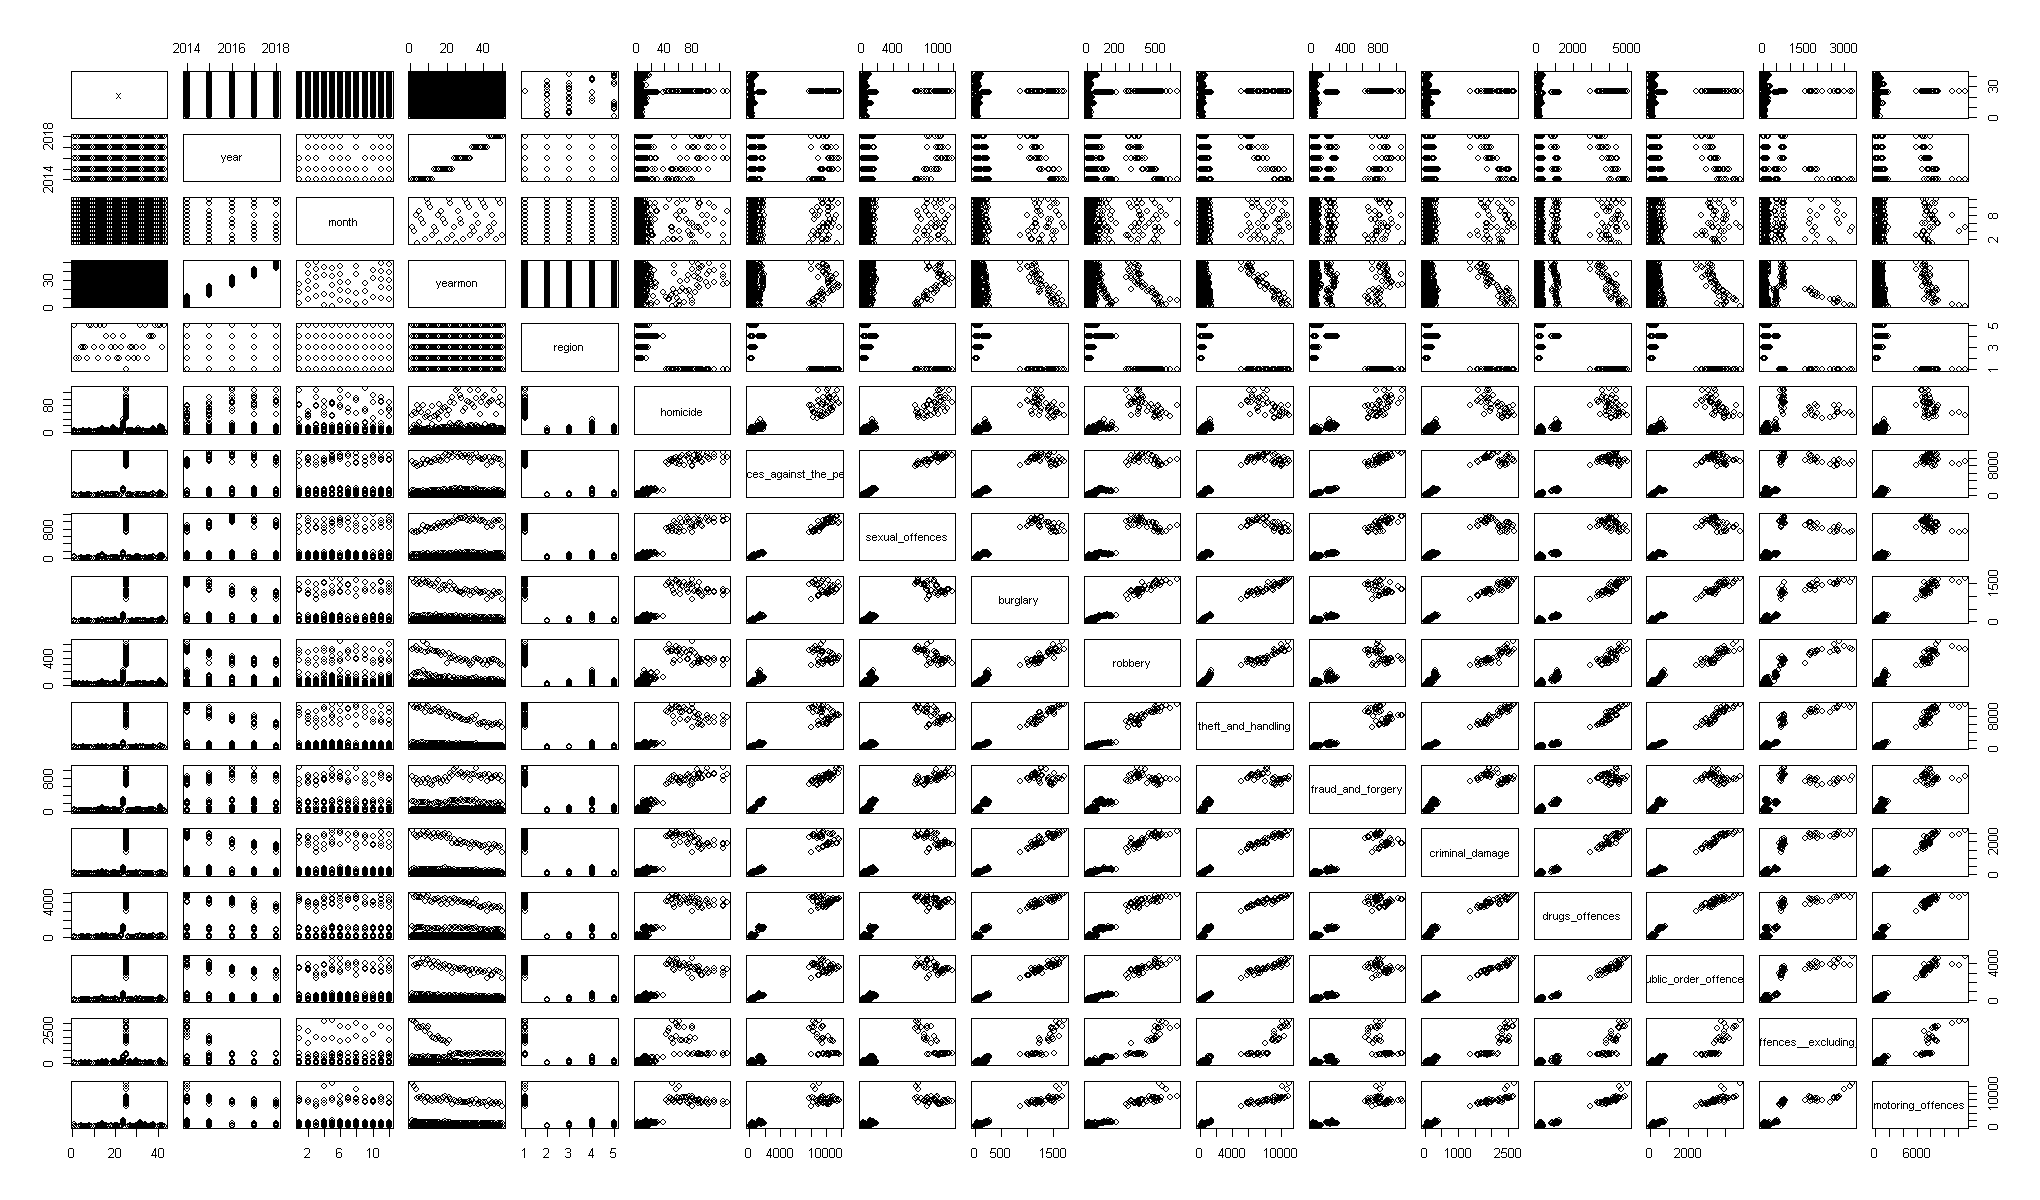

In [105]:
plot(crime_df)

homicide  offences_against_the_person
homicide                                1.0000000 0.9512369                  
offences_against_the_person             0.9512369 1.0000000                  
sexual_offences                         0.9580120 0.9942701                  
burglary                                0.9099394 0.9788355                  
robbery                                 0.8858330 0.9534319                  
theft_and_handling                      0.8888546 0.9672577                  
fraud_and_forgery                       0.9555942 0.9892675                  
criminal_damage                         0.9000938 0.9778035                  
drugs_offences                          0.9256949 0.9825268                  
public_order_offences                   0.9081870 0.9815506                  
all_other_offences__excluding_motoring_ 0.6973778 0.8043319                  
motoring_offences                       0.9082878 0.9760603                  
                                        sexual_offences burglary  robbery  
homicide                                0.9580120       0.9099394 0.8858330
offences_against_the_person             0.9942701       0.9788355 0.9534319
sexual_offences                         1.0000000       0.9629262 0.9349084
burglary                                0.9629262       1.0000000 0.9831730
robbery                                 0.9349084       0.9831730 1.0000000
theft_and_handling                      0.9480411       0.9945095 0.9803506
fraud_and_forgery                       0.9846665       0.9672095 0.9520702
criminal_damage                         0.9605928       0.9959035 0.9793835
drugs_offences                          0.9689527       0.9903021 0.9832042
public_order_offences                   0.9666494       0.9957223 0.9812208
all_other_offences__excluding_motoring_ 0.7695737       0.8994511 0.9187418
motoring_offences                       0.9608440       0.9903032 0.9734840
                                        theft_and_handling fraud_and_forgery
homicide                                0.8888546          0.9555942        
offences_against_the_person             0.9672577          0.9892675        
sexual_offences                         0.9480411          0.9846665        
burglary                                0.9945095          0.9672095        
robbery                                 0.9803506          0.9520702        
theft_and_handling                      1.0000000          0.9511292        
fraud_and_forgery                       0.9511292          1.0000000        
criminal_damage                         0.9964236          0.9599705        
drugs_offences                          0.9844625          0.9837847        
public_order_offences                   0.9934396          0.9686541        
all_other_offences__excluding_motoring_ 0.9183841          0.7941916        
motoring_offences                       0.9874936          0.9661925        
                                        criminal_damage drugs_offences
homicide                                0.9000938       0.9256949     
offences_against_the_person             0.9778035       0.9825268     
sexual_offences                         0.9605928       0.9689527     
burglary                                0.9959035       0.9903021     
robbery                                 0.9793835       0.9832042     
theft_and_handling                      0.9964236       0.9844625     
fraud_and_forgery                       0.9599705       0.9837847     
criminal_damage                         1.0000000       0.9869342     
drugs_offences                          0.9869342       1.0000000     
public_order_offences                   0.9966477       0.9904481     
all_other_offences__excluding_motoring_ 0.9031817       0.8795152     
motoring_offences                       0.9900636       0.9862366     
                                        public_order_offences
homicide                                0.9081870   

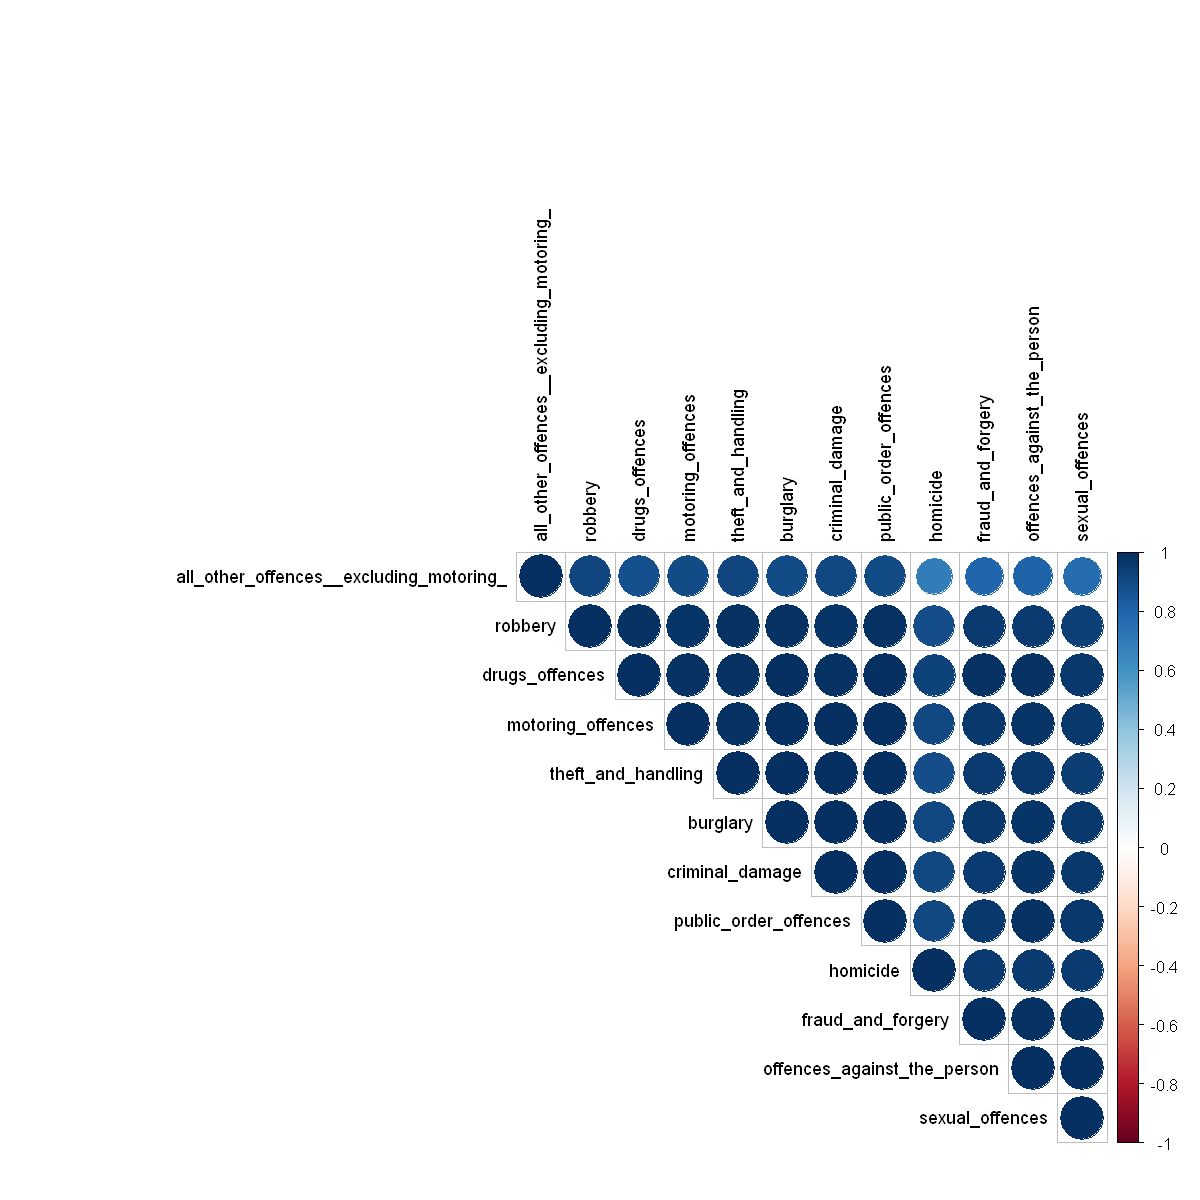

In [106]:
# crime_df
corr_matrix_graph(crime_df)

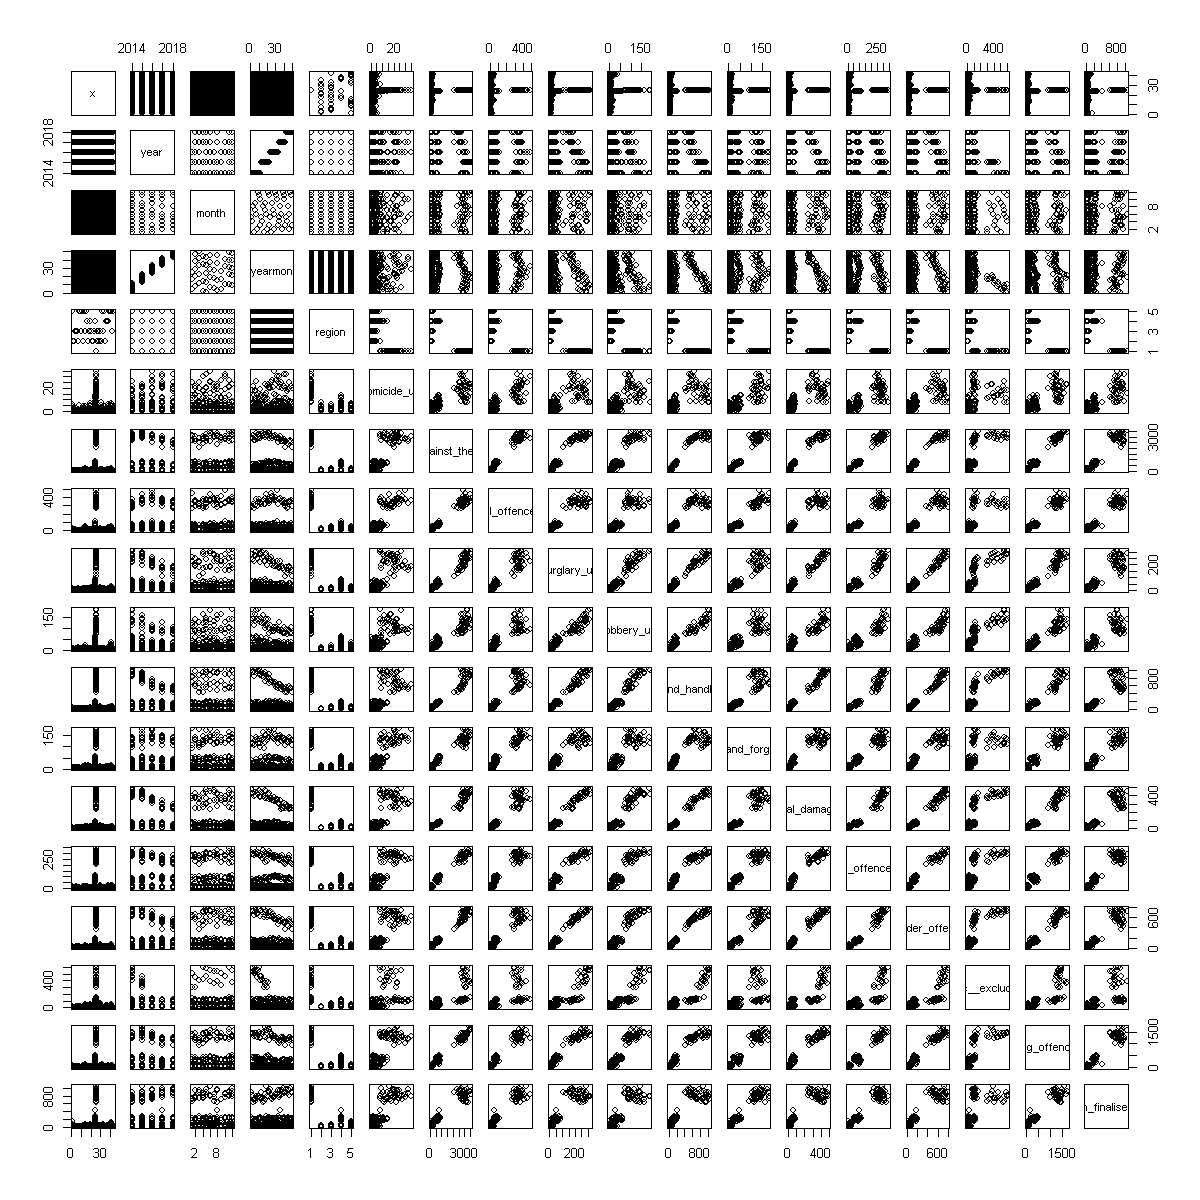

In [107]:
plot(uscrime_df)

homicide_us
homicide_us                                1.0000000  
offences_against_the_person_us             0.8956980  
sexual_offences_us                         0.9048314  
burglary_us                                0.8490587  
robbery_us                                 0.8429024  
theft_and_handling_us                      0.8427664  
fraud_and_forgery_us                       0.9124226  
criminal_damage_us                         0.8603562  
drugs_offences_us                          0.8948467  
public_order_offences_us                   0.8744237  
all_other_offences__excluding_motoring__us 0.6393515  
motoring_offences_us                       0.8891796  
admin_finalised_us                         0.9057365  
                                           offences_against_the_person_us
homicide_us                                0.8956980                     
offences_against_the_person_us             1.0000000                     
sexual_offences_us                         0.9863125                     
burglary_us                                0.9816002                     
robbery_us                                 0.9588544                     
theft_and_handling_us                      0.9794502                     
fraud_and_forgery_us                       0.9818032                     
criminal_damage_us                         0.9857872                     
drugs_offences_us                          0.9892546                     
public_order_offences_us                   0.9914100                     
all_other_offences__excluding_motoring__us 0.8257865                     
motoring_offences_us                       0.9934754                     
admin_finalised_us                         0.9785537                     
                                           sexual_offences_us burglary_us
homicide_us                                0.9048314          0.8490587  
offences_against_the_person_us             0.9863125          0.9816002  
sexual_offences_us                         1.0000000          0.9585511  
burglary_us                                0.9585511          1.0000000  
robbery_us                                 0.9337249          0.9711958  
theft_and_handling_us                      0.9505802          0.9897763  
fraud_and_forgery_us                       0.9762016          0.9532264  
criminal_damage_us                         0.9632884          0.9866254  
drugs_offences_us                          0.9723834          0.9764653  
public_order_offences_us                   0.9710827          0.9893548  
all_other_offences__excluding_motoring__us 0.7708884          0.8894678  
motoring_offences_us                       0.9787221          0.9794571  
admin_finalised_us                         0.9756202          0.9462802  
                                           robbery_us theft_and_handling_us
homicide_us                                0.8429024  0.8427664            
offences_against_the_person_us             0.9588544  0.9794502            
sexual_offences_us                         0.9337249  0.9505802            
burglary_us                                0.9711958  0.9897763            
robbery_us                                 1.0000000  0.9727000            
theft_and_handling_us                      0.9727000  1.0000000            
fraud_and_forgery_us                       0.9318368  0.9472587            
criminal_damage_us                         0.9608798  0.9911848            
drugs_offences_us                          0.9619945  0.9762554            
public_order_offences_us                   0.9688871  0.9908722            
all_other_offences__excluding_motoring__us 0.8990830  0.9082402            
motoring_offences_us                       0.9622161  0.9771254            
admin_finalised_us                         0.9314986  0.9403840            
                                           fraud_and_forgery_us
homicide_us                                0.9124226           
offences_

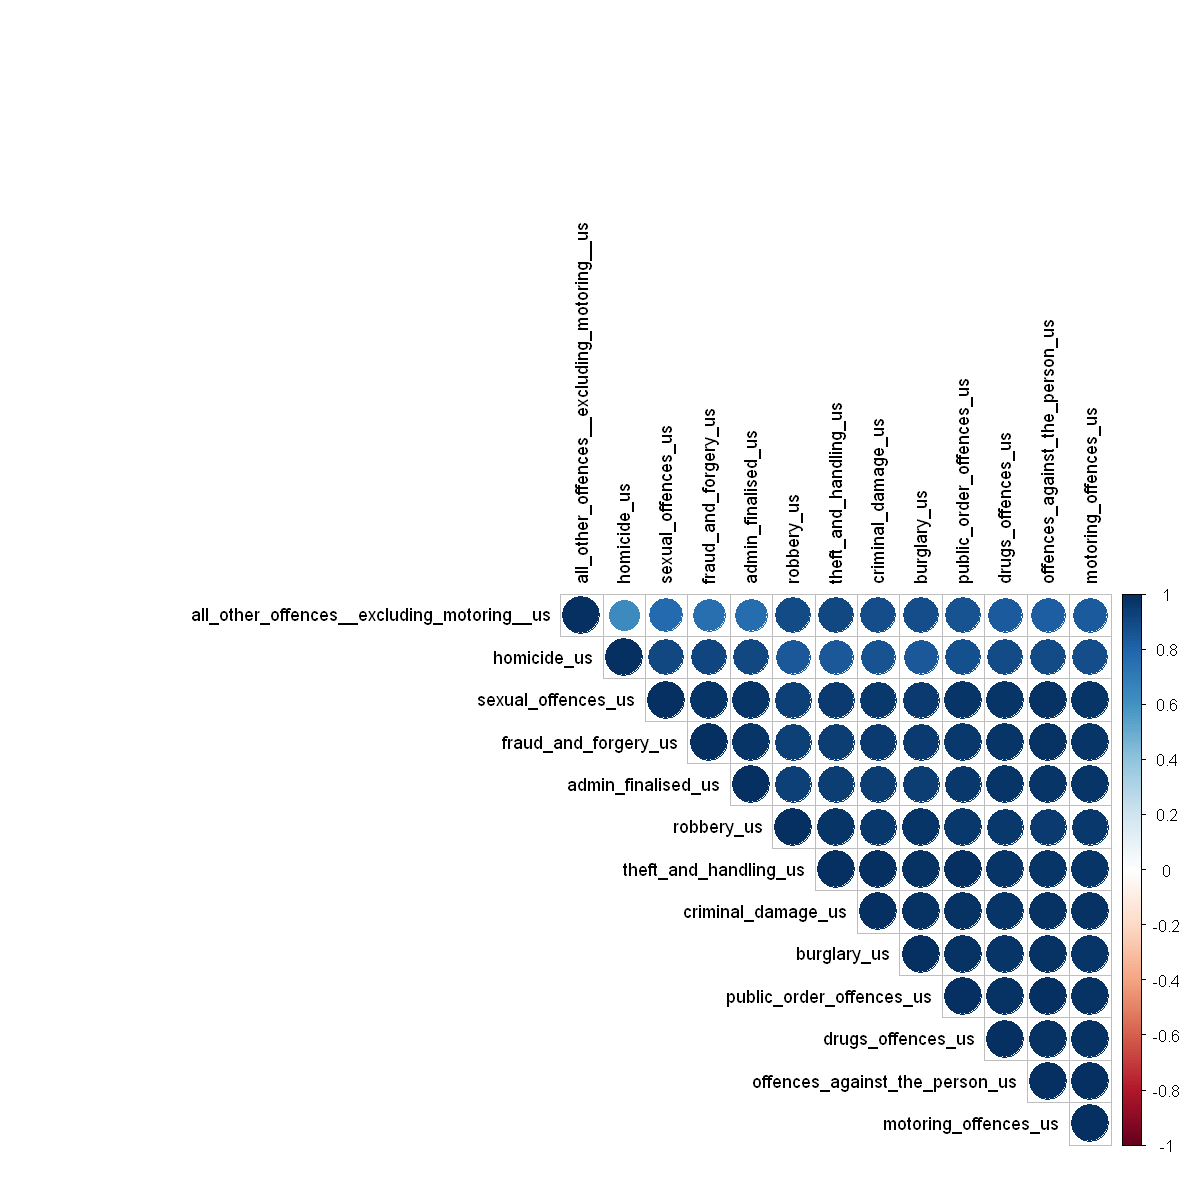

In [108]:
# unsuccessful crimes

corr_matrix_graph(uscrime_df)

In [109]:
head(crime_df)

x                 year month yearmon    region homicide
1 National          2014 jan   2014-01-01 All    51      
2 Avon and Somerset 2014 jan   2014-01-01 West    0      
3 Bedfordshire      2014 jan   2014-01-01 East    0      
4 Cambridgeshire    2014 jan   2014-01-01 East    0      
5 Cheshire          2014 jan   2014-01-01 North   0      
6 Cleveland         2014 jan   2014-01-01 North   2      
  offences_against_the_person sexual_offences burglary robbery
1 9087                        736             1715     522    
2  228                         35               49       8    
3   68                          2                7      16    
4  101                         10               18       6    
5  170                         15               38      10    
6  119                         11               36       3    
  theft_and_handling fraud_and_forgery criminal_damage drugs_offences
1 11057              846               2693            4988          
2   338               18                 93             148          
3    75               17                 22              31          
4   148               10                 30              47          
5   205               14                 39              64          
6   334               11                 46              65          
  public_order_offences all_other_offences__excluding_motoring_
1 4752                  3291                                   
2  123                    63                                   
3   30                    13                                   
4   37                    28                                   
5   77                    50                                   
6  123                    34                                   
  motoring_offences
1 12945            
2   256            
3   171            
4   103            
5   264            
6   228

In [110]:
head(uscrime_df)

x                 year month yearmon    region homicide_us
1 National          2014 jan   2014-01-01 All    11         
2 Avon and Somerset 2014 jan   2014-01-01 West    0         
3 Bedfordshire      2014 jan   2014-01-01 East    1         
4 Cambridgeshire    2014 jan   2014-01-01 East    0         
5 Cheshire          2014 jan   2014-01-01 North   0         
6 Cleveland         2014 jan   2014-01-01 North   3         
  offences_against_the_person_us sexual_offences_us burglary_us robbery_us
1 2930                           286                284         139       
2   62                            17                  1           0       
3   29                             1                  4           7       
4   21                             3                  4           4       
5   40                             1                  5           0       
6   44                             6                  2           2       
  theft_and_handling_us fraud_and_forgery_us criminal_damage_us
1 998                   137                  472               
2  32                     0                   14               
3   4                     3                    8               
4  15                     4                    3               
5   5                     1                    3               
6  31                     3                   13               
  drugs_offences_us public_order_offences_us
1 305               797                     
2   4                28                     
3   3                 9                     
4   1                 2                     
5   3                 8                     
6   2                27                     
  all_other_offences__excluding_motoring__us motoring_offences_us
1 586                                        1466                
2   9                                          40                
3   2                                          13                
4   9                                          16                
5   5                                          16                
6  14                                          16                
  admin_finalised_us
1 890               
2  20               
3  12               
4  14               
5  13               
6   3

In [111]:
x <- crime_df[6:17]
y <- uscrime_df[6:18]

In [112]:
# Perform correlation test

result <- cor(x, y)

In [113]:
result

homicide_us
homicide                                0.9137991  
offences_against_the_person             0.9045618  
sexual_offences                         0.9082314  
burglary                                0.8685130  
robbery                                 0.8569199  
theft_and_handling                      0.8490682  
fraud_and_forgery                       0.9209369  
criminal_damage                         0.8590975  
drugs_offences                          0.8945896  
public_order_offences                   0.8668343  
all_other_offences__excluding_motoring_ 0.6846149  
motoring_offences                       0.8718489  
                                        offences_against_the_person_us
homicide                                0.9298878                     
offences_against_the_person             0.9906405                     
sexual_offences                         0.9787738                     
burglary                                0.9885381                     
robbery                                 0.9752549                     
theft_and_handling                      0.9810740                     
fraud_and_forgery                       0.9853088                     
criminal_damage                         0.9873588                     
drugs_offences                          0.9945556                     
public_order_offences                   0.9891800                     
all_other_offences__excluding_motoring_ 0.8554734                     
motoring_offences                       0.9821786                     
                                        sexual_offences_us burglary_us
homicide                                0.9455189          0.8811532  
offences_against_the_person             0.9907626          0.9597682  
sexual_offences                         0.9914193          0.9399540  
burglary                                0.9722643          0.9849979  
robbery                                 0.9511911          0.9825409  
theft_and_handling                      0.9599435          0.9856132  
fraud_and_forgery                       0.9847811          0.9531952  
criminal_damage                         0.9693639          0.9848157  
drugs_offences                          0.9792315          0.9839507  
public_order_offences                   0.9746817          0.9844253  
all_other_offences__excluding_motoring_ 0.8056592          0.9080376  
motoring_offences                       0.9671016          0.9742231  
                                        robbery_us theft_and_handling_us
homicide                                0.8550398  0.8698389            
offences_against_the_person             0.9299384  0.9538766            
sexual_offences                         0.9107018  0.9312704            
burglary                                0.9646519  0.9880047            
robbery                                 0.9801127  0.9827116            
theft_and_handling                      0.9635021  0.9910132            
fraud_and_forgery                       0.9343604  0.9461976            
criminal_damage                         0.9614235  0.9878369            
drugs_offences                          0.9683214  0.9833853            
public_order_offences                   0.9628050  0.9859793            
all_other_offences__excluding_motoring_ 0.9176822  0.9278782            
motoring_offences                       0.9555953  0.9765560            
                                        fraud_and_forgery_us criminal_damage_us
homicide                                0.9358827            0.8915043         
offences_against_the_person             0.9788682            0.9686486         
sexual_offences                         0.9724160            0.9499075         
burglary                                0.9613786            0.9906410         
robbery                                 0.9469854            0.9768643         
theft_and_handling                      0.9445659            0.9932568         
fraud_and

# Correlation Test Explanation

Looking at the row "homicide," there is correlation coefficients with other crime types such as "offences_against_the_person_us," "sexual_offences_us," "burglary_us," etc. The correlation coefficients range from approximately 0.85 to 0.94.

A positive correlation coefficient close to 1 suggests a strong positive relationship, indicating that as one type of crime increases, the other type tends to increase as well. Conversely, a negative correlation coefficient close to -1 suggests a strong negative relationship, indicating that as one type of crime increases, the other type tends to decrease.

Note that correlation does not imply causation. These correlation coefficients indicate the degree of linear association between crime types but do not provide information about the cause-and-effect relationship between them.

## Analyzing the trend analysis of successful crime (crime_df) and unsuccessful crime

In [114]:
group_and_combine_dfs <- function(crime, uscrime) {
  crime <- crime[crime$x == "National", ]
  uscrime <- uscrime[uscrime$x == "National", ]

  numeric_columns_crime <- dplyr::select(crime, -c("x", "year", "month" ,"yearmon", "region"))
  crime$no_of_crimes <- rowSums(numeric_columns_crime)
    
  numeric_columns_uscrime <- dplyr::select(uscrime, -c("x", "year", "month" ,"yearmon", "region"))
  uscrime$no_of_uscrimes <- rowSums(numeric_columns_uscrime)
  
  crime <- dplyr::select(crime, c("yearmon", "no_of_crimes"))
  uscrime <- dplyr::select(uscrime, c("yearmon", "no_of_uscrimes"))
  
  merged_df <- dplyr::inner_join(crime, uscrime, by = "yearmon")
  
  return(merged_df)
}


In [115]:
crime_df_uscrime_df <- group_and_combine_dfs(crime_df, uscrime_df)

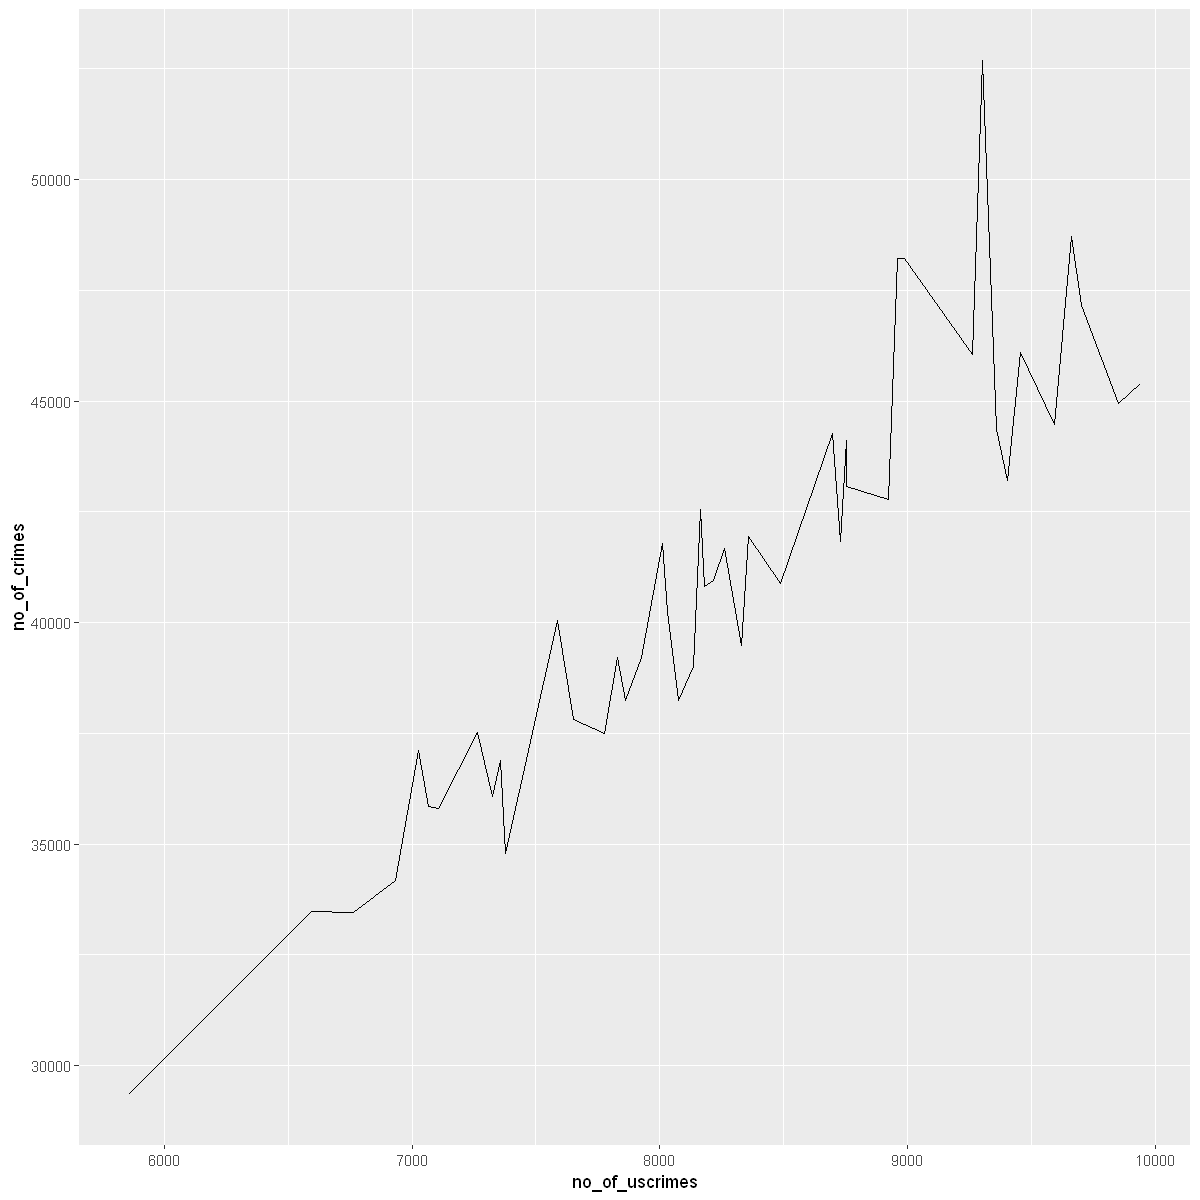

In [116]:
ggplot(crime_df_uscrime_df, aes(x=no_of_uscrimes, y=no_of_crimes, group=5)) + geom_line()

# Predictive Analytics

# Prediction Models

# Regression

# Linear Regression Model

In [117]:
lr_split_data <- function(dataframe) {
  dataframe <- dataframe[dataframe$x == "National", ]
  dataframe$yearmon <- as.Date(dataframe$yearmon)
  
  numeric_columns_df <- dplyr::select(dataframe, -c("x", "year", "month", "yearmon", "region"))
  dataframe$crimes <- rowSums(numeric_columns_df)
  
  test <- dataframe[dataframe$year == 2018, ]
  train <- dataframe[dataframe$year != 2018, ]
  
  test <- dplyr::select(test, -c("x", "year", "month", "region"))
  train <- dplyr::select(train, -c("x", "year", "month", "region"))
  
  return(list(test = test, train = train))
}

In [118]:
linear_regression <- function(test, train) {
  # Training the model
  model <- lm(crimes ~ yearmon, data = train)
  
  # Using the model for predictions on test data
  preds <- predict(model, test, type = "response")
  actuals_preds <- data.frame(actuals = test$crimes, predicted = preds)
  
  # Calculating correlation
  correlation_accuracy <- cor(actuals_preds$actuals, actuals_preds$predicted)
  
  return(list(model = model, actuals_preds = actuals_preds, correlation_accuracy = correlation_accuracy))
}

In [119]:
crime_test_train <- lr_split_data(crime_df)
uscrime_test_train <- lr_split_data(uscrime_df)

In [120]:
# Train dataset

summary_data <- summary(dplyr::select(crime_test_train[[2]], c("yearmon", "crimes")))

In [121]:
summary_data

    yearmon               crimes     
 Min.   :2014-01-01   Min.   :29367  
 1st Qu.:2014-11-08   1st Qu.:38249  
 Median :2015-09-16   Median :41309  
 Mean   :2015-11-08   Mean   :41317  
 3rd Qu.:2016-10-24   3rd Qu.:44336  
 Max.   :2017-12-01   Max.   :52683  

In [122]:
# Test dataset

summary_data <- summary(dplyr::select(crime_test_train[[1]], c("yearmon", "crimes")))

In [123]:
summary_data

    yearmon               crimes     
 Min.   :2018-01-01   Min.   :29367  
 1st Qu.:2018-02-22   1st Qu.:33480  
 Median :2018-07-16   Median :35297  
 Mean   :2018-06-16   Mean   :34543  
 3rd Qu.:2018-09-08   3rd Qu.:35903  
 Max.   :2018-12-01   Max.   :37521  

In [124]:
lr_res <- linear_regression(crime_test_train[[1]], crime_test_train[[2]])

In [125]:
lr_res

$model

Call:
lm(formula = crimes ~ yearmon, data = train)

Coefficients:
(Intercept)      yearmon  
 189776.713       -8.864  


$actuals_preds
     actuals predicted
1807   37521  34365.38
1850   33488  34090.58
1893   33457  33842.38
1936   35808  32760.92
1979   36066  32486.12
2022   34786  32211.32
2065   35848  31945.39
2108   29367  31404.66

$correlation_accuracy
[1] 0.400483


In [126]:
lr_model <- lr_res[[1]]
lr_actual_preds <- lr_res[[2]]
lr_accuracy <- lr_res[[3]]

In [127]:
lr_model


Call:
lm(formula = crimes ~ yearmon, data = train)

Coefficients:
(Intercept)      yearmon  
 189776.713       -8.864  


In [128]:
summary(lr_model)


Call:
lm(formula = crimes ~ yearmon, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5273.2 -1805.3   297.9  1929.6  5366.7 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.898e+05  1.530e+04  12.401 2.76e-15 ***
yearmon     -8.864e+00  9.135e-01  -9.704 4.56e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2537 on 40 degrees of freedom
Multiple R-squared:  0.7019,	Adjusted R-squared:  0.6944 
F-statistic: 94.17 on 1 and 40 DF,  p-value: 4.557e-12


In [129]:
lr_accuracy

[1] 0.400483

In [130]:
summary(lr_accuracy)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4005  0.4005  0.4005  0.4005  0.4005  0.4005 

In [131]:
lr_actual_preds

actuals predicted
1807 37521   34365.38 
1850 33488   34090.58 
1893 33457   33842.38 
1936 35808   32760.92 
1979 36066   32486.12 
2022 34786   32211.32 
2065 35848   31945.39 
2108 29367   31404.66

In [132]:
head(lr_actual_preds)

actuals predicted
1807 37521   34365.38 
1850 33488   34090.58 
1893 33457   33842.38 
1936 35808   32760.92 
1979 36066   32486.12 
2022 34786   32211.32

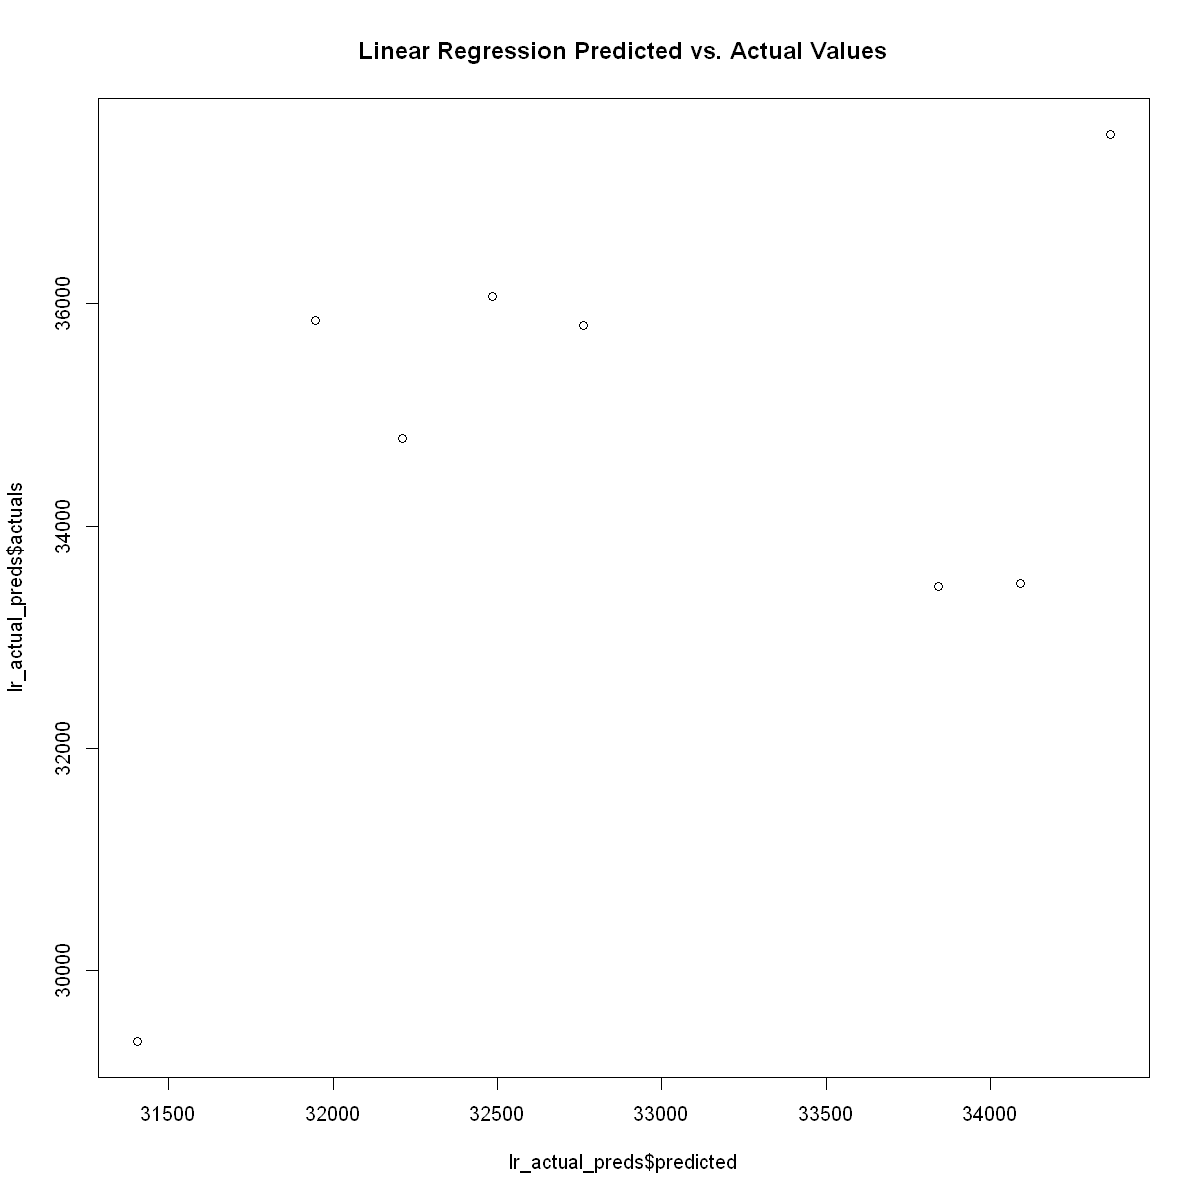

In [133]:
# Scatter plot of predicted vs. actual values for linear regression

plot(lr_actual_preds$predicted, lr_actual_preds$actuals, main = "Linear Regression Predicted vs. Actual Values")
smooth <- loess(lr_actual_preds$actuals ~ lr_actual_preds$predicted)
lines(predict(smooth))


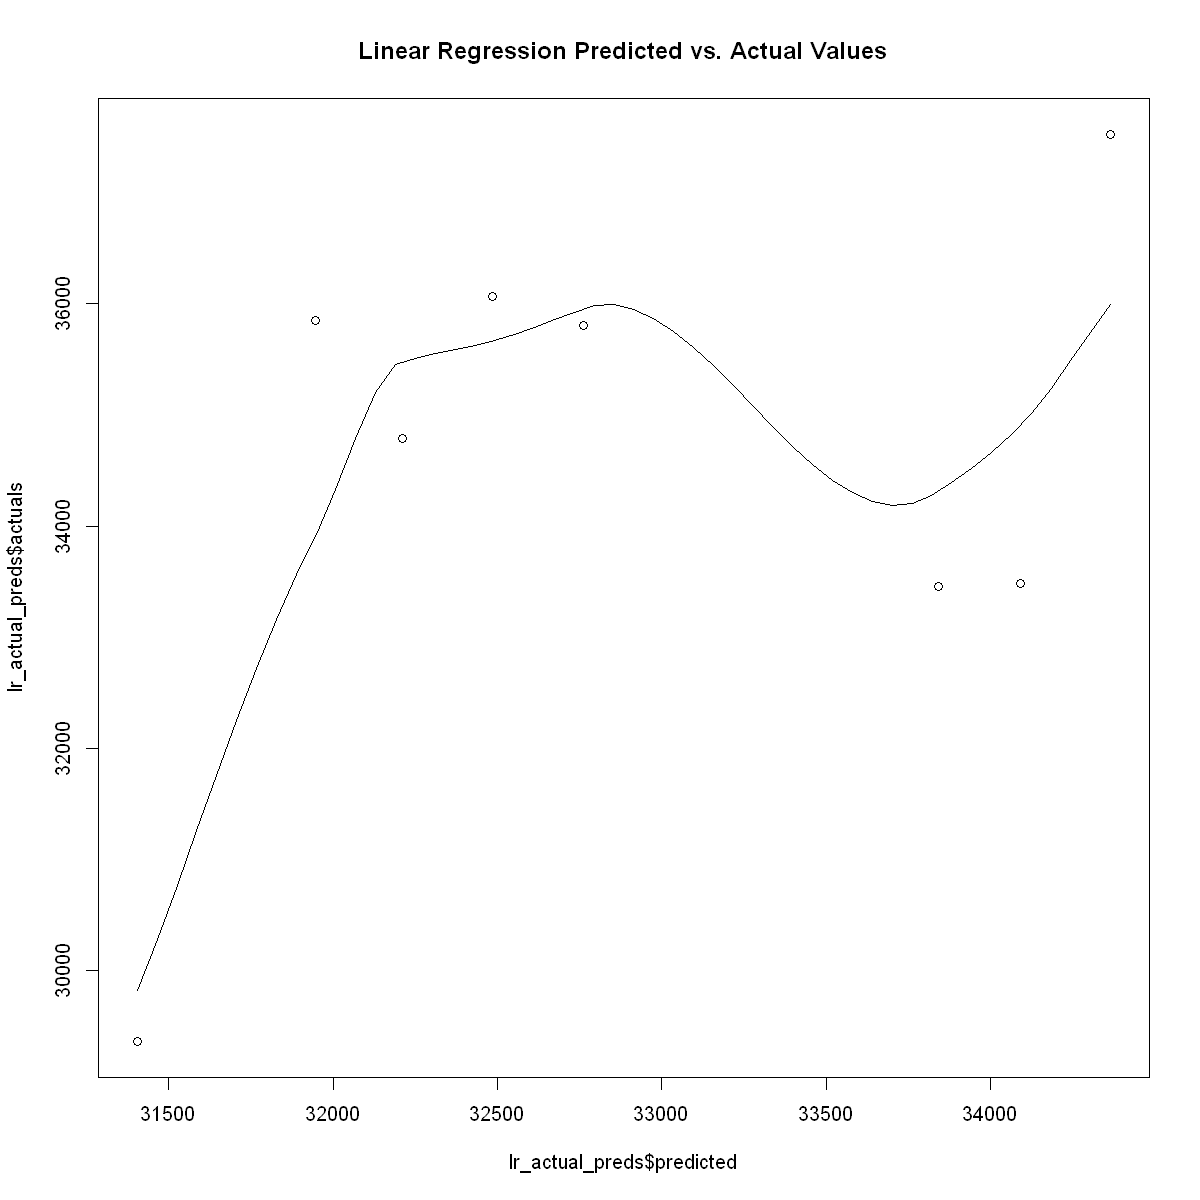

In [134]:
scatter.smooth(x=lr_actual_preds$predicted, y=lr_actual_preds$actuals, main="Linear Regression Predicted vs. Actual Values")

# Model Evaluation

In [135]:
d = lr_actual_preds$actuals - lr_actual_preds$predicted
# Mean Absolute Error 
mae = mean(abs(d))

# Mean Absolute Squared Error
mse = mean((d)^2)

# Root Mean Absolute Sqaured Error
rmse = sqrt(mse)

In [136]:
list(mae, mse, rmse)

[[1]]
[1] 2410.686

[[2]]
[1] 7322650

[[3]]
[1] 2706.039

# Clustering

# KMeans

In [137]:
# Non-numeric columns removal

remove_non_numeric_cols <- function(dataframe) {
  dataframe <- dplyr::select(dataframe, where(is.numeric))
  return(dataframe)
}

In [138]:
crime_df <- remove_non_numeric_cols(crime_df)

In [139]:
head(crime_df)

year homicide offences_against_the_person sexual_offences burglary robbery
1 2014 51       9087                        736             1715     522    
2 2014  0        228                         35               49       8    
3 2014  0         68                          2                7      16    
4 2014  0        101                         10               18       6    
5 2014  0        170                         15               38      10    
6 2014  2        119                         11               36       3    
  theft_and_handling fraud_and_forgery criminal_damage drugs_offences
1 11057              846               2693            4988          
2   338               18                 93             148          
3    75               17                 22              31          
4   148               10                 30              47          
5   205               14                 39              64          
6   334               11                 46              65          
  public_order_offences all_other_offences__excluding_motoring_
1 4752                  3291                                   
2  123                    63                                   
3   30                    13                                   
4   37                    28                                   
5   77                    50                                   
6  123                    34                                   
  motoring_offences
1 12945            
2   256            
3   171            
4   103            
5   264            
6   228

In [140]:
kmeans_clustering <- function(dataframe, clusters){
  dataframe <- scale(dataframe)
  model <- kmeans(dataframe, centers = clusters, nstart = 25)
  return(model)
}

In [141]:
Km = remove_non_numeric_cols(crime_df)

In [142]:
summary(Km)

      year         homicide       offences_against_the_person sexual_offences  
 Min.   :2014   Min.   :  0.000   Min.   :   29.0             Min.   :   0.00  
 1st Qu.:2015   1st Qu.:  0.000   1st Qu.:  115.0             1st Qu.:   8.00  
 Median :2016   Median :  1.000   Median :  178.0             Median :  15.00  
 Mean   :2016   Mean   :  3.769   Mean   :  454.5             Mean   :  43.76  
 3rd Qu.:2017   3rd Qu.:  3.000   3rd Qu.:  272.0             3rd Qu.:  29.00  
 Max.   :2018   Max.   :131.000   Max.   :11741.0             Max.   :1179.00  
    burglary          robbery       theft_and_handling fraud_and_forgery
 Min.   :   1.00   Min.   :  0.00   Min.   :   13.0    Min.   :   0.00  
 1st Qu.:  14.00   1st Qu.:  2.00   1st Qu.:   96.0    1st Qu.:   8.00  
 Median :  23.00   Median :  5.00   Median :  147.5    Median :  13.00  
 Mean   :  60.18   Mean   : 19.38   Mean   :  374.5    Mean   :  38.51  
 3rd Qu.:  38.00   3rd Qu.: 10.00   3rd Qu.:  239.8    3rd Qu.:  21.00  
 M

In [143]:
head(crime_df)

year homicide offences_against_the_person sexual_offences burglary robbery
1 2014 51       9087                        736             1715     522    
2 2014  0        228                         35               49       8    
3 2014  0         68                          2                7      16    
4 2014  0        101                         10               18       6    
5 2014  0        170                         15               38      10    
6 2014  2        119                         11               36       3    
  theft_and_handling fraud_and_forgery criminal_damage drugs_offences
1 11057              846               2693            4988          
2   338               18                 93             148          
3    75               17                 22              31          
4   148               10                 30              47          
5   205               14                 39              64          
6   334               11                 46              65          
  public_order_offences all_other_offences__excluding_motoring_
1 4752                  3291                                   
2  123                    63                                   
3   30                    13                                   
4   37                    28                                   
5   77                    50                                   
6  123                    34                                   
  motoring_offences
1 12945            
2   256            
3   171            
4   103            
5   264            
6   228

In [144]:
# Using a cluster of 6

km_model = kmeans_clustering(Km, 6)

In [145]:
summary(km_model)

             Length Class  Mode   
cluster      2150   -none- numeric
centers        78   -none- numeric
totss           1   -none- numeric
withinss        6   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size            6   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric

In [146]:
head(km_model)

$cluster
   [1] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2
  [38] 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2
  [75] 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5
 [112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [149] 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 [186] 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 [223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 [260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2
 [297] 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2
 [334] 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2
 [371] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [408] 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 [445] 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 [482] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 4
 [519] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [556] 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4
 [593] 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4
 [630] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [667] 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [704] 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4
 [741] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4
 [778] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [815] 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4
 [852] 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4
 [889] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [926] 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [963] 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 3 3 3 3 3 3 3 3 3
[1000] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3
[1037] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1074] 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3
[1111] 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3
[1148] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1185] 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1222] 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3
[1259] 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3
[1296] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[1333] 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3
[1370] 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3
[1407] 3 3 3 3 3 3 3 3 3 3 3 3 3 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1444] 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1481] 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 6 6 6 6 6 6 6 6 6 6 6
[1518] 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 6 6 6 6 6
[1555] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1592] 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6
[1629] 6 6 6 6 6 6 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6
[1666] 6 6 6 6 6 6 6 6 6 6 6 6 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5
[1703] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[1740] 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 6 6 6 6 6 6 6 6 6 6 6 6
[1777] 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 6 6 6 6 6 6
[1814] 6 6 6 6 6 6 6 6

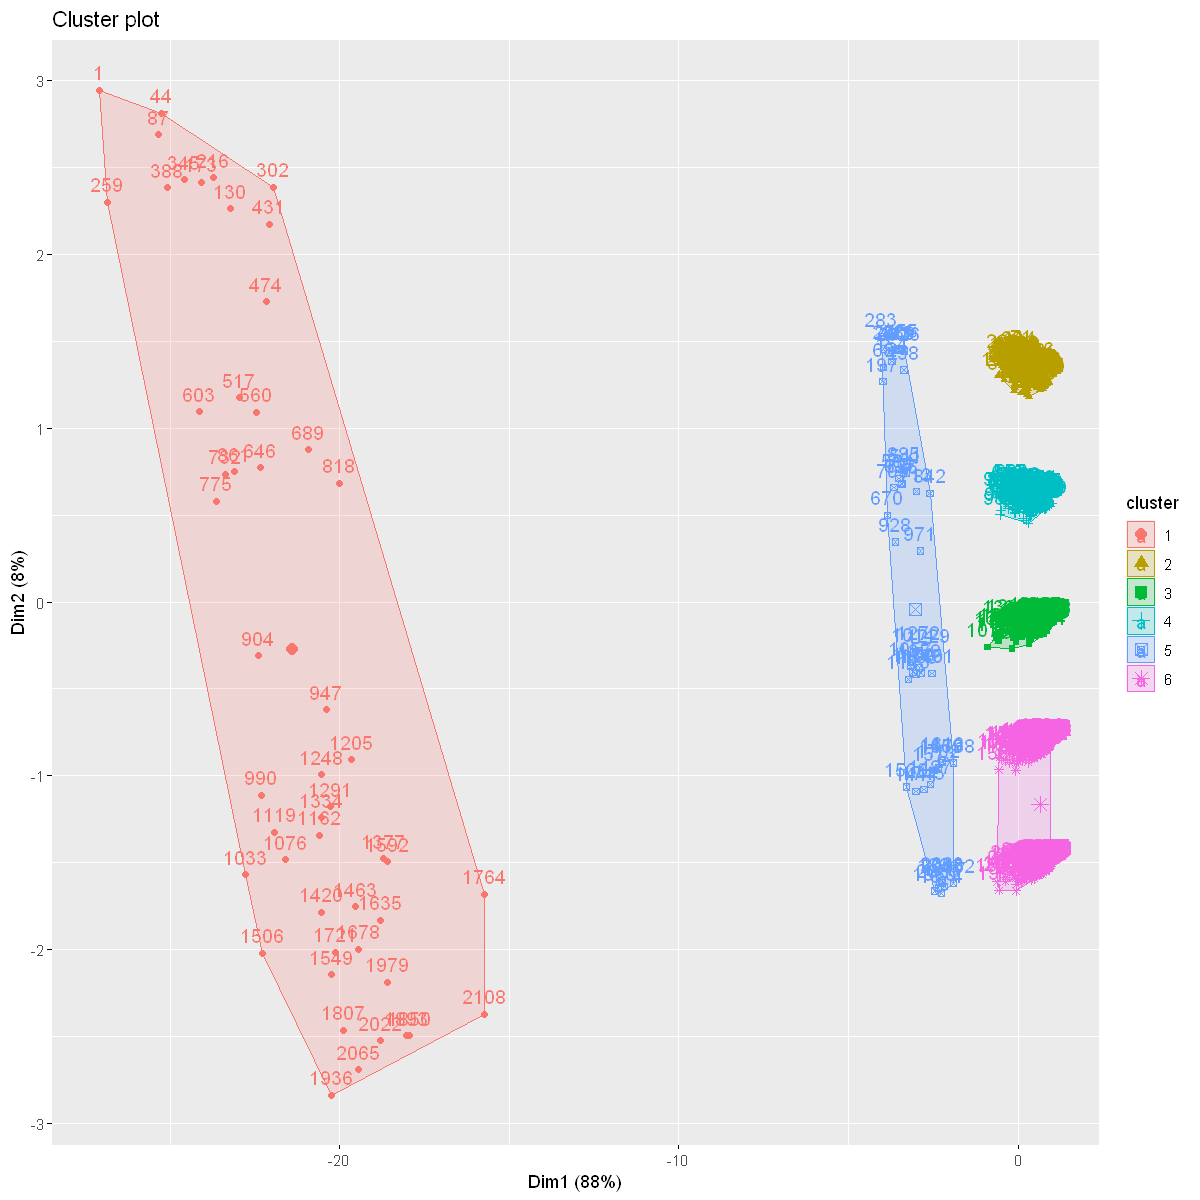

In [147]:
fviz_cluster(km_model, data = Km)

In [148]:
# Where cluster = 7

km_model = kmeans_clustering(Km, 7)

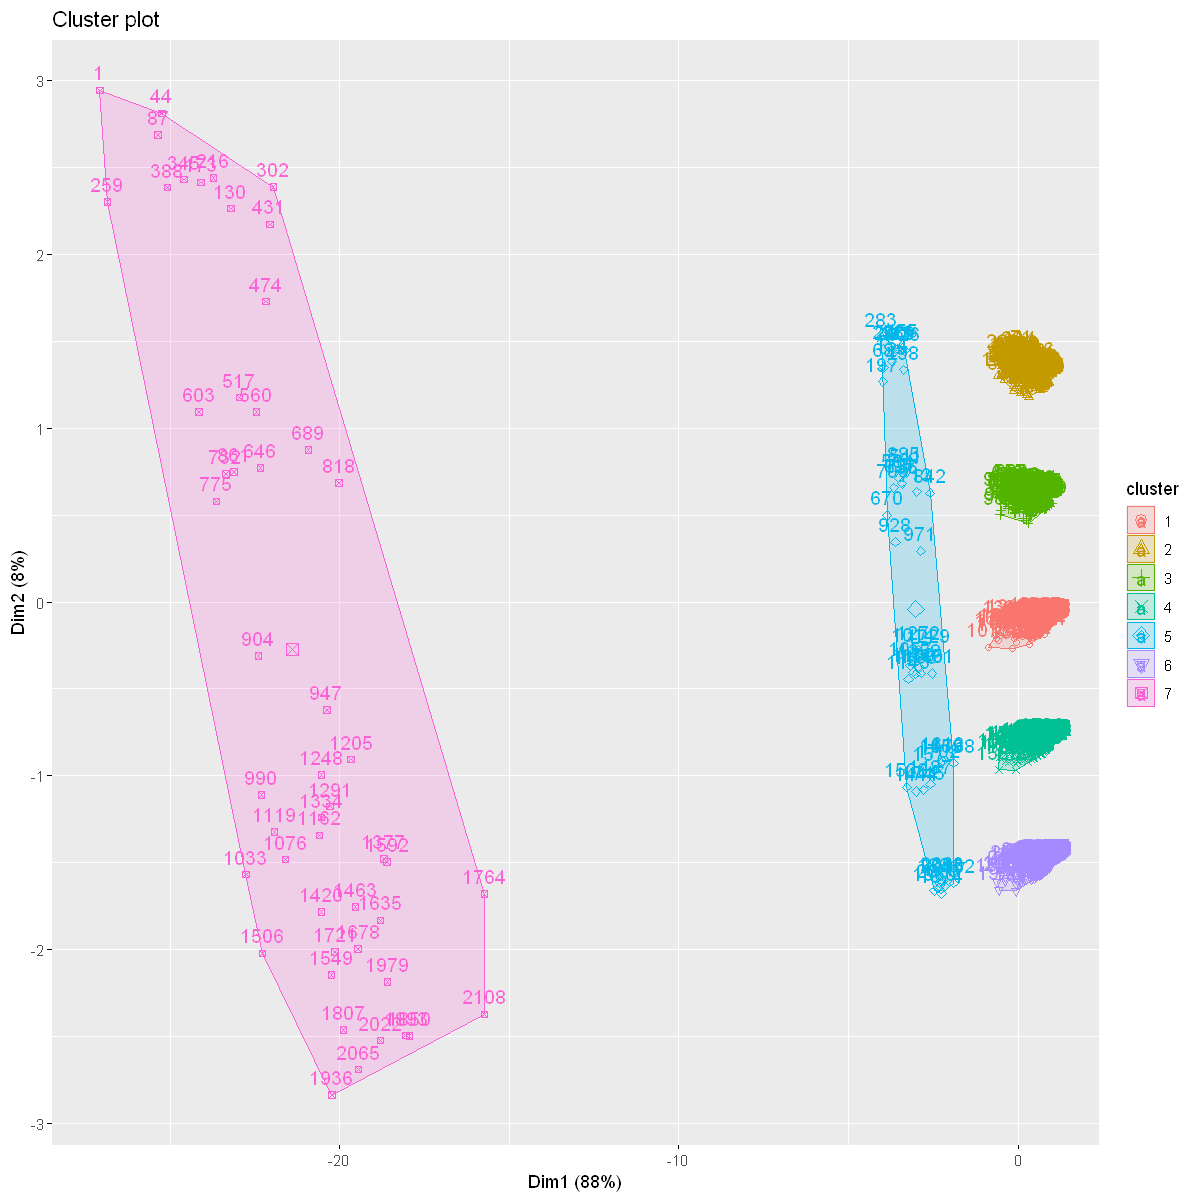

In [149]:
fviz_cluster(km_model, data = Km)

In [150]:
# Where cluster = 8

km_model = kmeans_clustering(Km, 8)

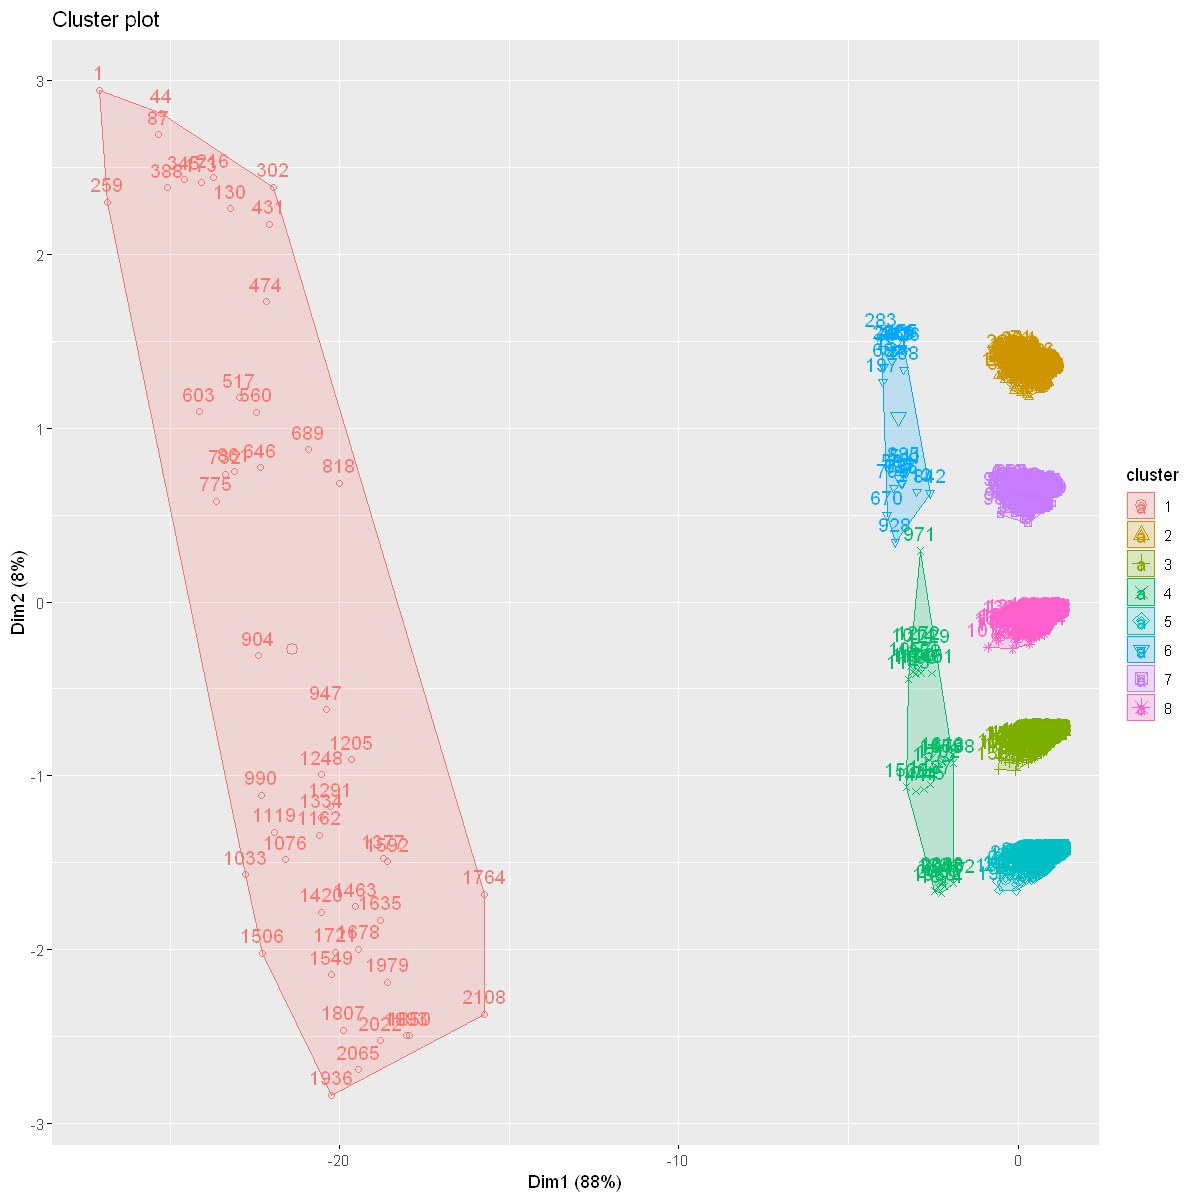

In [151]:
fviz_cluster(km_model, data = Km)

# Classification

In [152]:
head(crime_df)

year homicide offences_against_the_person sexual_offences burglary robbery
1 2014 51       9087                        736             1715     522    
2 2014  0        228                         35               49       8    
3 2014  0         68                          2                7      16    
4 2014  0        101                         10               18       6    
5 2014  0        170                         15               38      10    
6 2014  2        119                         11               36       3    
  theft_and_handling fraud_and_forgery criminal_damage drugs_offences
1 11057              846               2693            4988          
2   338               18                 93             148          
3    75               17                 22              31          
4   148               10                 30              47          
5   205               14                 39              64          
6   334               11                 46              65          
  public_order_offences all_other_offences__excluding_motoring_
1 4752                  3291                                   
2  123                    63                                   
3   30                    13                                   
4   37                    28                                   
5   77                    50                                   
6  123                    34                                   
  motoring_offences
1 12945            
2   256            
3   171            
4   103            
5   264            
6   228

In [163]:
group_by_county <- function(dataframe){
  dataframe <- dplyr::select(dataframe, -c("year", "month" ,"yearmon", "region"))
  dataframe <- dataframe[dataframe$x != "National",]
  dataframe <- group_by(dataframe, x)
  dataframe <- summarise_all(dataframe, funs(sum))
  dataframe2 <- dataframe[,-1]
  rownames(dataframe2) <- dataframe$x
  dataframe2 <- scale(dataframe2)
  return(dataframe2)
}

In [164]:
classify_split_data <- function(dataframe){
  dataframe <- dataframe[dataframe$x != "National", ]
  dataframe$yearmon <- as.Date(dataframe$yearmon)
  dataframe$region <-  as.factor(dataframe$region)
  dataframe$x <-  as.factor(dataframe$x)
    
  numeric_columns_df <- dplyr::select(dataframe, -c("x", "year", "month" ,"yearmon", "region"))
  dataframe$no_of_crimes <- rowSums(numeric_columns_df)
  
  test <- dataframe[dataframe$year == 2018,]
  train <- dataframe[dataframe$year != 2018,]

  test <- dplyr::select(test, c("x", "yearmon" ,"no_of_crimes" ,"region"))
  train <- dplyr::select(train, c("x", "yearmon", "no_of_crimes" ,"region"))  
  

  return(list(test, train))
}

In [165]:
head(new_crime_df)

x                 year month yearmon    region homicide
1 National          2014 jan   2014-01-01 All    51      
2 Avon and Somerset 2014 jan   2014-01-01 West    0      
3 Bedfordshire      2014 jan   2014-01-01 East    0      
4 Cambridgeshire    2014 jan   2014-01-01 East    0      
5 Cheshire          2014 jan   2014-01-01 North   0      
6 Cleveland         2014 jan   2014-01-01 North   2      
  offences_against_the_person sexual_offences burglary robbery
1 9087                        736             1715     522    
2  228                         35               49       8    
3   68                          2                7      16    
4  101                         10               18       6    
5  170                         15               38      10    
6  119                         11               36       3    
  theft_and_handling fraud_and_forgery criminal_damage drugs_offences
1 11057              846               2693            4988          
2   338               18                 93             148          
3    75               17                 22              31          
4   148               10                 30              47          
5   205               14                 39              64          
6   334               11                 46              65          
  public_order_offences all_other_offences__excluding_motoring_
1 4752                  3291                                   
2  123                    63                                   
3   30                    13                                   
4   37                    28                                   
5   77                    50                                   
6  123                    34                                   
  motoring_offences
1 12945            
2   256            
3   171            
4   103            
5   264            
6   228

# Support Vector Machine

In [166]:
svm_test_train <- classify_split_data(new_crime_df)

In [167]:
# Train Model

summary(svm_test_train[[2]])

                 x           yearmon            no_of_crimes      region   
 Avon and Somerset:  42   Min.   :2014-01-01   Min.   :  70.0   East :462  
 Bedfordshire     :  42   1st Qu.:2014-11-01   1st Qu.: 476.0   North:546  
 Cambridgeshire   :  42   Median :2015-09-16   Median : 734.0   South:252  
 Cheshire         :  42   Mean   :2015-11-08   Mean   : 983.7   West :504  
 Cleveland        :  42   3rd Qu.:2016-11-01   3rd Qu.:1107.2              
 Cumbria          :  42   Max.   :2017-12-01   Max.   :8194.0              
 (Other)          :1512                                                    

In [168]:
# Test Model

summary(svm_test_train[[1]])

                 x          yearmon            no_of_crimes      region   
 Avon and Somerset:  8   Min.   :2018-01-01   Min.   : 190.0   East : 88  
 Bedfordshire     :  8   1st Qu.:2018-02-22   1st Qu.: 403.2   North:104  
 Cambridgeshire   :  8   Median :2018-07-16   Median : 618.5   South: 48  
 Cheshire         :  8   Mean   :2018-06-16   Mean   : 822.4   West : 96  
 Cleveland        :  8   3rd Qu.:2018-09-08   3rd Qu.: 929.2              
 Cumbria          :  8   Max.   :2018-12-01   Max.   :5655.0              
 (Other)          :288                                                    

In [186]:
svm_model_generate <- function(train_df, test_df) {
  set.seed(123)
  
  svm_model <- svm(region ~ x + yearmon + no_of_crimes, data = train_df, type = 'C-classification', kernal = "radial", gamma = 0.1, cost = 1)
  
  test_predictions <- predict(svm_model, test_df)
  confusion_matrix <- confusionMatrix(as.factor(test_predictions), as.factor(test_df$region))
  model_roc = multiclass.roc(test_df$region ~ as.numeric(as.factor(test_predictions)), plot=TRUE, print.auc = TRUE)

  return(list(svm_model, confusion_matrix))
}

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases



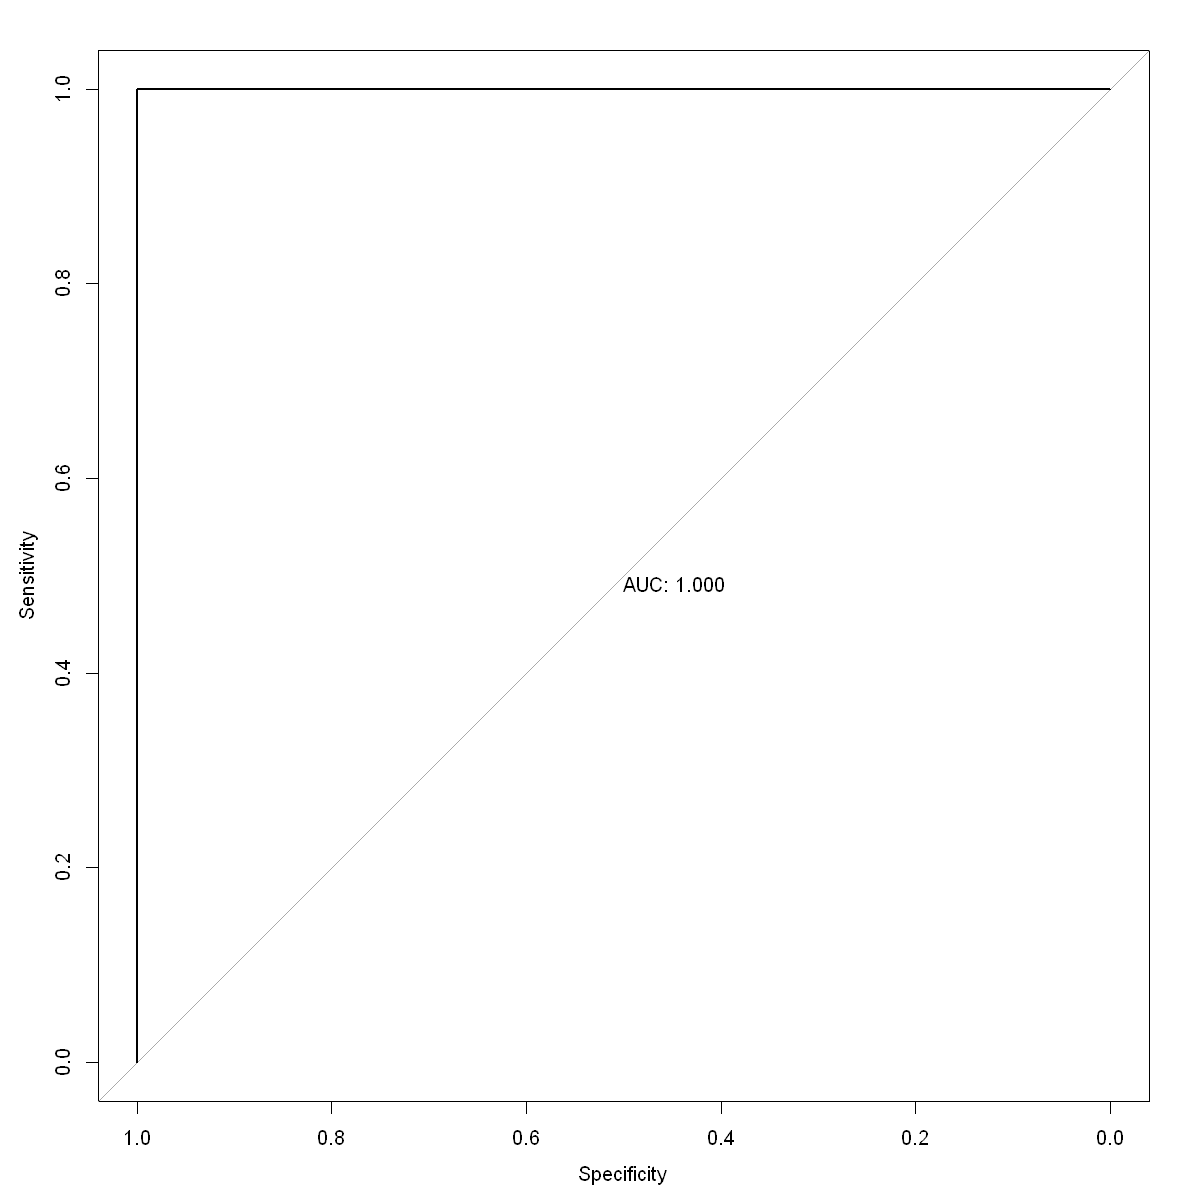

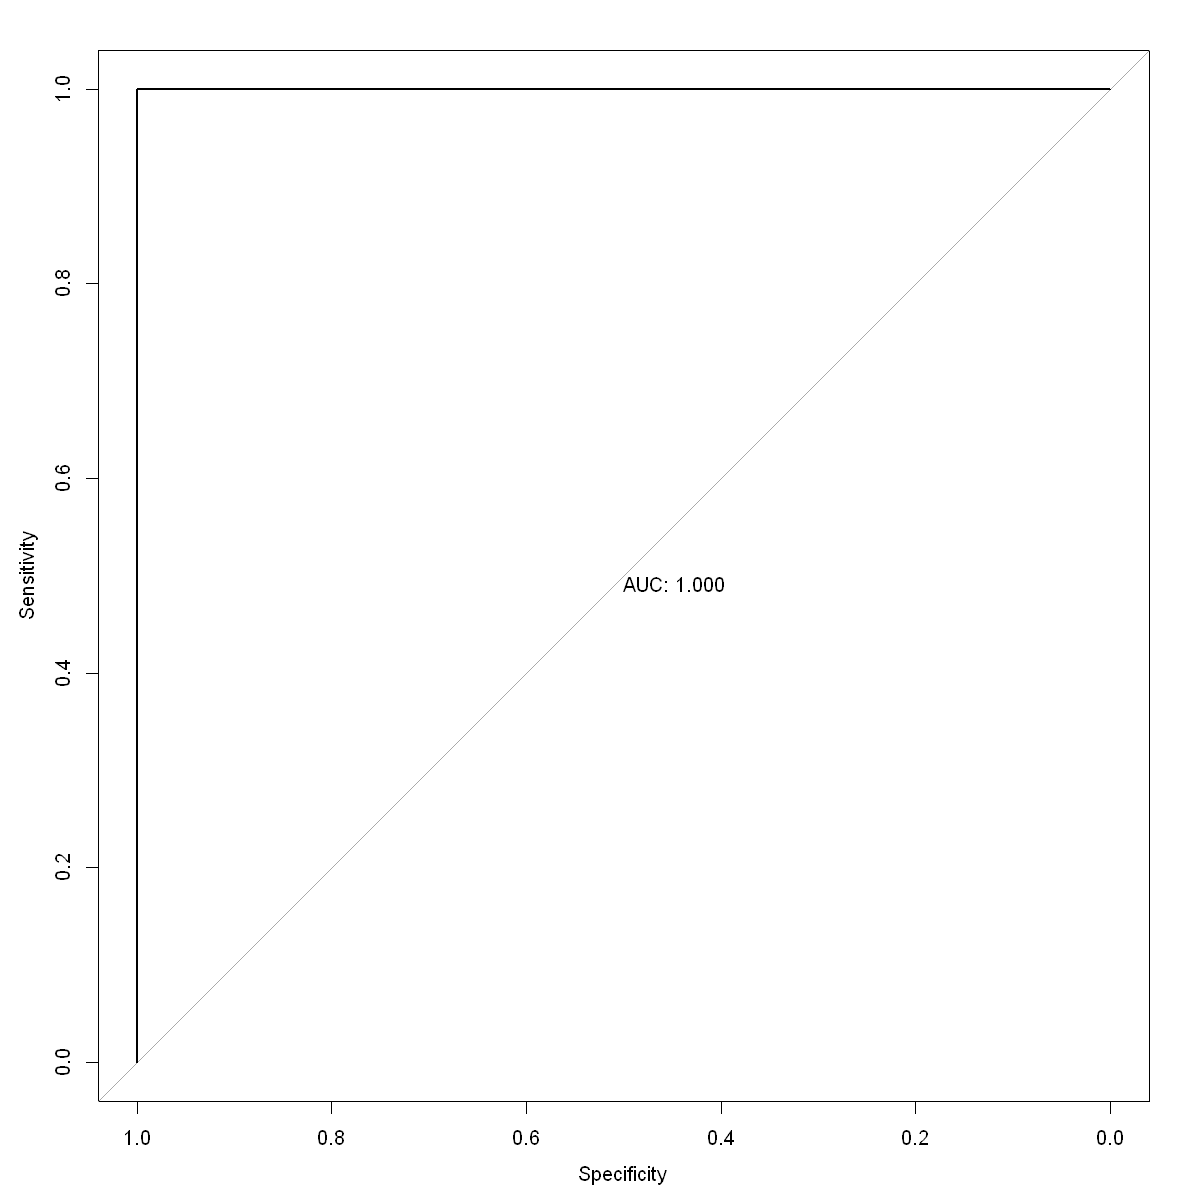

In [187]:
svm_res = svm_model_generate(svm_test_train[[2]], svm_test_train[[1]])
svm_model = svm_res[[1]]
svm_creport = svm_res[[2]]

In [188]:
svm_model


Call:
svm(formula = region ~ x + yearmon + no_of_crimes, data = train_df, 
    type = "C-classification", kernal = "radial", gamma = 0.1, cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  478


In [189]:
summary(svm_model)


Call:
svm(formula = region ~ x + yearmon + no_of_crimes, data = train_df, 
    type = "C-classification", kernal = "radial", gamma = 0.1, cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  478

 ( 129 116 156 77 )


Number of Classes:  4 

Levels: 
 East North South West




In [190]:
svm_creport

Confusion Matrix and Statistics

          Reference
Prediction East North South West
     East    88     0     0    0
     North    0   104     0    0
     South    0     0    48    0
     West     0     0     0   96

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9891, 1)
    No Information Rate : 0.3095     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: East Class: North Class: South Class: West
Sensitivity               1.0000       1.0000       1.0000      1.0000
Specificity               1.0000       1.0000       1.0000      1.0000
Pos Pred Value            1.0000       1.0000       1.0000      1.0000
Neg Pred Value            1.0000       1.0000       1.0000      1.0000
Prevalence                0.2619       0.3